<a href="https://colab.research.google.com/github/Lgvalia/IBM_Capstone_Project/blob/master/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#general libraries
import pandas as pd
import numpy as np

#library for label encoding
from sklearn import preprocessing

#visualization librabries
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#modeling libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Import Staging Files

In [ ]:
#import card_trans

card_tran_file = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Import/Card_trans.csv')

In [ ]:
#import transfers

transfers_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Import/transfers.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,27,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#import bills 

bills_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Import/bills.csv')

Train Sets

In [ ]:
#templates

templates_groupby = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/templates_groupby.csv').iloc[:,1:]

In [ ]:
#Reg_data

reg_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/reg_data.csv').iloc[:,1:]

In [ ]:
#products sorted

products_sorted = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/products_sorted.csv').iloc[:,1:]

In [ ]:
#MCC_onehot_groupby

MCC_onehot_groupby = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/MCC_onehot_groupby.csv').iloc[:,1:]

In [ ]:
#transfers_groupby

transfers_groupby = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/transfers_groupby.csv').iloc[:,1:]


In [ ]:
#bills_groupby

bills_groupby = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/bills_groupby.csv').iloc[:,1:]


In [ ]:
#loan_snap_groupby

loan_snap_groupby = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/loan_snap_groupby.csv').iloc[:,1:]

In [ ]:
#loan_apps_groupby

loan_apps_groupby = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/loan_apps_groupby.csv').iloc[:,1:]

In [ ]:
#credit_data

credit_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/credit_data.csv').iloc[:,1:]

In [ ]:
#last platform

last_platform_filtered = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/last_platform_filtered.csv').iloc[:,1:]

In [ ]:
#savings_groupby

savings_groupby = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/savings_groupby.csv').iloc[:,1:]

In [ ]:
#cashback_customers

cashback_customers = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/cashback_customers.csv').iloc[:,1:]

In [ ]:
#gamification_participation

gamification_participation = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/gamification_participation.csv').iloc[:,1:]

In [ ]:
#churn groupby jul 2020

churn_groupby = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/churn_groupby.csv').iloc[:,1:]

In [ ]:
#churn_pivot

churn_pivot = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/churn_pivot.csv').iloc[:,1:]

Test Sets

In [ ]:
#MCC_onehot_groupby_apr20

MCC_onehot_groupby_apr20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/MCC_onehot_groupby_apr20.csv').iloc[:,1:]

In [ ]:
#transfers_groupby_apr20

transfers_groupby_apr20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/transfers_groupby_apr20.csv').iloc[:,1:]

In [ ]:
#bills_groupby_apr20

bills_groupby_apr20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/bills_groupby_apr20.csv').iloc[:,1:]

In [ ]:
#loan_snap_groupby_apr20

loan_snap_groupby_apr20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/loan_snap_groupby_apr20.csv').iloc[:,1:]

In [ ]:
#loan_apps_groupby_apr20

loan_apps_groupby_apr20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/loan_apps_groupby_apr20.csv').iloc[:,1:]

In [ ]:
#savings_groupby_apr20

savings_groupby_apr20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/savings_groupby_apr20.csv').iloc[:,1:]

In [ ]:
#cashback_customers_apr20

cashback_customers_apr20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/cashback_customers_apr20.csv').iloc[:,1:]

In [ ]:
#gamification_participation_apr20

gamification_participation_apr20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/gamification_participation_apr20.csv').iloc[:,1:]

In [ ]:
#churn_groupby_aprchrn

churn_groupby_aprchrn = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/churn_groupby_aprchrn.csv')

In [ ]:
#churn_pivot_aprchrn

churn_pivot_aprchrn = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/churn_pivot_aprchrn.csv').iloc[:,1:]

In [ ]:
#churn_pivot_pred

churn_pivot_pred = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/churn_pivot_pred.csv').iloc[:,1:]

Predict sets

In [ ]:
#MCC_onehot_groupby_pred

MCC_onehot_groupby_pred = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/MCC_onehot_groupby_pred.csv').iloc[:,1:]

In [ ]:
#transfers_groupby_pred

transfers_groupby_pred = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/transfers_groupby_pred.csv').iloc[:,1:]

In [ ]:
#bills_groupby_pred

bills_groupby_pred = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/bills_groupby_pred.csv').iloc[:,1:]

In [ ]:
#loan_snap_groupby_pred

loan_snap_groupby_pred = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/loan_snap_groupby_pred.csv').iloc[:,1:]

In [ ]:
#loan_apps_groupby_pred

loan_apps_groupby_pred = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/loan_apps_groupby_pred.csv').iloc[:,1:]

In [ ]:
#savings_groupby_pred

savings_groupby_pred = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/savings_groupby_pred.csv').iloc[:,1:]

In [ ]:
#cashback_customers_pred

cashback_customers_pred = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Staging/cashback_customers_pred.csv').iloc[:,1:]

#Data Preprocessing

In [ ]:
templates_groupby.head()
reg_data.head() 
products_sorted.head()
MCC_onehot_groupby.head()              #convert total to avg?
transfers_groupby.head()               #convert total to avg?
bills_groupby.head()                   #convert total to avg?
loan_snap_groupby.head()               #change to max date?
loan_apps_groupby.head()               #convert total to avg?
credit_data.head()                     #absolute amounts to bins
last_platform_filtered.head()          #devices to device groups
savings_groupby.head()                 ##change to max date?
cashback_customers.head()
gamification_participation.head()

,CustomerId,Participation
0,05390158-df29-4159-88e4-f9bdb5aacde1,Top_50
1,e7515423-1f3e-47a2-9829-5b8be1857d94,Top_50
2,865dd484-3d83-47e4-9ce6-56adf1e0b49c,Top_50
3,77b4ccaf-9027-43a7-b064-62d3c4f7424c,Top_50
4,f710730f-770e-47a4-9a59-32e66319db96,Top_50


In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
#reg data label encoding

gender_labels = le.fit_transform(reg_data['Gender'])

reg_data.loc[:,'Gender_labels'] = gender_labels+1

In [ ]:
#credit ratings label encoding

credit_data['CreditInfoRating'] = credit_data['CreditInfoRating'].astype(str)
creditrating_labels = le.fit_transform(credit_data['CreditInfoRating'])

credit_data.loc[:,'creditrating_labels'] = creditrating_labels+1

In [ ]:
#last platform label encoding

platforms = le.fit_transform(last_platform_filtered['Platform'])

last_platform_filtered.loc[:,'platform_labels'] = platforms+1

In [ ]:
#gamification label encoding

gami_participation = le.fit_transform(gamification_participation['Participation'])

gamification_participation.loc[:,'Participation_label'] = gami_participation+1

In [ ]:
#gamification_apr20 label encoding

gami_participation_apr20 = le.fit_transform(gamification_participation_apr20['Participation'])

gamification_participation_apr20.loc[:,'Participation_label'] = gami_participation_apr20+1

In [ ]:
#product sorted label encoding

stacked = products_sorted[['1st Product','2nd Product','3rd Product']].stack().astype('category')
result = stacked.cat.codes.unstack()

products_sorted['1st_Product_Label'] = result['1st Product'] + 1
products_sorted['2nd_Product_Label'] = result['2nd Product'] + 1
products_sorted['3rd_Product_Label'] = result['3rd Product'] + 1

products_sorted['1st_Product_Label'] = products_sorted['1st_Product_Label'].astype(float) 
products_sorted['2nd_Product_Label'] = products_sorted['2nd_Product_Label'].astype(float)
products_sorted['3rd_Product_Label'] = products_sorted['3rd_Product_Label'].astype(float)

In [ ]:
products_sorted[['1st Product','1st_Product_Label']].groupby(by=['1st Product','1st_Product_Label']).count().reset_index()
#print(products_sorted[['2nd Product','2nd_Product_Label']].groupby(by=['2nd Product','2nd_Product_Label']).count())
#print(products_sorted[['3rd Product','3rd_Product_Label']].groupby(by=['3rd Product','3rd_Product_Label']).count())


,1st Product,1st_Product_Label
0,Bills,1.0
1,Card_trans,2.0
2,Loan_Request,3.0
3,Saving,5.0
4,Transfers,6.0


In [ ]:
len(products_sorted['CustomerId'].unique())

161850

**churn_pivot** - Train set

In [ ]:
churn_pivot.head()

,CustomerId,max,min,MinMonth,1stQ,2ndQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,3rdQ,4thQ
0,000326ee-435b-4f45-8590-71684c39f4e0,2020-08-31 00:00:00,2019-08-19 10:05:45.663698,2019-08,1,0,0,0,0,0,53,46
1,0003822f-1220-4f2a-8bb0-165cdcfc6b36,2019-11-26 13:36:48.479669,2018-07-19 18:47:56.542180,2018-07,1,0,0,1,0,0,0,1
2,00052326-ae77-43c1-9995-bb21d721b912,2020-07-17 18:36:54.010254,2020-03-16 18:30:35.551371,2020-03,1,0,0,0,0,0,0,0
3,00059d46-a485-4567-aaa0-2d14867ef922,2019-10-19 20:46:12.521116,2019-10-19 20:46:12.521116,2019-10,1,0,0,0,0,0,0,0
4,00077fbf-b865-4fa2-868c-42f4f1166467,2020-07-21 11:27:38.802393,2020-02-17 17:33:46.636739,2020-02,1,0,0,0,0,0,0,0


In [ ]:
churn_groupby.head()

,CustomerId,max,min,MinMonth,Churn_Days,Days_From_Start,Churn,Churn_Before,MaxMonth
0,000326ee-435b-4f45-8590-71684c39f4e0,2020-08-31 00:00:00,2019-08-19 10:05:45.663698,2019-08,0 days 00:00:00.000000000,377 days 13:54:14.336302000,0,0,2020-08
1,0003822f-1220-4f2a-8bb0-165cdcfc6b36,2019-11-26 13:36:48.479669,2018-07-19 18:47:56.542180,2018-07,278 days 10:23:11.520331000,773 days 05:12:03.457820000,1,1,2019-11
2,00052326-ae77-43c1-9995-bb21d721b912,2020-07-17 18:36:54.010254,2020-03-16 18:30:35.551371,2020-03,44 days 05:23:05.989746000,167 days 05:29:24.448629000,0,0,2020-07
3,000592a0-016f-480f-ba88-7fbba68ac0ee,2020-06-27 00:30:52.781228,2020-06-27 00:30:52.781228,2020-06,64 days 23:29:07.218772000,64 days 23:29:07.218772000,0,1,2020-06
4,00059d46-a485-4567-aaa0-2d14867ef922,2019-10-19 20:46:12.521116,2019-10-19 20:46:12.521116,2019-10,316 days 03:13:47.478884000,316 days 03:13:47.478884000,1,1,2019-10


In [ ]:
t0p = pd.merge(churn_groupby[['CustomerId','MinMonth','Churn','Churn_Before']],churn_pivot[['CustomerId','1stQ','2ndQ','3rdQ','4thQ','2ndY1stQ','2ndY2ndQ','2ndY3rdQ','2ndY4thQ']],how='left',on='CustomerId')
t1p = pd.merge(t0p,templates_groupby,how='left', on='CustomerId')
t2p = pd.merge(t1p,reg_data[['CustomerId','Age','Gender_labels']],how='left',on='CustomerId')
t3p = pd.merge(t2p,MCC_onehot_groupby,how='left',on='CustomerId')
t4p = pd.merge(t3p,transfers_groupby,how='left',on='CustomerId')
t5p = pd.merge(t4p,bills_groupby,how='left',on='CustomerId')
t6p = pd.merge(t5p,loan_snap_groupby,how='left',on='CustomerId')
t7p = pd.merge(t6p,loan_apps_groupby,how='left',on='CustomerId')
t8p = pd.merge(t7p,credit_data[['CustomerId','SalaryCalculated','Payroll','creditrating_labels']],how='left',on='CustomerId')
t9p = pd.merge(t8p,last_platform_filtered[['CustomerId','platform_labels']],how='left',on='CustomerId')
t10p = pd.merge(t9p,savings_groupby[['CustomerId','Has_Saving']],how='left',on='CustomerId')
t11p = pd.merge(t10p,cashback_customers,how='left',on='CustomerId')
t12p = pd.merge(t11p,products_sorted[['CustomerId','1st_Product_Label','2nd_Product_Label','3rd_Product_Label']],how='left',on='CustomerId')
xy_merge_pivot = pd.merge(t12p,gamification_participation[['CustomerId','Participation_label']],how='left',on='CustomerId')

xy_merge_pivot['Has_Saving'] = xy_merge_pivot['Has_Saving'].astype(float)

xy_merge_pivot.fillna(0,inplace=True)

In [ ]:
print(churn_groupby.shape)
print(xy_merge_pivot.shape)

(65426, 9)
(65426, 64)


**Churn Pivot - Predict Set**

In [ ]:
churn_pivot_pred.head()

,CustomerId,max,min,MinMonth,1stQ,2ndQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,3rdQ,4thQ
0,000326ee-435b-4f45-8590-71684c39f4e0,2020-08-31 00:00:00,2019-08-19 10:05:45.663698,2019-08,1,0,40,0,0,0,53,124
1,0003822f-1220-4f2a-8bb0-165cdcfc6b36,2019-11-26 13:36:48.479669,2018-07-19 18:47:56.542180,2018-07,1,0,0,1,0,0,0,1
2,00052326-ae77-43c1-9995-bb21d721b912,2020-07-17 18:36:54.010254,2020-03-16 18:30:35.551371,2020-03,1,5,0,0,0,0,0,0
3,000592a0-016f-480f-ba88-7fbba68ac0ee,2020-06-27 00:30:52.781228,2020-06-27 00:30:52.781228,2020-06,1,0,0,0,0,0,0,0
4,00059d46-a485-4567-aaa0-2d14867ef922,2019-10-19 20:46:12.521116,2019-10-19 20:46:12.521116,2019-10,1,0,0,0,0,0,0,0


In [ ]:
t0p_pred = pd.merge(churn_groupby[['CustomerId','MinMonth','Churn','Churn_Before']],churn_pivot_pred[['CustomerId','1stQ','2ndQ','3rdQ','4thQ','2ndY1stQ','2ndY2ndQ','2ndY3rdQ','2ndY4thQ']],how='left',on='CustomerId')
t1_pred = pd.merge(t0p_pred,templates_groupby,how='left', on='CustomerId')
t2_pred = pd.merge(t1_pred,reg_data[['CustomerId','Age','Gender_labels']],how='left',on='CustomerId')
t3_pred = pd.merge(t2_pred,MCC_onehot_groupby_pred,how='left',on='CustomerId')
t4_pred = pd.merge(t3_pred,transfers_groupby_pred,how='left',on='CustomerId')
t5_pred = pd.merge(t4_pred,bills_groupby_pred,how='left',on='CustomerId')
t6_pred = pd.merge(t5_pred,loan_snap_groupby_pred,how='left',on='CustomerId')
t7p_pred = pd.merge(t6_pred,loan_apps_groupby_pred,how='left',on='CustomerId')
t8p_pred = pd.merge(t7p_pred,credit_data[['CustomerId','SalaryCalculated','Payroll','creditrating_labels']],how='left',on='CustomerId')
t9p_pred = pd.merge(t8p_pred,last_platform_filtered[['CustomerId','platform_labels']],how='left',on='CustomerId')
t10p_pred = pd.merge(t9p_pred,savings_groupby_pred[['CustomerId','Has_Saving']],how='left',on='CustomerId')
t11p_pred = pd.merge(t10p_pred,cashback_customers_pred,how='left',on='CustomerId')
t12p_pred = pd.merge(t11p_pred,products_sorted[['CustomerId','1st_Product_Label','2nd_Product_Label','3rd_Product_Label']],how='left',on='CustomerId')
xy_merge_pivot_pred = pd.merge(t12p_pred,gamification_participation[['CustomerId','Participation_label']],how='left',on='CustomerId')

xy_merge_pivot_pred['Has_Saving'] = xy_merge_pivot_pred['Has_Saving'].astype(float)

xy_merge_pivot_pred.fillna(0,inplace=True)

**Churn 2020 test to other periods** - Test Set

In [ ]:
t0p = pd.merge(churn_groupby_aprchrn[['CustomerId','MinMonth','Churn','Churn_Before']],churn_pivot_aprchrn[['CustomerId','1stQ','2ndQ','3rdQ','4thQ','2ndY1stQ','2ndY2ndQ','2ndY3rdQ','2ndY4thQ']],how='left',on='CustomerId')
t1p = pd.merge(t0p,templates_groupby,how='left', on='CustomerId')
t2p = pd.merge(t1p,reg_data[['CustomerId','Age','Gender_labels']],how='left',on='CustomerId')
t3p = pd.merge(t2p,MCC_onehot_groupby_apr20,how='left',on='CustomerId')
t4p = pd.merge(t3p,transfers_groupby_apr20,how='left',on='CustomerId')
t5p = pd.merge(t4p,bills_groupby_apr20,how='left',on='CustomerId')
t6p = pd.merge(t5p,loan_snap_groupby_apr20,how='left',on='CustomerId')
t7p = pd.merge(t6p,loan_apps_groupby_apr20,how='left',on='CustomerId')
t8p = pd.merge(t7p,credit_data[['CustomerId','SalaryCalculated','Payroll','creditrating_labels']],how='left',on='CustomerId')
t9p = pd.merge(t8p,last_platform_filtered[['CustomerId','platform_labels']],how='left',on='CustomerId')
t10p = pd.merge(t9p,savings_groupby_apr20[['CustomerId','Has_Saving']],how='left',on='CustomerId')
t11p = pd.merge(t10p,cashback_customers_apr20,how='left',on='CustomerId')
t12p = pd.merge(t11p,products_sorted[['CustomerId','1st_Product_Label','2nd_Product_Label','3rd_Product_Label']],how='left',on='CustomerId')
xy_merge_pivot_apr20 = pd.merge(t12p,gamification_participation_apr20[['CustomerId','Participation_label']],how='left',on='CustomerId')

xy_merge_pivot_apr20['Has_Saving'] = xy_merge_pivot_apr20['Has_Saving'].astype(float)

xy_merge_pivot_apr20.fillna(0,inplace=True)

In [ ]:
xy_merge_pivot.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,MinMonth_Card_trans,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,MinMonth_Transfers,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,MinMonth_Bills,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1.0,0.0,53.0,46.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.069767,0.0,0.744186,0.0,0.0,0.0,0.046512,0.0,0.069767,0.069767,43.0,2020-03,0.857143,0.142857,0.0,0.081633,0.265306,0.653061,0.142857,0.693878,0.163265,49.0,2019-08,0.5,0.125,0.375,0.0,1.0,0.0,8.0,2020-03,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,1.0,1.0,5.0,1.0,2.0,1.0


In [ ]:
xy_merge_pivot.head(1).T.to_excel('/content/drive/My Drive/Colab Notebooks/Export/Feature_list.xlsx')

In [ ]:
xy_merge_pivot_apr20.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,MinMonth_Card_trans,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,MinMonth_Transfers,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,MinMonth_Bills,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2019-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,0.0,0.0,5.0,1.0,2.0,1.0


In [ ]:
xy_merge_pivot_pred.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,MinMonth_Card_trans,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,MinMonth_Transfers,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,MinMonth_Bills,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1,0,53,124,40,0,0,0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.172414,0.043103,0.551724,0.0,0.008621,0.034483,0.060345,0.0,0.086207,0.043103,116.0,2020-03,0.781609,0.206897,0.011494,0.045977,0.448276,0.505747,0.137931,0.528736,0.333333,87.0,2019-08,0.6,0.066667,0.333333,0.0,0.933333,0.066667,15.0,2020-03,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,0.0,1.0,5.0,1.0,2.0,1.0


# Exploratory Analysis


**Eating MCC Weight**

In [ ]:
xy_merge_pivot.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,MinMonth_Card_trans,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,MinMonth_Transfers,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,MinMonth_Bills,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1.0,0.0,53.0,46.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.069767,0.0,0.744186,0.0,0.0,0.0,0.046512,0.0,0.069767,0.069767,43.0,2020-03,0.857143,0.142857,0.0,0.081633,0.265306,0.653061,0.142857,0.693878,0.163265,49.0,2019-08,0.5,0.125,0.375,0.0,1.0,0.0,8.0,2020-03,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,1.0,1.0,5.0,1.0,2.0,1.0


In [ ]:
bins = np.linspace(0, 1, 4)
eating_mcc_bin = np.digitize(xy_merge_pivot[xy_merge_pivot['Card_trans_total']>0]['კვება'], bins=bins)

In [ ]:
xy_eating_mcc = xy_merge_pivot[xy_merge_pivot['Card_trans_total']>0][['CustomerId','კვება','Churn']]

xy_eating_mcc['bin'] = eating_mcc_bin

In [ ]:
xy_eating_mcc[xy_eating_mcc['bin']==2]['კვება'].min()

0.3333333333333333

In [ ]:
xy_eating_mcc.loc[xy_eating_mcc['bin']==4,'bin_labels'] = '100%'
xy_eating_mcc.loc[xy_eating_mcc['bin']==3,'bin_labels'] = '>66%'
xy_eating_mcc.loc[xy_eating_mcc['bin']==2,'bin_labels'] = '>33%'
xy_eating_mcc.loc[xy_eating_mcc['bin']==1,'bin_labels'] = '<=33%'
xy_eating_mcc.loc[xy_eating_mcc['კვება']==0,'bin_labels'] = '=0%'
xy_eating_mcc.loc[xy_eating_mcc['კვება']==0,'bin'] = 0

In [ ]:
xy_eating_mcc_groupby = xy_eating_mcc.groupby(by=['bin_labels','Churn'])['CustomerId'].nunique().reset_index()

In [ ]:
xy_eating_mcc_groupby['wgt'] = xy_eating_mcc_groupby.groupby('bin_labels')['CustomerId'].transform(lambda x: x/x.sum())

In [ ]:
bin_labels_unique = xy_eating_mcc_groupby['bin_labels'].unique()

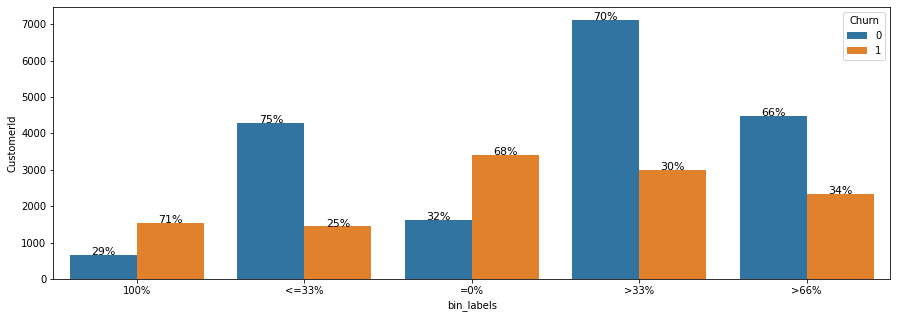

In [ ]:
fig, axes = plt.subplots(figsize = (15,5))

g=sns.barplot(x=xy_eating_mcc_groupby['bin_labels'],y=xy_eating_mcc_groupby['CustomerId'], hue=xy_eating_mcc_groupby['Churn'],order=bin_labels_unique)

for p,(index, row) in zip(g.patches,xy_eating_mcc_groupby.sort_values('Churn').iterrows()): 
    g.annotate("{:.0%}".format(row.wgt),(p.get_x() + p.get_width() / 2.,p.get_height()),ha = 'center',size=11)


**Gambling MCC Weight**

In [ ]:
xy_merge_pivot.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,MinMonth_Card_trans,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,MinMonth_Transfers,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,MinMonth_Bills,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1.0,0.0,53.0,46.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.069767,0.0,0.744186,0.0,0.0,0.0,0.046512,0.0,0.069767,0.069767,43.0,2020-03,0.857143,0.142857,0.0,0.081633,0.265306,0.653061,0.142857,0.693878,0.163265,49.0,2019-08,0.5,0.125,0.375,0.0,1.0,0.0,8.0,2020-03,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,1.0,1.0,5.0,1.0,2.0,1.0


In [ ]:
bins = np.linspace(0, 1, 4)
gambling_mcc_bin = np.digitize(xy_merge_pivot[xy_merge_pivot['Card_trans_total']>0]['გართობა'], bins=bins)

In [ ]:
xy_gambling_mcc = xy_merge_pivot[xy_merge_pivot['Card_trans_total']>0][['CustomerId','გართობა','Churn']]

xy_gambling_mcc['bin'] = gambling_mcc_bin

In [ ]:
xy_gambling_mcc[xy_gambling_mcc['bin']==2]['გართობა'].min()

0.3333333333333333

In [ ]:
xy_gambling_mcc.loc[xy_gambling_mcc['bin']==4,'bin_labels'] = '100%'
xy_gambling_mcc.loc[xy_gambling_mcc['bin']==3,'bin_labels'] = '>66%'
xy_gambling_mcc.loc[xy_gambling_mcc['bin']==2,'bin_labels'] = '>33%'
xy_gambling_mcc.loc[xy_gambling_mcc['bin']==1,'bin_labels'] = '<=33%'
xy_gambling_mcc.loc[xy_gambling_mcc['გართობა']==0,'bin_labels'] = '=0%'
xy_gambling_mcc.loc[xy_gambling_mcc['გართობა']==0,'bin'] = 0

In [ ]:
xy_gambling_mcc_groupby = xy_gambling_mcc.groupby(by=['bin_labels','Churn'])['CustomerId'].nunique().reset_index()

In [ ]:
xy_gambling_mcc_groupby['wgt'] = xy_gambling_mcc_groupby.groupby('bin_labels')['CustomerId'].transform(lambda x: x/x.sum())

In [ ]:
bin_labels_unique = xy_gambling_mcc_groupby['bin_labels'].unique()

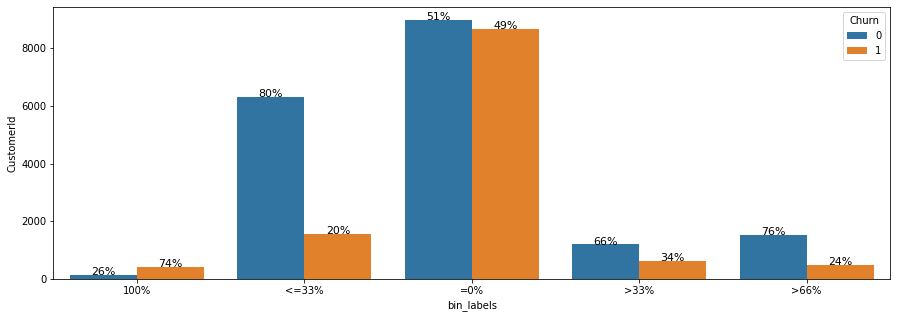

In [ ]:
fig, axes = plt.subplots(figsize = (15,5))

g=sns.barplot(x='bin_labels',y='CustomerId', data=xy_gambling_mcc_groupby, hue='Churn',order=bin_labels_unique)

for p,(index, row) in zip(g.patches,xy_gambling_mcc_groupby.sort_values('Churn').iterrows()): 
    g.annotate("{:.0%}".format(row.wgt),(p.get_x() + p.get_width() / 2.,p.get_height()),ha = 'center',size=11)


**Travel MCCs**

In [ ]:
xy_merge_pivot.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,MinMonth_Card_trans,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,MinMonth_Transfers,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,MinMonth_Bills,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label,Diff,Card_Diff,Transfer_Diff,Bill_Diff,Avg_Card_trans,Avg_Transfers,Avg_Bills
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1.0,0.0,53.0,46.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.069767,0.0,0.744186,0.0,0.0,0.0,0.046512,0.0,0.069767,0.069767,43.0,2020-03,0.857143,0.142857,0.0,0.081633,0.265306,0.653061,0.142857,0.693878,0.163265,49.0,2019-08,0.5,0.125,0.375,0.0,1.0,0.0,8.0,2020-03,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,1.0,1.0,5.0,1.0,2.0,1.0,9.0,3.0,10.0,3.0,14.333333,4.9,2.666667


In [ ]:
card_tran_file[card_tran_file['Subcategory']=='მოგზაურობა, დასვენება'].Category.unique()
card_tran_file['Subcategory'].unique()

array(['მგზავრობა', 'სხვა სამოგზაურო ხარჯი', 'სასტუმრო'], dtype=object)

In [ ]:
bins = np.linspace(0, 1, 4)
travel_mcc_bin = np.digitize(xy_merge_pivot[xy_merge_pivot['Card_trans_total']>0]['მოგზაურობა, დასვენება'], bins=bins)

In [ ]:
xy_travel_mcc = xy_merge_pivot[xy_merge_pivot['Card_trans_total']>0][['CustomerId','მოგზაურობა, დასვენება','Churn']]

xy_travel_mcc['bin'] = travel_mcc_bin

In [ ]:
xy_travel_mcc[xy_travel_mcc['bin']==2]['მოგზაურობა, დასვენება'].min()

0.3333333333333333

In [ ]:
xy_travel_mcc.loc[xy_travel_mcc['bin']==4,'bin_labels'] = '100%'
xy_travel_mcc.loc[xy_travel_mcc['bin']==3,'bin_labels'] = '>66%'
xy_travel_mcc.loc[xy_travel_mcc['bin']==2,'bin_labels'] = '>33%'
xy_travel_mcc.loc[xy_travel_mcc['bin']==1,'bin_labels'] = '<=33%'
xy_travel_mcc.loc[xy_travel_mcc['მოგზაურობა, დასვენება']==0,'bin_labels'] = '=0%'
xy_travel_mcc.loc[xy_travel_mcc['მოგზაურობა, დასვენება']==0,'bin'] = 0

In [ ]:
xy_travel_mcc_groupby = xy_travel_mcc.groupby(by=['bin_labels','Churn'])['CustomerId'].nunique().reset_index()

In [ ]:
xy_travel_mcc_groupby['wgt'] = xy_travel_mcc_groupby.groupby('bin_labels')['CustomerId'].transform(lambda x: x/x.sum())

In [ ]:
bin_labels_unique = xy_travel_mcc_groupby['bin_labels'].unique()

**Shopping MCCs**

In [ ]:
xy_merge_pivot.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,MinMonth_Card_trans,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,MinMonth_Transfers,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,MinMonth_Bills,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1.0,0.0,53.0,46.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.069767,0.0,0.744186,0.0,0.0,0.0,0.046512,0.0,0.069767,0.069767,43.0,2020-03,0.857143,0.142857,0.0,0.081633,0.265306,0.653061,0.142857,0.693878,0.163265,49.0,2019-08,0.5,0.125,0.375,0.0,1.0,0.0,8.0,2020-03,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,1.0,1.0,5.0,1.0,2.0,1.0


In [ ]:
card_tran_file[card_tran_file['Subcategory']=='შოპინგი'].Category.unique()
card_tran_file['Subcategory'].unique()

array(['ავტომანქანის ხარჯი', 'საწვავი', 'ტაქსი, მუნიციპ. ტრანს.'],
      dtype=object)

In [ ]:
bins = np.linspace(0, 1, 4)
shopping_mcc_bin = np.digitize(xy_merge_pivot[xy_merge_pivot['Card_trans_total']>0]['შოპინგი'], bins=bins)

In [ ]:
xy_shopping_mcc = xy_merge_pivot[xy_merge_pivot['Card_trans_total']>0][['CustomerId','შოპინგი','Churn']]

xy_shopping_mcc['bin'] = travel_mcc_bin

In [ ]:
xy_shopping_mcc[xy_shopping_mcc['bin']==2]['შოპინგი'].min()

0.0

In [ ]:
xy_shopping_mcc.loc[xy_shopping_mcc['bin']==4,'bin_labels'] = '100%'
xy_shopping_mcc.loc[xy_shopping_mcc['bin']==3,'bin_labels'] = '>66%'
xy_shopping_mcc.loc[xy_shopping_mcc['bin']==2,'bin_labels'] = '>33%'
xy_shopping_mcc.loc[xy_shopping_mcc['bin']==1,'bin_labels'] = '<=33%'
xy_shopping_mcc.loc[xy_shopping_mcc['შოპინგი']==0,'bin_labels'] = '=0%'
xy_shopping_mcc.loc[xy_shopping_mcc['შოპინგი']==0,'bin'] = 0

In [ ]:
xy_shopping_mcc_groupby = xy_shopping_mcc.groupby(by=['bin_labels','Churn'])['CustomerId'].nunique().reset_index()

In [ ]:
xy_shopping_mcc_groupby['wgt'] = xy_shopping_mcc_groupby.groupby('bin_labels')['CustomerId'].transform(lambda x: x/x.sum())

In [ ]:
bin_labels_unique = xy_travel_mcc_groupby['bin_labels'].unique()

**Eating + Gambling MCC**

In [ ]:
xy_eating_mcc.head(1)

,CustomerId,კვება,Churn,bin,bin_labels
0,000326ee-435b-4f45-8590-71684c39f4e0,0.744186,0,3,>66%


In [ ]:
xy_gambling_mcc.head(1)

,CustomerId,გართობა,Churn,bin,bin_labels
0,000326ee-435b-4f45-8590-71684c39f4e0,0.0,0,0,=0%


In [ ]:
customer_churn_cardtrans = xy_merge_pivot[xy_merge_pivot['Card_trans_total']>0][['CustomerId','Churn']]

xy_eating_gambling_mcc = pd.merge(pd.merge(customer_churn_cardtrans,xy_eating_mcc[['CustomerId','კვება','bin','bin_labels']],how='left',on='CustomerId'),xy_gambling_mcc[['CustomerId','გართობა','bin','bin_labels']],how='left',on='CustomerId')
xy_eating_gambling_mcc.rename(columns={'bin_x':'Eating_bin','bin_labels_x':'Eating_wgt','bin_y':'Gambling_bin','bin_labels_y':'Gambling_wgt'},inplace=True)
xy_eating_gambling_mcc.rename(columns={'bin_x':'Eating_bin','bin_labels_x':'Eating_wgt','bin_y':'Gambling_bin','bin_labels_y':'Gambling_wgt'},inplace=True)

xy_eating_travel_mcc = pd.merge(pd.merge(customer_churn_cardtrans,xy_eating_mcc[['CustomerId','კვება','bin','bin_labels']],how='left',on='CustomerId'),xy_travel_mcc[['CustomerId','მოგზაურობა, დასვენება','bin','bin_labels']],how='left',on='CustomerId')
xy_eating_travel_mcc.rename(columns={'bin_x':'Eating_bin','bin_labels_x':'Eating_wgt','bin_y':'Travel_bin','bin_labels_y':'Travel_wgt'},inplace=True)
xy_eating_travel_mcc.rename(columns={'bin_x':'Eating_bin','bin_labels_x':'Eating_wgt','bin_y':'Travel_bin','bin_labels_y':'Travel_wgt'},inplace=True)

xy_eating_shopping_mcc = pd.merge(pd.merge(customer_churn_cardtrans,xy_eating_mcc[['CustomerId','კვება','bin','bin_labels']],how='left',on='CustomerId'),xy_shopping_mcc[['CustomerId','შოპინგი','bin','bin_labels']],how='left',on='CustomerId')
xy_eating_shopping_mcc.rename(columns={'bin_x':'Eating_bin','bin_labels_x':'Eating_wgt','bin_y':'Shopping_bin','bin_labels_y':'Shopping_wgt'},inplace=True)
xy_eating_shopping_mcc.rename(columns={'bin_x':'Eating_bin','bin_labels_x':'Eating_wgt','bin_y':'Shopping_bin','bin_labels_y':'Shopping_wgt'},inplace=True)

In [ ]:
xy_eating_gambling_mcc.head(1)
xy_eating_travel_mcc.head(1)

,CustomerId,Churn,კვება,Eating_bin,Eating_wgt,"მოგზაურობა, დასვენება",Travel_bin,Travel_wgt
0,000326ee-435b-4f45-8590-71684c39f4e0,0,0.744186,3,>66%,0.0,0,=0%


In [ ]:
xy_eating_gambling_mcc_groupby = xy_eating_gambling_mcc.groupby(by=['Churn','Eating_bin','Gambling_bin'])['CustomerId'].count().reset_index()
xy_eating_travel_mcc_groupby = xy_eating_travel_mcc.groupby(by=['Churn','Eating_bin','Travel_bin'])['CustomerId'].count().reset_index()
xy_eating_shopping_mcc_groupby = xy_eating_shopping_mcc.groupby(by=['Churn','Eating_bin','Shopping_bin'])['CustomerId'].count().reset_index()

In [ ]:
xy_eating_gambling_mcc_pivot = xy_eating_gambling_mcc_groupby.pivot_table(values='CustomerId',index=['Eating_bin','Gambling_bin'],columns='Churn')
xy_eating_travel_mcc_pivot = xy_eating_travel_mcc_groupby.pivot_table(values='CustomerId',index=['Eating_bin','Travel_bin'],columns='Churn')
xy_eating_shopping_mcc_pivot = xy_eating_shopping_mcc_groupby.pivot_table(values='CustomerId',index=['Eating_bin','Shopping_bin'],columns='Churn')

In [ ]:
xy_eating_gambling_mcc_pivot['Churn_rate'] = xy_eating_gambling_mcc_pivot[1] / (xy_eating_gambling_mcc_pivot[0] + xy_eating_gambling_mcc_pivot[1])
xy_eating_gambling_mcc_pivot['Total'] = (xy_eating_gambling_mcc_pivot[0] + xy_eating_gambling_mcc_pivot[1])

xy_eating_travel_mcc_pivot['Churn_rate'] = xy_eating_travel_mcc_pivot[1] / (xy_eating_travel_mcc_pivot[0] + xy_eating_travel_mcc_pivot[1])
xy_eating_travel_mcc_pivot['Total'] = (xy_eating_travel_mcc_pivot[0] + xy_eating_travel_mcc_pivot[1])

xy_eating_shopping_mcc_pivot['Churn_rate'] = xy_eating_shopping_mcc_pivot[1] / (xy_eating_shopping_mcc_pivot[0] + xy_eating_shopping_mcc_pivot[1])
xy_eating_shopping_mcc_pivot['Total'] = (xy_eating_shopping_mcc_pivot[0] + xy_eating_shopping_mcc_pivot[1])

In [ ]:
xy_eating_gambling_mcc_pivot
xy_eating_shopping_mcc_pivot
xy_eating_shopping_mcc_pivot

Churn                       0     1  Churn_rate  Total
Eating_bin Shopping_bin                               
0          0             1371  3030    0.688480   4401
           1              244   373    0.604538    617
           2                5     1    0.166667      6
           3                5     1    0.166667      6
1          0             1588   829    0.342987   2417
           1             2527   589    0.189024   3116
           2              139    19    0.120253    158
           3               23     3    0.115385     26
2          0             2081  1702    0.449907   3783
           1             4903  1282    0.207276   6185
           2              130    20    0.133333    150
3          0             2096  1638    0.438672   3734
           1             2386   700    0.226831   3086
4          0              648  1549    0.705052   2197

In [ ]:
xy_eating_gambling_mcc_heatcount = xy_eating_gambling_mcc_pivot.pivot_table(values='Total',index='Eating_bin',columns='Gambling_bin')
xy_eating_gambling_mcc_heatwgt = xy_eating_gambling_mcc_pivot.pivot_table(values='Churn_rate',index='Eating_bin',columns='Gambling_bin')

xy_eating_travel_mcc_heatcount = xy_eating_travel_mcc_pivot.pivot_table(values='Total',index='Eating_bin',columns='Travel_bin')
xy_eating_travel_mcc_heatwgt = xy_eating_travel_mcc_pivot.pivot_table(values='Churn_rate',index='Eating_bin',columns='Travel_bin')

xy_eating_shopping_mcc_heatcount = xy_eating_shopping_mcc_pivot.pivot_table(values='Total',index='Eating_bin',columns='Shopping_bin')
xy_eating_shopping_mcc_heatwgt = xy_eating_shopping_mcc_pivot.pivot_table(values='Churn_rate',index='Eating_bin',columns='Shopping_bin')

In [ ]:
xy_eating_gambling_mcc_heatwgt.sort_index(ascending=False, inplace=True)
xy_eating_gambling_mcc_heatcount.sort_index(ascending=False, inplace=True)

xy_eating_travel_mcc_heatwgt.sort_index(ascending=False, inplace=True)
xy_eating_travel_mcc_heatcount.sort_index(ascending=False, inplace=True)

xy_eating_shopping_mcc_heatwgt.sort_index(ascending=False, inplace=True)
xy_eating_shopping_mcc_heatcount.sort_index(ascending=False, inplace=True)

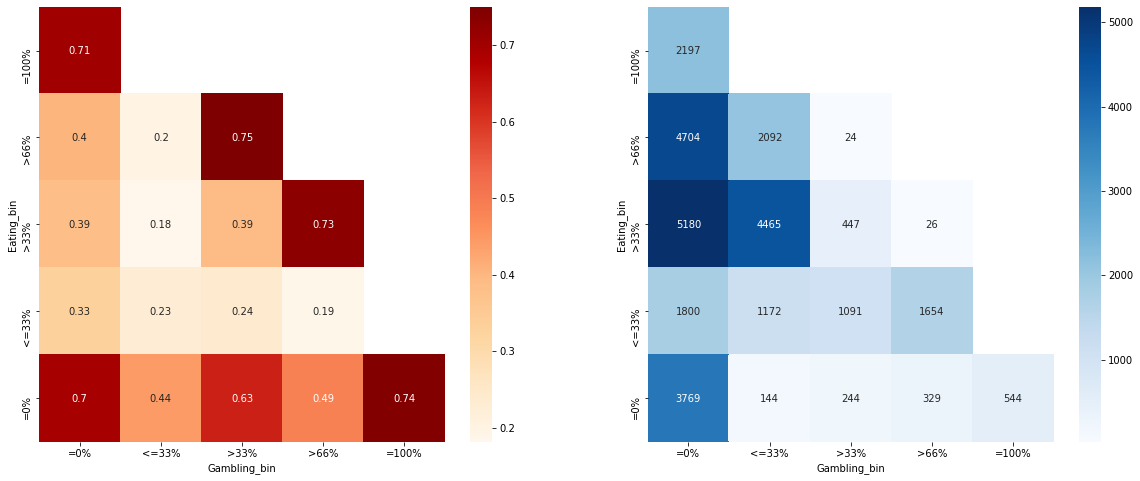

In [ ]:
fig,axes = plt.subplots (1,2, figsize=(20,8))

sns.heatmap(xy_eating_gambling_mcc_heatwgt, cmap="OrRd", annot=True, ax=axes[0])
sns.heatmap(xy_eating_gambling_mcc_heatcount, cmap="Blues", annot=True, ax=axes[1], fmt='g')

axes[0].set_xticklabels(['=0%','<=33%','>33%','>66%','=100%'])
axes[1].set_xticklabels(['=0%','<=33%','>33%','>66%','=100%'])

axes[0].set_yticklabels(['=100%','>66%','>33%', '<=33%','=0%'])
axes[1].set_yticklabels(['=100%','>66%','>33%', '<=33%','=0%'])

plt.show()

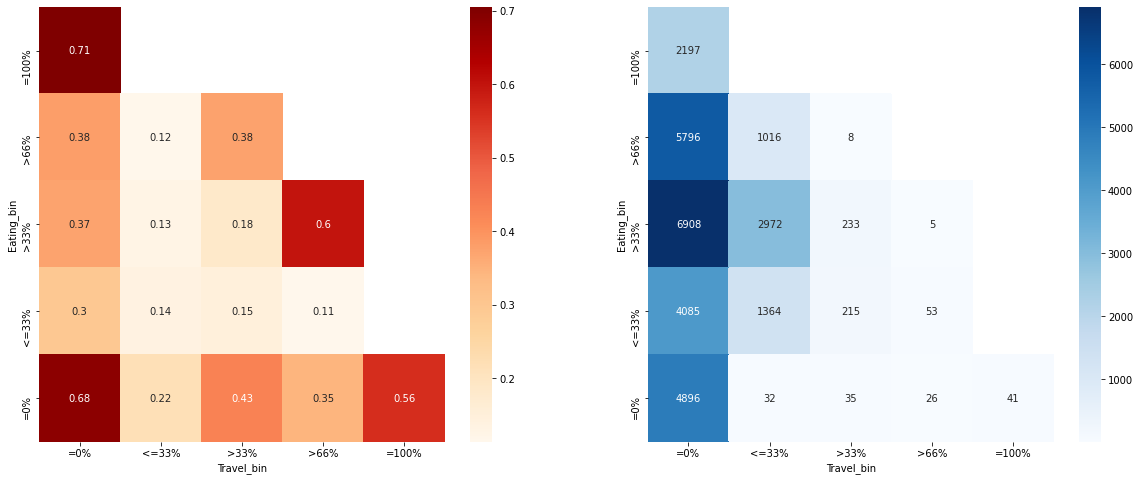

In [ ]:
fig,axes = plt.subplots (1,2, figsize=(20,8))

sns.heatmap(xy_eating_travel_mcc_heatwgt, cmap="OrRd", annot=True, ax=axes[0])
sns.heatmap(xy_eating_travel_mcc_heatcount, cmap="Blues", annot=True, ax=axes[1], fmt='g')

axes[0].set_xticklabels(['=0%','<=33%','>33%','>66%','=100%'])
axes[1].set_xticklabels(['=0%','<=33%','>33%','>66%','=100%'])

axes[0].set_yticklabels(['=100%','>66%','>33%', '<=33%','=0%'])
axes[1].set_yticklabels(['=100%','>66%','>33%', '<=33%','=0%'])

plt.show()

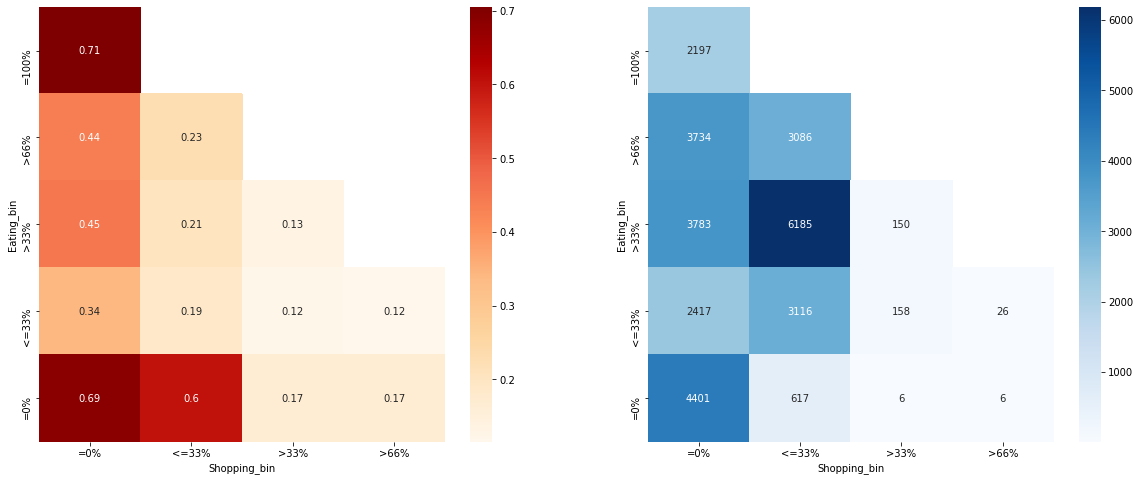

In [ ]:
fig,axes = plt.subplots (1,2, figsize=(20,8))

sns.heatmap(xy_eating_shopping_mcc_heatwgt, cmap="OrRd", annot=True, ax=axes[0])
sns.heatmap(xy_eating_shopping_mcc_heatcount, cmap="Blues", annot=True, ax=axes[1], fmt='g')

axes[0].set_xticklabels(['=0%','<=33%','>33%','>66%','=100%'])
axes[1].set_xticklabels(['=0%','<=33%','>33%','>66%','=100%'])

axes[0].set_yticklabels(['=100%','>66%','>33%', '<=33%','=0%'])
axes[1].set_yticklabels(['=100%','>66%','>33%', '<=33%','=0%'])

plt.show()

In [ ]:
xy_eating_gambling_mcc[['Eating_bin','Eating_wgt']].drop_duplicates().sort_values('Eating_bin')
xy_eating_gambling_mcc[['Gambling_bin','Gambling_wgt']].drop_duplicates().sort_values('Gambling_bin')

,Gambling_bin,Gambling_wgt
0,0,=0%
4,1,<=33%
36,2,>33%
1,3,>66%
58,4,100%


In [ ]:
#fig,axes = plt.subplots(figsize=(15,10))

#sc = sns.catplot( x='bin_x', y='bin_y', data=xy_eating_gambling_mcc_groupby,  hue='Churn')
#sc.set_xlabels('Eating MCC')
#sc.set_ylabels('Gambling MCC')

#sc.set_xticklabels(['<=33%','>33%','>66%','100%'])


**Age**

In [ ]:
xy_merge_pivot['Age'].min()

0.0

In [ ]:
bins = np.linspace(0, 100, 10)
age_bin = np.digitize(xy_merge_pivot['Age'], bins=bins)

In [ ]:
xy_age = xy_merge_pivot.loc[:,['CustomerId','Age','Churn']]
xy_age['Age_bin'] = age_bin

In [ ]:
xy_age['Age_bin'].unique()

array([3, 4, 6, 2, 5, 1, 7, 9, 8])

In [ ]:
xy_age.groupby(by=['Age_bin'])['Age'].max()

Age_bin
1     0.0
2    22.0
3    33.0
4    44.0
5    55.0
6    66.0
7    77.0
8    88.0
9    95.0
Name: Age, dtype: float64

In [ ]:
xy_age.loc[xy_age['Age_bin'].isin([1,2]),'Age_Label'] = '<=22'
xy_age.loc[xy_age['Age_bin'].isin([3]),'Age_Label'] = '<=33'
xy_age.loc[xy_age['Age_bin'].isin([4]),'Age_Label'] = '<=44'
xy_age.loc[xy_age['Age_bin'].isin([5]),'Age_Label'] = '<=55'
xy_age.loc[xy_age['Age_bin'].isin([6,7,8,9]),'Age_Label'] = '>55'

In [ ]:
xy_age_groupby = xy_age.groupby(by=['Age_Label','Churn'])['CustomerId'].count().reset_index()

In [ ]:
xy_age_groupby['wgt'] = xy_age_groupby.groupby('Age_Label')['CustomerId'].transform(lambda x: x/x.sum())

In [ ]:
xy_age_groupby.sort_values('Churn')

,Age_Label,Churn,CustomerId,wgt
0,<=22,0,5664,0.414550
2,<=33,0,14856,0.421279
4,<=44,0,5433,0.488360
6,<=55,0,1547,0.399226
8,>55,0,481,0.320881
1,<=22,1,7999,0.585450
3,<=33,1,20408,0.578721
5,<=44,1,5692,0.511640
7,<=55,1,2328,0.600774
9,>55,1,1018,0.679119


In [ ]:
unique_age = xy_age_groupby['Age_Label'].unique()

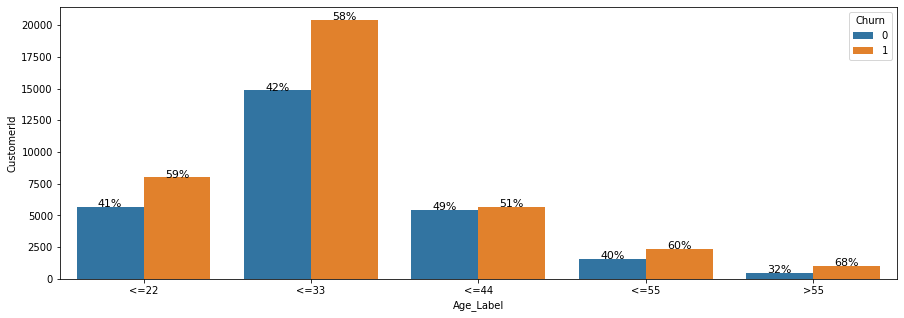

In [ ]:
fig,axes = plt.subplots(figsize=(15,5))

g=sns.barplot(data=xy_age_groupby,x='Age_Label',y='CustomerId',hue='Churn', order=unique_age)

for p,(index, row) in zip(g.patches,xy_age_groupby.sort_values('Churn').iterrows()): 
    g.annotate("{:.0%}".format(row.wgt),(p.get_x() + p.get_width() / 2.,p.get_height()),ha = 'center',size=11)


**Card Trans Count**


In [ ]:
xy_merge_pivot.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1.0,0.0,53.0,46.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.069767,0.0,0.744186,0.0,0.0,0.0,0.046512,0.0,0.069767,0.069767,43.0,0.857143,0.142857,0.0,0.081633,0.265306,0.653061,0.142857,0.693878,0.163265,49.0,0.5,0.125,0.375,0.0,1.0,0.0,8.0,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,1.0,1.0,5.0,1.0,2.0,1.0


In [ ]:
card_trans_julchrn = card_tran_file[pd.to_datetime(card_tran_file['DateTime'])<pd.to_datetime('20200501')]

In [ ]:
card_trans_julchrn_groupby = card_trans_julchrn.groupby(by='CustomerId')['DateTime'].agg(['min','max']).reset_index()

In [ ]:
card_trans_julchrn_groupby['MonthDiff'] = round((pd.to_datetime(card_trans_julchrn_groupby['max']) - pd.to_datetime(card_trans_julchrn_groupby['min'])).astype('timedelta64[D]')/30)

In [ ]:
card_trans_julchrn_groupby.head()

,CustomerId,min,max,MonthDiff
0,000326ee-435b-4f45-8590-71684c39f4e0,2020-03-12 00:00:00,2020-04-29 00:00:00,2.0
1,000a0eac-5601-485c-940b-bc1594fb944a,2018-05-27 15:27:00,2019-01-17 15:08:00,8.0
2,000a3045-3bf1-4fa5-82ca-153fcfe7f848,2019-06-29 00:00:00,2019-11-14 12:56:00,5.0
3,000f084c-2852-4022-8505-c158d96061b8,2019-12-26 00:00:00,2020-04-29 08:12:00,4.0
4,000f95fa-4e3c-4934-aeb2-dbd9ca72ba88,2019-08-29 00:00:00,2020-04-11 11:02:00,8.0


In [ ]:
card_trans_xy = xy_merge_pivot[['CustomerId','Churn','Card_trans_total']]
card_trans_xy = pd.merge(card_trans_xy,card_trans_julchrn_groupby,on='CustomerId')

In [ ]:
card_trans_xy['AVG_Count'] = card_trans_xy['Card_trans_total'] / card_trans_xy['MonthDiff']

In [ ]:
transfers_df.head(2)

,UserId,IS_Verified,TransferId,End_Status,SendTimeStamp,Platform,ReceiveTimeStamp,Transfer_Amount,Transfer_Fee,Type,Source_BID,Source_Card_Provider,Receiver_Bank_ID,Dest_BID,Dest_Card_Provider,IRF_AFT,UFC_AFT,QRTLY_AFT,P2P_AFT,Clearing_AFT,IRF_OCT,UFC_OCT,QRTLY_OCT,P2P_OCT,Clearing_OCT,NBG_OCT,UC_Code,UC_Rate,CC_Code,CC_Rate
0,2d5ff50d-d2e7-45bc-833d-6f878711881f,True,6a4dfe0f-5372-468c-b109-79a9b2adc1f1,0,2020-05-28 20:32:18.058483,None,2020-05-28 20:32:20.973358,30.0,0.0,C2C,BG,MC,TB,TB,MC,0.0,0.019141,0.01530,0.25,0.256588,0.0,0.019141,0.01530,0.0,0.0,0.0,USD,3.190100,EUR,3.514900
1,1728a16e-b9e6-40b0-9325-3d1f5553b33f,True,20e77d00-d273-49b7-8316-6674c6b6be45,0,2020-03-09 00:14:30.312406,None,2020-03-09 00:14:34.696445,45.0,0.0,C2C,BG,MC,TB,TB,MC,0.0,0.016649,0.02295,0.25,0.229118,0.0,0.016649,0.02295,0.0,0.0,0.0,USD,2.774800,EUR,3.138600


In [ ]:
transfers_julchrn = transfers_df[pd.to_datetime(transfers_df['SendTimeStamp'])<pd.to_datetime('20200501')]

In [ ]:
transfers_julchrn_groupby = transfers_julchrn.groupby(by='UserId')['SendTimeStamp'].agg(['min','max']).reset_index()

In [ ]:
transfers_julchrn_groupby['MonthDiff'] = round((pd.to_datetime(transfers_julchrn_groupby['max']) - pd.to_datetime(transfers_julchrn_groupby['min'])).astype('timedelta64[D]')/30)

In [ ]:
transfers_julchrn_groupby.rename(columns={'UserId':'CustomerId'}, inplace=True)
transfers_julchrn_groupby.head()

,CustomerId,min,max,MonthDiff
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08-19 10:05:45.663698,2020-04-27 10:14:51.637315,8.0
1,0003822f-1220-4f2a-8bb0-165cdcfc6b36,2018-07-19 18:47:56.542180,2019-11-26 13:36:48.479669,16.0
2,00052326-ae77-43c1-9995-bb21d721b912,2020-03-16 18:30:35.551371,2020-03-16 18:30:35.551371,0.0
3,00077fbf-b865-4fa2-868c-42f4f1166467,2020-02-17 17:33:46.636739,2020-02-17 17:33:46.636739,0.0
4,000a0eac-5601-485c-940b-bc1594fb944a,2018-05-13 18:31:10.147909,2018-05-27 15:25:51.653530,0.0


In [ ]:
transfers_xy = xy_merge_pivot[['CustomerId','Churn','Transfers_total']]
transfers_xy = pd.merge(transfers_xy,transfers_julchrn_groupby,on='CustomerId')

In [ ]:
transfers_xy['AVG_Count'] = transfers_xy['Transfers_total'] / transfers_xy['MonthDiff']

In [ ]:
bills_df.head(2)

,Amount,PaymentStatus,EndTimestamp,UserId,platform,Alias,Category,ServiceId,ServiceNameGEO,BID,Card_Provider,UFC,QRTLY,IRF,Clearing,TBPAY_Fee
0,22.0,Success,2020-01-31 22:09:37.543576,d054083e-72fe-4c31-bdde-9af984479200,None,INetConn,Utility,2583,SilkInternet - ოპტიკურ-ბოჭკოვანი ინტერნეტი,SP,IBAN,0.0,0.0,0.0,0.0,0.006
1,5.0,Success,2020-01-31 22:11:38.712723,1e4c7ecb-15eb-4aae-be3d-89c91463d85e,None,INetConn,Utility,944,მაგთიკომი (ინტერნეტი),SP,IBAN,0.0,0.0,0.0,0.0,0.006


In [ ]:
bills_julchrn = bills_df[pd.to_datetime(bills_df['EndTimestamp'])<pd.to_datetime('20200501')]

In [ ]:
bills_julchrn_groupby = bills_julchrn.groupby(by='UserId')['EndTimestamp'].agg(['min','max']).reset_index()

In [ ]:
bills_julchrn_groupby['MonthDiff'] = round((pd.to_datetime(bills_julchrn_groupby['max']) - pd.to_datetime(bills_julchrn_groupby['min'])).astype('timedelta64[D]')/30)

In [ ]:
bills_julchrn_groupby.rename(columns={'UserId':'CustomerId'}, inplace=True)
bills_julchrn_groupby.head()

,CustomerId,min,max,MonthDiff
0,000326ee-435b-4f45-8590-71684c39f4e0,2020-03-13 08:37:56.827190,2020-04-27 19:21:38.411820,2.0
1,0003822f-1220-4f2a-8bb0-165cdcfc6b36,2019-05-27 22:27:43.562442,2019-05-27 22:27:43.562442,0.0
2,00059d46-a485-4567-aaa0-2d14867ef922,2019-10-19 20:46:12.521116,2019-10-19 20:46:12.521116,0.0
3,000a3045-3bf1-4fa5-82ca-153fcfe7f848,2019-05-28 13:00:37.169833,2019-10-04 10:01:12.858882,4.0
4,000d65eb-71e0-4b18-861b-9def03eb396d,2018-05-21 20:41:00.428618,2018-05-21 20:41:00.428618,0.0


In [ ]:
bills_xy = xy_merge_pivot[['CustomerId','Churn','Bills_Count']]
bills_xy = pd.merge(bills_xy,bills_julchrn_groupby,on='CustomerId')

In [ ]:
bills_xy['AVG_Count'] = bills_xy['Bills_Count'] / bills_xy['MonthDiff']

In [ ]:
print(bills_xy.shape)
print(transfers_xy.shape)
print(card_trans_xy.shape)
card_trans_xy[card_trans_xy['Card_trans_total']>0].shape

(22341, 7)
(48740, 7)
(28951, 7)


(28951, 7)

In [ ]:
bills_xy.head()

,CustomerId,Churn,Bills_Count,min,max,MonthDiff,AVG_Count
0,000326ee-435b-4f45-8590-71684c39f4e0,0,8.0,2020-03-13 08:37:56.827190,2020-04-27 19:21:38.411820,2.0,4.00
1,0003822f-1220-4f2a-8bb0-165cdcfc6b36,1,1.0,2019-05-27 22:27:43.562442,2019-05-27 22:27:43.562442,0.0,inf
2,00059d46-a485-4567-aaa0-2d14867ef922,1,1.0,2019-10-19 20:46:12.521116,2019-10-19 20:46:12.521116,0.0,inf
3,000a3045-3bf1-4fa5-82ca-153fcfe7f848,1,33.0,2019-05-28 13:00:37.169833,2019-10-04 10:01:12.858882,4.0,8.25
4,000d65eb-71e0-4b18-861b-9def03eb396d,1,1.0,2018-05-21 20:41:00.428618,2018-05-21 20:41:00.428618,0.0,inf


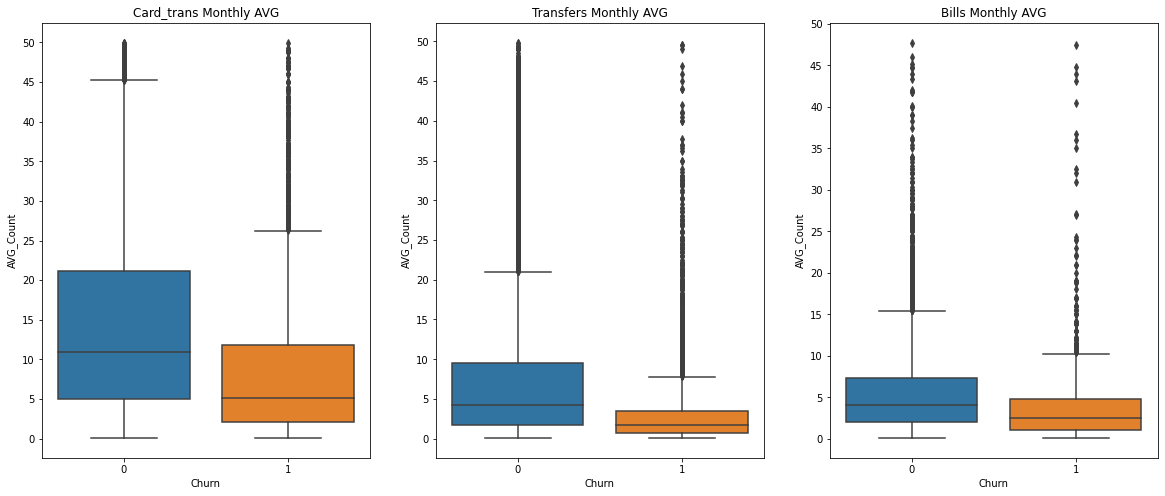

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(20,8))

sns.boxplot(x='Churn', y='AVG_Count', data=card_trans_xy[card_trans_xy['AVG_Count']<50],ax=ax[0])
sns.boxplot(x='Churn', y='AVG_Count', data=transfers_xy[transfers_xy['AVG_Count']<50],ax=ax[1])
sns.boxplot(x='Churn', y='AVG_Count', data=bills_xy[bills_xy['AVG_Count']<50],ax=ax[2])

ax[0].title.set_text('Card_trans Monthly AVG')
ax[1].title.set_text('Transfers Monthly AVG')
ax[2].title.set_text('Bills Monthly AVG')

ax[0].set_yticks(np.arange(0, 55,5))
ax[1].set_yticks(np.arange(0, 55,5))
ax[2].set_yticks(np.arange(0, 55,5))

plt.show()

**Salary & Credit Rating**


In [ ]:
salary_rating_xy = xy_merge_pivot[~xy_merge_pivot['CustomerId'].isin(['fa043213-f294-48c0-ba74-bb0992f16a25','fec8c511-a231-4c5a-a077-bcdb7528801d'])][xy_merge_pivot['SalaryCalculated']>0][['CustomerId','SalaryCalculated','creditrating_labels','Churn']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
salary_rating_xy.sort_values('SalaryCalculated', ascending=False)  #.to_excel('/content/drive/My Drive/Colab Notebooks/Export/salaries.xlsx')

,CustomerId,SalaryCalculated,creditrating_labels,Churn
60189,eb660e4b-d536-47aa-bd89-164830d0c763,9000000.00,3.0,1
60690,ed5ffae5-b8c5-44e6-9d9b-05b396f39c7f,6000000.00,7.0,0
55792,d9c9d515-d895-4fce-a0f9-339ab6ac6beb,5536439.00,13.0,1
9239,238a948d-01dc-4614-8cfe-a959a6a06d73,1520256.00,5.0,0
6183,17f54e87-b890-4fb1-b410-c771f0fcef02,1200150.00,5.0,1
...,...,...,...,...
21035,5151d839-fb4f-41e6-a531-41d0017c4eb7,0.25,13.0,0
21771,5429fdb5-212f-4e56-9de5-3d621e7fff0d,0.20,8.0,0
2687,0a56a481-13cf-4f3f-a181-b6cc186223e1,0.20,9.0,0
31546,7a81c935-25d0-46c7-a1ad-c14d879d3b7f,0.20,8.0,0


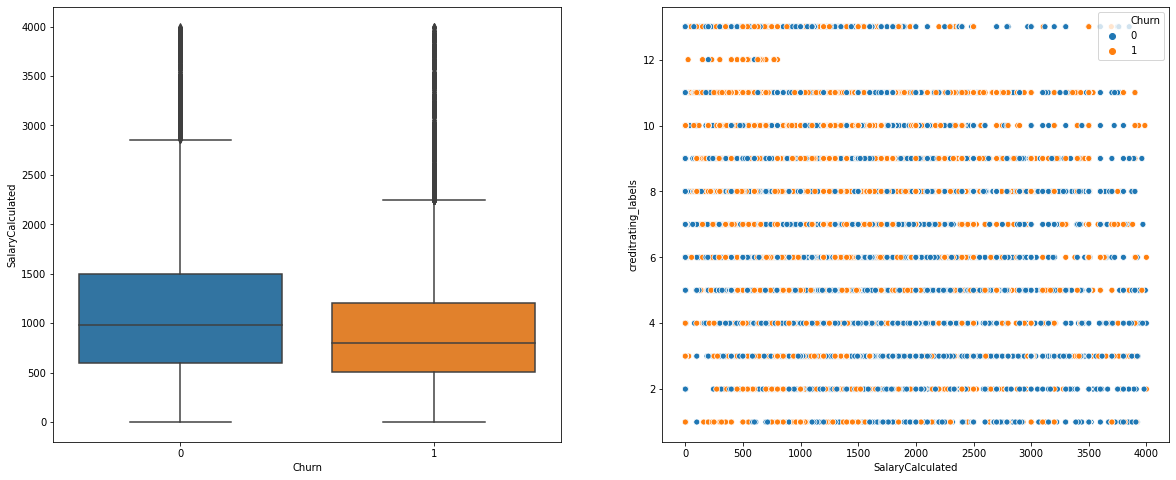

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.boxplot(x='Churn', y='SalaryCalculated', data=salary_rating_xy[salary_rating_xy['SalaryCalculated']<4000], ax=ax[0])
sns.scatterplot( x='SalaryCalculated', y='creditrating_labels', data=salary_rating_xy[salary_rating_xy['SalaryCalculated']<4000],  hue='Churn', ax=ax[1])

In [ ]:
#fig,axes = plt.subplots(figsize=(15,10))

#sc = sns.catplot( x='bin_x', y='bin_y', data=xy_eating_gambling_mcc_groupby,  hue='Churn')
#sc.set_xlabels('Eating MCC')
#sc.set_ylabels('Gambling MCC')

#sc.set_xticklabels(['<=33%','>33%','>66%','100%'])

**Correlation Matrix**

In [ ]:
xy_corr_data = xy_merge_pivot.drop(columns=['CustomerId','MinMonth','Churn','Churn_Before'])

In [ ]:
corr = xy_corr_data.corr()

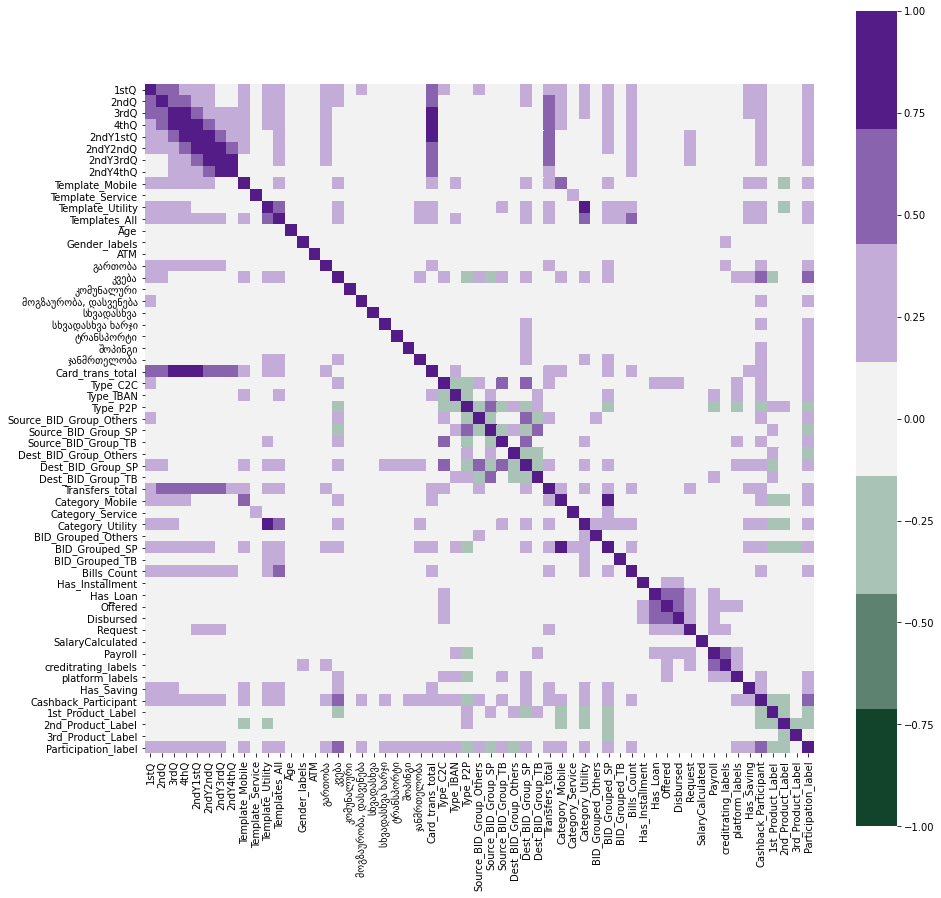

In [ ]:
fig,axes = plt.subplots(figsize=(15,15))

sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7), square=True)

**Templates**


In [ ]:
# bins = np.linspace(0, 1, 3)
# mobile_template_bin = np.digitize(xy_merge['Template_Mobile'], bins=bins)
# service_template_bin = np.digitize(xy_merge['Template_Service'], bins=bins)
# utility_template_bin = np.digitize(xy_merge['Template_Utility'], bins=bins)

In [ ]:
# xy_templates = xy_merge[['CustomerId','Template_Mobile','Template_Service','Template_Utility','Templates_All','Churn']]

# xy_templates.loc[:,'Template_Mobile_bins'] = 'Not_Only_mobile'
# xy_templates.loc[xy_templates['Template_Mobile']==1,'Template_Mobile_bins'] = 'Only_Mobile'
# xy_templates.loc[xy_templates['Template_Mobile']==0,'Template_Mobile_bins'] = 'No_Mobile'

# xy_templates.loc[:,'Template_Service_bins'] = 'Not_Only_Service'
# xy_templates.loc[xy_templates['Template_Service']==1,'Template_Service_bins'] = 'Only_Service'
# xy_templates.loc[xy_templates['Template_Service']==0,'Template_Service_bins'] = 'No_Service'

# xy_templates.loc[:,'Template_Utility_bins'] = 'Not_Only_utility'
# xy_templates.loc[xy_templates['Template_Utility']==1,'Template_Utility_bins'] = 'Only_Utility'
# xy_templates.loc[xy_templates['Template_Utility']==0,'Template_Utility_bins'] = 'No_Utility'

# xy_templates.loc[:,'Template_Counts_bins'] = 'Templates_>=10'
# xy_templates.loc[xy_templates['Templates_All']<10,'Template_Counts_bins'] = 'Templates_<10'
# xy_templates.loc[xy_templates['Templates_All']<3,'Template_Counts_bins'] = 'Templates_<3'
# xy_templates.loc[xy_templates['Templates_All']==0,'Template_Counts_bins'] = 'No_Template'

# xy_templates_groupby = xy_templates.groupby(by=['Template_Mobile','Template_Mobile_bins','Template_Service','Template_Service_bins','Template_Utility','Template_Utility_bins','Templates_All','Template_Counts_bins','Churn'])['CustomerId'].nunique().reset_index()
# xy_has_templates_groupby = xy_templates_groupby[xy_templates_groupby['Templates_All']!=0]

In [ ]:
# xy_templates.head()

In [ ]:
# fig, axes = plt.subplots(1,2, figsize = (15,5),)

# sns.barplot(x=xy_templates_groupby['Template_Counts_bins'],y=xy_templates_groupby['CustomerId'], hue=xy_templates_groupby['Churn'],ax=axes[0])
# sns.barplot(x=xy_has_templates_groupby['Template_Counts_bins'],y=xy_has_templates_groupby['CustomerId'], hue=xy_has_templates_groupby['Churn'],ax=axes[1])

In [ ]:
# fig, axes = plt.subplots(1,3, figsize = (25,5))

# sns.barplot(x=xy_has_templates_groupby['Template_Mobile_bins'],y=xy_has_templates_groupby['CustomerId'], hue=xy_has_templates_groupby['Churn'],ax=axes[0])
# sns.barplot(x=xy_has_templates_groupby['Template_Service_bins'],y=xy_has_templates_groupby['CustomerId'], hue=xy_has_templates_groupby['Churn'],ax=axes[1])
# sns.barplot(x=xy_has_templates_groupby['Template_Utility_bins'],y=xy_has_templates_groupby['CustomerId'], hue=xy_has_templates_groupby['Churn'],ax=axes[2])

**First Product**

In [ ]:
# products_from_lables = products_sorted[['2nd_Product_Label','2nd Product']].groupby(by=['2nd Product','2nd_Product_Label']).count().reset_index()
# products_from_lables.rename(columns={'2nd Product':'Product','2nd_Product_Label':'Product_Label'},inplace=True)

In [ ]:
# products_from_lables

In [ ]:
# product_sort_xy = xy_merge[['CustomerId','1st_Product_Label','2nd_Product_Label','3rd_Product_Label','Churn']]
# product_sort_xy_groupby = product_sort_xy.groupby(by=['1st_Product_Label','2nd_Product_Label','3rd_Product_Label','Churn'])['CustomerId'].nunique().reset_index()

# product_sort_xy_groupby = pd.merge(product_sort_xy_groupby,products_from_lables,how='left',left_on='1st_Product_Label',right_on='Product_Label')
# product_sort_xy_groupby.rename(columns={'Product':'1st_Product'},inplace=True)
# product_sort_xy_groupby.drop('Product_Label',axis=1,inplace=True)

# product_sort_xy_groupby = pd.merge(product_sort_xy_groupby,products_from_lables,how='left',left_on='2nd_Product_Label',right_on='Product_Label')
# product_sort_xy_groupby.rename(columns={'Product':'2nd_Product'},inplace=True)
# product_sort_xy_groupby.drop('Product_Label',axis=1,inplace=True)

# product_sort_xy_groupby = pd.merge(product_sort_xy_groupby,products_from_lables,how='left',left_on='3rd_Product_Label',right_on='Product_Label')
# product_sort_xy_groupby.rename(columns={'Product':'3rd_Product'},inplace=True)
# product_sort_xy_groupby.drop('Product_Label',axis=1,inplace=True)

In [ ]:
# product_sort_xy_groupby.head(3)

In [ ]:
# fig, axes = plt.subplots(1,3,figsize=(30,5))
 
# sns.barplot(x=product_sort_xy_groupby['1st_Product'],y=product_sort_xy_groupby['CustomerId'], hue=product_sort_xy_groupby['Churn'], ax=axes[0])
# sns.barplot(x=product_sort_xy_groupby['2nd_Product'],y=product_sort_xy_groupby['CustomerId'], hue=product_sort_xy_groupby['Churn'], ax=axes[1])
# sns.barplot(x=product_sort_xy_groupby['3rd_Product'],y=product_sort_xy_groupby['CustomerId'], hue=product_sort_xy_groupby['Churn'], ax=axes[2])

**Platforms**

In [ ]:
# platforms_xy = xy_merge[['CustomerId','platform_labels','Churn']]
# platforms_xy_groupby = platforms_xy[platforms_xy['platform_labels']!=0].groupby(by=['platform_labels','Churn'])['CustomerId'].nunique().reset_index()

In [ ]:
# sns.barplot(x=platforms_xy_groupby['platform_labels'],y=platforms_xy_groupby['CustomerId'],hue=platforms_xy_groupby['Churn'])

**CreditRatings**


In [ ]:
# creditrating_xy = xy_merge[['CustomerId','creditrating_labels','Churn']]
# creditrating_xy_groupby = creditrating_xy.groupby(by=['creditrating_labels','Churn'])['CustomerId'].nunique().reset_index()

In [ ]:
# credit_data[['CreditInfoRating','creditrating_labels']].groupby(by=['CreditInfoRating','creditrating_labels']).count().reset_index()

In [ ]:
# fig,axes = plt.subplots(figsize=(10,5))

# sns.barplot(x=creditrating_xy_groupby['creditrating_labels'],y=creditrating_xy_groupby['CustomerId'],hue=creditrating_xy['Churn'])

**Gamification & Cashbacks**

In [ ]:
# gami_from_labels = gamification_participation[['Participation','Participation_label']].groupby(by=['Participation','Participation_label']).count().reset_index()

In [ ]:
# cb_gam_xy = xy_merge[~((xy_merge['Cashback_Participant']!=0) & (xy_merge['Participation_label']==0))][['CustomerId','Cashback_Participant','Participation_label','Churn']]
# cb_gam_xy_groupby = cb_gam_xy.groupby(by=['Cashback_Participant','Participation_label','Churn'])['CustomerId'].nunique().reset_index()

# cb_gam_xy_groupby = pd.merge(cb_gam_xy_groupby,gami_from_labels,how='left',on='Participation_label')
# cb_gam_xy_groupby.loc[cb_gam_xy_groupby['Participation'].isnull(),'Participation'] = 'No_Part'

# cb_gam_xy_groupby['Cashback'] = 'NoCashback'
# cb_gam_xy_groupby.loc[cb_gam_xy_groupby['Cashback_Participant']==1,'Cashback'] = 'Cashbacked'

# cb_gam_xy_groupby['Combination'] = cb_gam_xy_groupby['Participation'] + ' | ' + cb_gam_xy_groupby['Cashback']

In [ ]:
# cb_gam_xy_groupby.head(3)

In [ ]:
# fig,axes = plt.subplots(figsize=(20,5))

# sns.barplot(x=cb_gam_xy_groupby['Combination'],y=cb_gam_xy_groupby['CustomerId'],hue=cb_gam_xy_groupby['Churn'])

**Payroll**

In [ ]:
# Payroll_xy = xy_merge[['Payroll','Churn','CustomerId']]

# Payroll_xy_groupby = Payroll_xy.groupby(by=['Payroll','Churn'])['CustomerId'].nunique().reset_index()

In [ ]:
# sns.barplot(x=Payroll_xy_groupby['Payroll'], y=Payroll_xy_groupby['CustomerId'],hue=Payroll_xy_groupby['Churn'])

In [ ]:
# xy_merge.head()

#Analysis

In [ ]:
scaler = StandardScaler()
minmax = MinMaxScaler()

For Loop

In [ ]:
xy_merge_pivot.head()

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,MinMonth_Card_trans,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,MinMonth_Transfers,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,MinMonth_Bills,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1.0,0.0,53.0,46.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.069767,0.0,0.744186,0.0,0.0,0.0,0.046512,0.0,0.069767,0.069767,43.0,2020-03,0.857143,0.142857,0.0,0.081633,0.265306,0.653061,0.142857,0.693878,0.163265,49.0,2019-08,0.5,0.125,0.375,0.0,1.0,0.0,8.0,2020-03,0.0,0.0,0.756757,0.135135,37.0,392.00,1.0,8.0,2.0,1.0,1.0,5.0,1.0,2.0,1.0
1,0003822f-1220-4f2a-8bb0-165cdcfc6b36,2018-07,1,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,40.0,2.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0,0.500000,0.000000,0.5,0.000000,1.000000,0.000000,0.500000,0.000000,0.500000,2.0,2018-07,0.0,1.000,0.000,0.0,0.0,1.0,1.0,2019-05,0.0,0.0,0.564706,0.070588,85.0,1617.00,2.0,3.0,2.0,1.0,0.0,5.0,1.0,6.0,1.0
2,00052326-ae77-43c1-9995-bb21d721b912,2020-03,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,24.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,2020-03,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0.0,1.0,1.000000,0.181818,11.0,490.00,2.0,6.0,2.0,0.0,0.0,6.0,3.0,4.0,1.0
3,000592a0-016f-480f-ba88-7fbba68ac0ee,2020-06,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,43.0,2.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.0,900.00,2.0,3.0,1.0,0.0,0.0,6.0,3.0,4.0,1.0
4,00059d46-a485-4567-aaa0-2d14867ef922,2019-10,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,28.0,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0,0.000,1.000,1.0,0.0,0.0,1.0,2019-10,0.0,0.0,0.555556,0.000000,9.0,439.04,1.0,9.0,2.0,0.0,0.0,1.0,3.0,4.0,1.0


In [ ]:
xy_merge_train_for_loop = xy_merge_pivot
xy_merge_test_for_loop = xy_merge_pivot_apr20
xy_merge_pred_for_loop = xy_merge_pivot_pred

yesterday = pd.to_datetime('20200531')
pre_yesterday = pd.to_datetime('20200229')
today = pd.to_datetime('20200831')

xy_merge_train_for_loop['Diff'] = (yesterday-pd.to_datetime(xy_merge_train_for_loop['MinMonth'])).astype('timedelta64[M]')
xy_merge_test_for_loop['Diff'] = (pre_yesterday-pd.to_datetime(xy_merge_test_for_loop['MinMonth'])).astype('timedelta64[M]')
xy_merge_pred_for_loop['Diff'] = (today-pd.to_datetime(xy_merge_pred_for_loop['MinMonth'])).astype('timedelta64[M]')

In [ ]:
xy_merge_train_for_loop['Card_Diff'] = 1
xy_merge_train_for_loop.loc[xy_merge_train_for_loop['Card_trans_total']!=0,'Card_Diff'] = (yesterday-pd.to_datetime(xy_merge_train_for_loop['MinMonth_Card_trans'])).astype('timedelta64[M]')+1

xy_merge_train_for_loop['Transfer_Diff'] = 1
xy_merge_train_for_loop.loc[xy_merge_train_for_loop['Transfers_total']!=0,'Transfer_Diff'] = (yesterday-pd.to_datetime(xy_merge_train_for_loop['MinMonth_Transfers'])).astype('timedelta64[M]')+1

xy_merge_train_for_loop['Bill_Diff'] = 1
xy_merge_train_for_loop.loc[xy_merge_train_for_loop['Bills_Count']!=0,'Bill_Diff'] = (yesterday-pd.to_datetime(xy_merge_train_for_loop['MinMonth_Bills'])).astype('timedelta64[M]')+1

xy_merge_train_for_loop['Avg_Card_trans'] = xy_merge_train_for_loop['Card_trans_total'] / xy_merge_train_for_loop['Card_Diff']
xy_merge_train_for_loop['Avg_Transfers'] = xy_merge_train_for_loop['Transfers_total'] / xy_merge_train_for_loop['Transfer_Diff']
xy_merge_train_for_loop['Avg_Bills'] = xy_merge_train_for_loop['Bills_Count'] / xy_merge_train_for_loop['Bill_Diff']


xy_merge_test_for_loop['Card_Diff'] = 1
xy_merge_test_for_loop.loc[xy_merge_test_for_loop['Card_trans_total']!=0,'Card_Diff'] = (yesterday-pd.to_datetime(xy_merge_test_for_loop['MinMonth_Card_trans'])).astype('timedelta64[M]')+1

xy_merge_test_for_loop['Transfer_Diff'] = 1
xy_merge_test_for_loop.loc[xy_merge_test_for_loop['Transfers_total']!=0,'Transfer_Diff'] = (yesterday-pd.to_datetime(xy_merge_test_for_loop['MinMonth_Transfers'])).astype('timedelta64[M]')+1

xy_merge_test_for_loop['Bill_Diff'] = 1
xy_merge_test_for_loop.loc[xy_merge_test_for_loop['Bills_Count']!=0,'Bill_Diff'] = (yesterday-pd.to_datetime(xy_merge_test_for_loop['MinMonth_Bills'])).astype('timedelta64[M]')+1

xy_merge_test_for_loop['Avg_Card_trans'] = xy_merge_test_for_loop['Card_trans_total'] / xy_merge_test_for_loop['Card_Diff']
xy_merge_test_for_loop['Avg_Transfers'] = xy_merge_test_for_loop['Transfers_total'] / xy_merge_test_for_loop['Transfer_Diff']
xy_merge_test_for_loop['Avg_Bills'] = xy_merge_test_for_loop['Bills_Count'] / xy_merge_test_for_loop['Bill_Diff']


xy_merge_pred_for_loop['Card_Diff'] = 1
xy_merge_pred_for_loop.loc[xy_merge_pred_for_loop['Card_trans_total']!=0,'Card_Diff'] = (yesterday-pd.to_datetime(xy_merge_pred_for_loop['MinMonth_Card_trans'])).astype('timedelta64[M]')+1

xy_merge_pred_for_loop['Transfer_Diff'] = 1
xy_merge_pred_for_loop.loc[xy_merge_pred_for_loop['Transfers_total']!=0,'Transfer_Diff'] = (yesterday-pd.to_datetime(xy_merge_pred_for_loop['MinMonth_Transfers'])).astype('timedelta64[M]')+1

xy_merge_pred_for_loop['Bill_Diff'] = 1
xy_merge_pred_for_loop.loc[xy_merge_pred_for_loop['Bills_Count']!=0,'Bill_Diff'] = (yesterday-pd.to_datetime(xy_merge_pred_for_loop['MinMonth_Bills'])).astype('timedelta64[M]')+1

xy_merge_pred_for_loop['Avg_Card_trans'] = xy_merge_pred_for_loop['Card_trans_total'] / xy_merge_pred_for_loop['Card_Diff']
xy_merge_pred_for_loop['Avg_Transfers'] = xy_merge_pred_for_loop['Transfers_total'] / xy_merge_pred_for_loop['Transfer_Diff']
xy_merge_pred_for_loop['Avg_Bills'] = xy_merge_pred_for_loop['Bills_Count'] / xy_merge_pred_for_loop['Bill_Diff']

In [ ]:
train_rank =  pd.DataFrame({'MinMonth':np.flip(np.sort(xy_merge_train_for_loop[~xy_merge_train_for_loop['MinMonth'].isin(['2020-08','2020-07','2020-06'])]['MinMonth'].unique()))}).reset_index()
test_rank = pd.DataFrame({'MinMonth':np.flip(np.sort(xy_merge_test_for_loop[~xy_merge_test_for_loop['MinMonth'].isin(['2020-05','2020-04','2020-03'])]['MinMonth'].unique()))}).reset_index()
pred_rank = pd.DataFrame({'MinMonth':np.flip(np.sort(xy_merge_pred_for_loop['MinMonth'].unique()))}).reset_index()

xy_merge_group_train_for_loop = pd.merge(xy_merge_train_for_loop,train_rank,how='left',on='MinMonth')
xy_merge_group_test_for_loop = pd.merge(xy_merge_test_for_loop,test_rank,how='left',on='MinMonth')
xy_merge_group_pred_for_loop = pd.merge(xy_merge_pred_for_loop,pred_rank,how='left',on='MinMonth')

print(xy_merge_group_train_for_loop[xy_merge_group_train_for_loop['index']==0]['MinMonth'].unique())
print(xy_merge_group_test_for_loop[xy_merge_group_test_for_loop['index']==0]['MinMonth'].unique())
print(xy_merge_group_pred_for_loop[xy_merge_group_pred_for_loop['index']==0]['MinMonth'].unique())

['2020-05']
['2020-02']
['2020-08']


In [ ]:
xy_merge_group_train_for_loop.replace([np.inf, -np.inf], 0,inplace=True)
xy_merge_group_test_for_loop.replace([np.inf, -np.inf], 0,inplace=True)
xy_merge_group_pred_for_loop.replace([np.inf, -np.inf], 0,inplace=True)

In [ ]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3}

steps = 20

predict_proba_df = pd.DataFrame([]) 

  #train

X_train = xy_merge_group_train_for_loop[(xy_merge_group_train_for_loop['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before','MinMonth_Card_trans','MinMonth_Transfers','MinMonth_Bills','Diff','index'],axis=1)
y_train = xy_merge_group_train_for_loop[(xy_merge_group_train_for_loop['Churn_Before']==0)]['Churn']

X_train_array = X_train.iloc[:,1:].to_numpy()
y_train_array = y_train.to_numpy()

X_train_scaled = minmax.fit_transform(X_train_array)

  #test

X_test = xy_merge_group_test_for_loop[(xy_merge_group_test_for_loop['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before','MinMonth_Card_trans','MinMonth_Transfers','MinMonth_Bills','Diff','index'],axis=1)
y_test = xy_merge_group_test_for_loop[(xy_merge_group_test_for_loop['Churn_Before']==0)]['Churn']

X_test_array = X_test.iloc[:,1:].to_numpy()
y_test_array = y_test.to_numpy()

X_test_scaled = minmax.fit_transform(X_test_array)

  #predict

X_pred = xy_merge_group_pred_for_loop[(xy_merge_group_pred_for_loop['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before','MinMonth_Card_trans','MinMonth_Transfers','MinMonth_Bills','Diff','index'],axis=1)
    
X_pred_array = X_pred.iloc[:,1:].to_numpy()
  
X_pred_scaled = minmax.transform(X_pred_array)

  #modeling

#random forrest

clf = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

clf.fit(X_train_scaled,y_train_array)
print('RandomForest train Score: {:.3f}'.format(clf.score(X_train_scaled,y_train_array)))
print('RandomForest test Score: {:.3f}'.format(clf.score(X_test_scaled,y_test_array)))
  
rf_prediction = clf.predict(X_test_scaled)
print(classification_report(y_test_array,rf_prediction))
  
predict_proba = clf.predict_proba(X_pred_scaled)

predict_proba_df.loc[:,'CustomerId'] =  X_pred['CustomerId']

predict_proba_df = pd.DataFrame({'CustomerId':X_pred['CustomerId'],'0':predict_proba[:,0],'1':predict_proba[:,1]})


  #model based selection

select = SelectFromModel(  RandomForestClassifier(max_depth=12, n_estimators=600, random_state=42),  threshold="median")
  
select.fit(X_train_scaled, y_train_array)
X_train_l1 = select.transform(X_train_scaled)
X_test_l1 = select.transform(X_test_scaled)
   
clf_l1 = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

clf_l1.fit(X_train_l1,y_train_array)
print('Model Selection RandomForest train Score: {:.3f}'.format(clf_l1.score(X_train_l1,y_train_array)))
print('Model Selection RandomForest test Score: {:.3f}'.format(clf_l1.score(X_test_l1,y_test_array)))
  
rf_prediction_l1 = clf_l1.predict(X_test_l1)
print(classification_report(y_test_array,rf_prediction_l1))


mask = select.get_support()
## visualize the mask -- black is True, white is False
#plt.matshow(mask_p2.reshape(1, -1), cmap='gray_r')
#plt.xlabel("Sample index")

 #xgboost

D_train = xgb.DMatrix(X_train_scaled, label=y_train_array)
D_test = xgb.DMatrix(X_test_scaled, label=y_test_array)
  
xgboost = xgb.train(param, D_train, steps)
  
preds = xgboost.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])
  
print("XGBoost Precision = {}".format(precision_score(y_test_array, best_preds, average='macro')))
print("XGBoost Recall = {}".format(recall_score(y_test_array, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test_array, best_preds)))
  
#gb_prediction_sample0 = gb_clf_sample0.predict(best_preds_sample0)
print(classification_report(y_test_array, best_preds))



RandomForest train Score: 0.907
RandomForest test Score: 0.802
              precision    recall  f1-score   support

           0       0.80      0.97      0.88     16785
           1       0.79      0.35      0.48      6088

    accuracy                           0.80     22873
   macro avg       0.80      0.66      0.68     22873
weighted avg       0.80      0.80      0.77     22873

Model Selection RandomForest train Score: 0.911
Model Selection RandomForest test Score: 0.804
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     16785
           1       0.78      0.37      0.50      6088

    accuracy                           0.80     22873
   macro avg       0.79      0.66      0.69     22873
weighted avg       0.80      0.80      0.78     22873

XGBoost Precision = 0.7828204173568853
XGBoost Recall = 0.6819502573123726
Accuracy = 0.8070650985878547
              precision    recall  f1-score   support

           0       0.82     

In [ ]:
mask
X_train.iloc[:,1:].columns
selected_features = pd.DataFrame({'Feature':X_train.iloc[:,1:].columns,'incl':mask})

In [ ]:
selected_features[selected_features['incl']==False]

,Feature,incl
4,2ndY1stQ,False
5,2ndY2ndQ,False
6,2ndY3rdQ,False
7,2ndY4thQ,False
8,Template_Mobile,False
9,Template_Service,False
10,Template_Utility,False
11,Templates_All,False
13,Gender_labels,False
15,გართობა,False


In [ ]:
print(X_pred.shape)
print(predict_proba_df.shape) 
predict_proba[:,0]

(27981, 64)
(27981, 3)


array([0.98270428, 0.64423529, 0.30874348, ..., 0.46448822, 0.39425448,
       0.91202523])

In [ ]:
predict_proba_df[(predict_proba_df['0']<=0.7) & (predict_proba_df['1']<=0.7)]
predict_proba_df[predict_proba_df['1']>0.7]

predict_proba_df.to_excel('/content/drive/My Drive/Colab Notebooks/Export/predict_proba_df_agg.xlsx')

,CustomerId,0,1
6,00092423-28c9-4d23-8852-ee1c1e1eb263,0.208304,0.791696
48,00341a39-f784-402f-9e9b-5f420595099b,0.270274,0.729726
167,0092961d-a36a-4048-9599-c8f73a5dc511,0.150259,0.849741
433,01969424-8f2b-496d-904d-38182ca30c2e,0.216761,0.783239
455,01b6d09c-33a4-4358-b353-30acf800ba32,0.195635,0.804365
...,...,...,...
64997,fe63c462-061b-4af3-a522-481de17448a0,0.284203,0.715797
65123,fed92aa3-7679-4aaf-8862-730d8b239637,0.184330,0.815670
65131,fedccf0b-1950-4d57-a72a-66d81840c73f,0.160268,0.839732
65138,fee13fa3-ba93-4976-8135-f9e7d5e8bb9a,0.241660,0.758340


In [ ]:
predict_proba_df.head()

,CustomerId,0,1
0,000326ee-435b-4f45-8590-71684c39f4e0,0.982704,0.017296
2,00052326-ae77-43c1-9995-bb21d721b912,0.644235,0.355765
3,000592a0-016f-480f-ba88-7fbba68ac0ee,0.308743,0.691257
5,00077fbf-b865-4fa2-868c-42f4f1166467,0.338797,0.661203
6,00092423-28c9-4d23-8852-ee1c1e1eb263,0.208304,0.791696


In [ ]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3}

steps = 20

predict_proba_df_loop = pd.DataFrame([])

for i in range(round(xy_merge_group_test_for_loop['index'].max())):
  
  #train

  X_train = xy_merge_group_train_for_loop[(xy_merge_group_train_for_loop['index']==i) & (xy_merge_group_train_for_loop['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before','index'],axis=1)
  y_train = xy_merge_group_train_for_loop[(xy_merge_group_train_for_loop['index']==i) & (xy_merge_group_train_for_loop['Churn_Before']==0)]['Churn']

  X_train_array = X_train.iloc[:,1:].to_numpy()
  y_train_array = y_train.to_numpy()

  X_train_scaled = minmax.fit_transform(X_train_array)

  #test

  X_test = xy_merge_group_test_for_loop[(xy_merge_group_test_for_loop['index']==i) & (xy_merge_group_test_for_loop['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before','index'],axis=1)
  y_test = xy_merge_group_test_for_loop[(xy_merge_group_test_for_loop['index']==i) & (xy_merge_group_test_for_loop['Churn_Before']==0)]['Churn']

  X_test_array = X_test.iloc[:,1:].to_numpy()
  y_test_array = y_test.to_numpy()

  X_test_scaled = minmax.fit_transform(X_test_array)

  #predict

  X_pred = xy_merge_group_pred_for_loop[(xy_merge_group_pred_for_loop['index']==i) & (xy_merge_group_pred_for_loop['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before','index'],axis=1)
    
  X_pred_array = X_pred.iloc[:,1:].to_numpy()
  
  X_pred_scaled = minmax.transform(X_pred_array)

  #modeling
  

  #model based selection

  select = SelectFromModel(  RandomForestClassifier(max_depth=12, n_estimators=600, random_state=42),  threshold="median")
  
  select.fit(X_train_scaled, y_train_array)
  X_train_l1 = select.transform(X_train_scaled)
  X_test_l1 = select.transform(X_test_scaled)
   
  clf_l1 = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

  clf_l1.fit(X_train_l1,y_train_array)
  print('Sample {} Model Selection RandomForest train Score: {:.3f}'.format(i,clf_l1.score(X_train_l1,y_train_array)))
  print('Sample {} Model Selection RandomForest test Score: {:.3f}'.format(i,clf_l1.score(X_test_l1,y_test_array)))
  
  rf_prediction_l1 = clf_l1.predict(X_test_l1)
  print(classification_report(y_test_array,rf_prediction_l1))

 
  #random forrest

  clf = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

  clf.fit(X_train_scaled,y_train_array)
  print('Sample {} RandomForest train Score: {:.3f}'.format(i,clf.score(X_train_scaled,y_train_array)))
  print('Sample {} RandomForest test Score: {:.3f}'.format(i,clf.score(X_test_scaled,y_test_array)))
  
  rf_prediction = clf.predict(X_test_scaled)
  print(classification_report(y_test_array,rf_prediction))
  
  predict_proba = clf.predict_proba(X_pred_scaled)

  predict_proba_df_loop = predict_proba_df_loop.append(pd.DataFrame(predict_proba))

  #xgboost

  D_train = xgb.DMatrix(X_train_scaled, label=y_train_array)
  D_test = xgb.DMatrix(X_test_scaled, label=y_test_array)
  
  xgboost = xgb.train(param, D_train, steps)
  
  preds = xgboost.predict(D_test)
  best_preds = np.asarray([np.argmax(line) for line in preds])
  
  print("Sample {} XGBoost Precision = {}".format(i,precision_score(y_test_array, best_preds, average='macro')))
  print("Sample {} XGBoost Recall = {}".format(i,recall_score(y_test_array, best_preds, average='macro')))
  print("Sample {} Accuracy = {}".format(i,accuracy_score(y_test_array, best_preds)))
  
  #gb_prediction_sample0 = gb_clf_sample0.predict(best_preds_sample0)
  print(classification_report(y_test_array, best_preds))


Sample 0 Model Selection RandomForest train Score: 0.986
Sample 0 Model Selection RandomForest test Score: 0.817
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       975
           1       0.77      0.60      0.67       453

    accuracy                           0.82      1428
   macro avg       0.80      0.76      0.77      1428
weighted avg       0.81      0.82      0.81      1428

Sample 0 RandomForest train Score: 0.981
Sample 0 RandomForest test Score: 0.823
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       975
           1       0.79      0.60      0.68       453

    accuracy                           0.82      1428
   macro avg       0.81      0.76      0.78      1428
weighted avg       0.82      0.82      0.82      1428

Sample 0 XGBoost Precision = 0.804378929682475
Sample 0 XGBoost Recall = 0.7625063678043811
Sample 0 Accuracy = 0.819327731092437
              precisio

In [ ]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3}

steps = 20

predict_proba_df = pd.DataFrame([])

n=0

range(23)

for i in range(round(xy_merge_group_test_for_loop['index'].max())):

  if i >= 12 & i%3==0:
    n += 1

  #train
  X_train = xy_merge_group_train_for_loop[(xy_merge_group_train_for_loop['index'].isin(range(i-n,i+1))) & (xy_merge_group_train_for_loop['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before','index'],axis=1)
  y_train = xy_merge_group_train_for_loop[(xy_merge_group_train_for_loop['index'].isin(range(i-n,i+1))) & (xy_merge_group_train_for_loop['Churn_Before']==0)]['Churn']  
                                                                                                                                                             
  X_train_array = X_train.iloc[:,1:].to_numpy()
  y_train_array = y_train.to_numpy()  
      
  X_train_scaled = minmax.fit_transform(X_train_array)

     
  #test

  X_test = xy_merge_group_test_for_loop[(xy_merge_group_test_for_loop['index'].isin(range(i-n,i+1))) & (xy_merge_group_test_for_loop['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before','index'],axis=1)
  y_test = xy_merge_group_test_for_loop[(xy_merge_group_test_for_loop['index'].isin(range(i-n,i+1))) & (xy_merge_group_test_for_loop['Churn_Before']==0)]['Churn']  

  X_test_array = X_test.iloc[:,1:].to_numpy()
  y_test_array = y_test.to_numpy()

  X_test_scaled = minmax.transform(X_test_array)

  #predict

  X_pred = xy_merge_group_pred_for_loop[(xy_merge_group_pred_for_loop['index']==i) & (xy_merge_group_pred_for_loop['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before','index'],axis=1)
  X_pred_array = X_pred.iloc[:,1:].to_numpy()
  X_pred_scaled = minmax.transform(X_pred_array)


   
  #modeling


  #model based selection

  select = SelectFromModel(  RandomForestClassifier(max_depth=12, n_estimators=600, random_state=42),  threshold="median")
  
  select.fit(X_train_scaled, y_train_array)
  X_train_l1 = select.transform(X_train_scaled)
  X_test_l1 = select.transform(X_test_scaled)
   
  clf_l1 = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

  clf_l1.fit(X_train_l1,y_train_array)
  print('Sample {} Model Selection RandomForest train Score: {:.3f}'.format(i,clf_l1.score(X_train_l1,y_train_array)))
  print('Sample {} Model Selection RandomForest test Score: {:.3f}'.format(i,clf_l1.score(X_test_l1,y_test_array)))
  
  rf_prediction_l1 = clf_l1.predict(X_test_l1)
  print(classification_report(y_test_array,rf_prediction_l1))

 
  #random forrest

  clf = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

  clf.fit(X_train_scaled,y_train_array)
  print('Sample {} RandomForest train Score: {:.3f}'.format(i,clf.score(X_train_scaled,y_train_array)))
  print('Sample {} RandomForest test Score: {:.3f}'.format(i,clf.score(X_test_scaled,y_test_array)))
  
  rf_prediction = clf.predict(X_test_scaled)
  print(classification_report(y_test_array,rf_prediction))
  
  predict_proba = clf.predict_proba(X_pred_scaled)

  predict_proba_df = predict_proba_df.append(pd.DataFrame(predict_proba))

  #xgboost

  D_train = xgb.DMatrix(X_train_scaled, label=y_train_array)
  D_test = xgb.DMatrix(X_test_scaled, label=y_test_array)
  
  xgboost = xgb.train(param, D_train, steps)
  
  preds = xgboost.predict(D_test)
  best_preds = np.asarray([np.argmax(line) for line in preds])
  
  print("Sample {} XGBoost Precision = {}".format(i,precision_score(y_test_array, best_preds, average='macro')))
  print("Sample {} XGBoost Recall = {}".format(i,recall_score(y_test_array, best_preds, average='macro')))
  print("Sample {} Accuracy = {}".format(i,accuracy_score(y_test_array, best_preds)))
  
  #gb_prediction_sample0 = gb_clf_sample0.predict(best_preds_sample0)
  print(classification_report(y_test_array, best_preds))

Sample 0 Model Selection RandomForest train Score: 0.986
Sample 0 Model Selection RandomForest test Score: 0.811
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       975
           1       0.76      0.59      0.66       453

    accuracy                           0.81      1428
   macro avg       0.79      0.75      0.77      1428
weighted avg       0.81      0.81      0.80      1428

Sample 0 RandomForest train Score: 0.981
Sample 0 RandomForest test Score: 0.819
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       975
           1       0.79      0.59      0.67       453

    accuracy                           0.82      1428
   macro avg       0.81      0.76      0.77      1428
weighted avg       0.82      0.82      0.81      1428

Sample 0 XGBoost Precision = 0.8062533636113043
Sample 0 XGBoost Recall = 0.7641229410765835
Sample 0 Accuracy = 0.8207282913165266
              precis

In [ ]:
predict_proba_df[(predict_proba_df[0]<=0.8) & (predict_proba_df[1]<=0.7)]

,0,1
4,0.550949,0.449051
8,0.360910,0.639090
9,0.521419,0.478581
12,0.659167,0.340833
13,0.631488,0.368512
...,...,...
553,0.771667,0.228333
554,0.620000,0.380000
555,0.584333,0.415667
556,0.385098,0.614902


In [ ]:
select_p2 = SelectFromModel(
RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42),
threshold="median")

select_p2.fit(X_train_scaled_p2, y_train_p2)
X_train_l1_p2 = select_p2.transform(X_train_scaled_p2)
X_test_l1_p2 = select_p2.transform(X_test_scaled_p2)
print("X_train.shape: {}".format(X_train_scaled_p2.shape))
print("X_train_l1.shape: {}".format(X_train_l1_p2.shape))

print("X_test.shape: {}".format(X_test_scaled_p2.shape))
print("X_test_l1.shape: {}".format(X_test_l1_p2.shape))



clf_l1_p2 = RandomForestClassifier(max_depth=10,n_estimators=500, random_state=0)

clf_l1_p2.fit(X_train_l1_p2,y_train_p2)
print('RandomForest Score: {:.3f}'.format(clf_l1_p2.score(X_test_l1_p2,y_test_p2)))

rf_prediction_l1_p2 = clf_l1_p2.predict(X_test_l1_p2)
print(classification_report(y_test_p2,rf_prediction_l1_p2))

print(clf_l1_p2.predict_proba(X_test_l1_p2))

Train_Test split & Scaling

#churn 2019 sample3

In [ ]:
xy_merge_pivot.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,Card_trans_amount,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Transfer_Amount,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,Bills_Amount,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1.0,0.0,53.0,46.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.069767,0.0,0.744186,0.0,0.0,0.0,0.046512,0.0,0.069767,0.069767,43.0,640.09,0.857143,0.142857,0.0,0.081633,0.265306,0.653061,0.142857,0.693878,0.163265,49.0,1927.0,0.5,0.125,0.375,0.0,1.0,0.0,8.0,259.36,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,1.0,1.0,5.0,1.0,2.0,1.0


In [ ]:
xy_merge_pivot.shape

(65426, 64)

In [ ]:
xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2019-10','2019-11','2019-12'])) & (xy_merge_pivot['Churn_Before']==0)].head(3)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,Card_trans_amount,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Transfer_Amount,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,Bills_Amount,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
10,000f084c-2852-4022-8505-c158d96061b8,2019-12,0,0,162.0,186.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.714286,7.0,33.0,2.0,0.168627,0.000000,0.643137,0.0,0.0,0.035294,0.035294,0.007843,0.023529,0.086275,255.0,17451.75,0.000000,1.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,66.0,52361.7,0.259259,0.037037,0.703704,0.0,1.0,0.0,27.0,1108.93,0.0,1.0,0.732877,0.10274,146.0,3500.0,2.0,4.0,2.0,1.0,1.0,5.0,1.0,2.0,3.0
35,00241912-875d-4ab2-8a0d-49c5f166fcbb,2019-12,0,0,13.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,24.0,2.0,0.000000,0.982759,0.017241,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,58.0,7180.30,1.000000,0.000000,0.0,0.000000,0.500000,0.5,0.000000,0.500000,0.500000,6.0,2855.6,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00000,4.0,700.0,1.0,9.0,1.0,0.0,1.0,6.0,2.0,3.0,1.0
58,003b3f21-465a-42e7-94ec-78a8fbb190b8,2019-10,0,0,93.0,26.0,5.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,3.0,47.0,1.0,0.086538,0.000000,0.692308,0.0,0.0,0.028846,0.096154,0.000000,0.009615,0.086538,104.0,2193.83,0.857143,0.142857,0.0,0.642857,0.357143,0.0,0.285714,0.642857,0.071429,14.0,1689.0,1.000000,0.000000,0.000000,0.0,1.0,0.0,6.0,50.56,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0,2.0,1.0


In [ ]:
x_merge_pivot_2019 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2019-10','2019-11','2019-12'])) & (xy_merge_pivot['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_2019 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2019-10','2019-11','2019-12'])) & (xy_merge_pivot['Churn_Before']==0)]['Churn']
#x_merge_pivot_2019 = x_merge_pivot[xy_merge_pivot['MinMonth'].isin(['2019-09','2019-11','2019-12'])]


In [ ]:
X_array_p = x_merge_pivot_2019.iloc[:,1:].to_numpy()
y_array_p = y_merge_pivot_2019.to_numpy()

In [ ]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_array_p, y_array_p, test_size=0.30, random_state=42)

In [ ]:
X_train_scaled_p = minmax.fit_transform(X_train_p)
X_test_scaled_p = minmax.transform(X_test_p)

In [ ]:
select_p = SelectFromModel(
RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42),
threshold="median")

In [ ]:
select_p.fit(X_train_scaled_p, y_train_p)
X_train_l1_p = select_p.transform(X_train_scaled_p)
X_test_l1_p = select_p.transform(X_test_scaled_p)
print("X_train.shape: {}".format(X_train_scaled_p.shape))
print("X_train_l1.shape: {}".format(X_train_l1_p.shape))

print("X_test.shape: {}".format(X_test_scaled_p.shape))
print("X_test_l1.shape: {}".format(X_test_l1_p.shape))

X_train.shape: (3226, 60)
X_train_l1.shape: (3226, 30)
X_test.shape: (1383, 60)
X_test_l1.shape: (1383, 30)


In [ ]:
#test

In [ ]:
#Churn apr 2020 - min jul-sep

In [ ]:
x_merge_pivot_apr20_julsep19 = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2019-07','2019-08','2019-09']))&(xy_merge_pivot_apr20['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_apr20_julsep19 = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2019-07','2019-08','2019-09']))&(xy_merge_pivot_apr20['Churn_Before']==0)]['Churn']

In [ ]:
X_array_apr20_julsep19 = x_merge_pivot_apr20_julsep19.iloc[:,1:].to_numpy()
y_array_apr20_julsep19 = y_merge_pivot_apr20_julsep19.to_numpy()

In [ ]:
X_array_apr20_julsep19_scaled = minmax.transform(X_array_apr20_julsep19)

In [ ]:
#predict

In [ ]:
x_merge_pivot_sample3_pred = xy_merge_pivot_pred[(xy_merge_pivot_pred['MinMonth'].isin(['2020-01','2020-02','2020-03']))&(xy_merge_pivot_pred['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)

In [ ]:
X_array_sample3_pred = x_merge_pivot_sample3_pred.iloc[:,1:].to_numpy()

In [ ]:
X_array_sample3_scaled_pred = minmax.transform(X_array_sample3_pred)

#Churn 2020 sample2

In [ ]:
#train

In [ ]:
x_merge_pivot_2020 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2020-01','2020-02','2020-03'])) & (xy_merge_pivot['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_2020 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2020-01','2020-02','2020-03'])) & (xy_merge_pivot['Churn_Before']==0)]['Churn']

In [ ]:
X_array_p2 = x_merge_pivot_2020.iloc[:,1:].to_numpy()
y_array_p2 = y_merge_pivot_2020.to_numpy()

In [ ]:
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(X_array_p2, y_array_p2, test_size=0.30, random_state=42)

In [ ]:
X_train_scaled_p2 = minmax.fit_transform(X_train_p2)
X_test_scaled_p2 = minmax.transform(X_test_p2)

In [ ]:
select_p2 = SelectFromModel(
RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42),
threshold="median")

In [ ]:
select_p2.fit(X_train_scaled_p2, y_train_p2)
X_train_l1_p2 = select_p2.transform(X_train_scaled_p2)
X_test_l1_p2 = select_p2.transform(X_test_scaled_p2)
print("X_train.shape: {}".format(X_train_scaled_p2.shape))
print("X_train_l1.shape: {}".format(X_train_l1_p2.shape))

print("X_test.shape: {}".format(X_test_scaled_p2.shape))
print("X_test_l1.shape: {}".format(X_test_l1_p2.shape))

X_train.shape: (2359, 60)
X_train_l1.shape: (2359, 30)
X_test.shape: (1012, 60)
X_test_l1.shape: (1012, 30)


In [ ]:
select_p2.get_support()

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True])

Text(0.5, 0, 'Sample index')

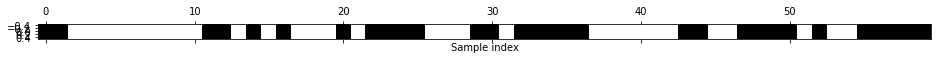

In [ ]:
mask_p2 = select_p2.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask_p2.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

In [ ]:
x_merge_pivot_2020.head(1)

,CustomerId,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,Card_trans_amount,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Transfer_Amount,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,Bills_Amount,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
2,00052326-ae77-43c1-9995-bb21d721b912,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.181818,11.0,490.0,2.0,6.0,2.0,0.0,0.0,6.0,3.0,4.0,1.0


In [ ]:
#test

In [ ]:
#Churn apr 2020 - min oct-dec

In [ ]:
x_merge_pivot_apr20_octdec19 = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2019-10','2019-11','2019-12']))&(xy_merge_pivot_apr20['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_apr20_octdec19 = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2019-10','2019-11','2019-12']))&(xy_merge_pivot_apr20['Churn_Before']==0)]['Churn']

In [ ]:
X_array_apr20_octdec19 = x_merge_pivot_apr20_octdec19.iloc[:,1:].to_numpy()
y_array_apr20_octdec19 = y_merge_pivot_apr20_octdec19.to_numpy()

In [ ]:
X_array_apr20_octdec19_scaled = minmax.transform(X_array_apr20_octdec19)

In [ ]:
#predict

In [ ]:
x_merge_pivot_sample2_pred = xy_merge_pivot_pred[(xy_merge_pivot_pred['MinMonth'].isin(['2020-04','2020-05','2020-06']))&(xy_merge_pivot_pred['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)

In [ ]:
X_array_sample2_pred = x_merge_pivot_sample2_pred.iloc[:,1:].to_numpy()

In [ ]:
X_array_sample2_scaled_pred = minmax.transform(X_array_sample2_pred)

#sample0


In [ ]:
#train

In [ ]:
x_merge_pivot_0sample = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2020-05'])) & (xy_merge_pivot['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_0sample = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2020-05'])) & (xy_merge_pivot['Churn_Before']==0)]['Churn']


In [ ]:
X_array_sample0 = x_merge_pivot_0sample.iloc[:,1:].to_numpy()
y_array_sample0 = y_merge_pivot_0sample.to_numpy()

In [ ]:
#X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_array_p, y_array_p, test_size=0.30, random_state=42)

In [ ]:
X_scaled_sample0 = minmax.fit_transform(X_array_sample0)
#X_test_scaled_p = minmax.transform(X_test_p)

In [ ]:
#test

In [ ]:
x_merge_pivot_sample0_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2020-02']))&(xy_merge_pivot_apr20['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample0_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2020-02']))&(xy_merge_pivot_apr20['Churn_Before']==0)]['Churn']

In [ ]:
X_array_sample0_test = x_merge_pivot_sample0_test.iloc[:,1:].to_numpy()
y_array_sample0_test = y_merge_pivot_sample0_test.to_numpy()

In [ ]:
X_array_sample0_test_scaled = minmax.transform(X_array_sample0_test)

In [ ]:
#predict

In [ ]:
xy_merge_pivot_pred.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,Card_trans_amount,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Transfer_Amount,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,Bills_Amount,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1,0,53,124,40,0,0,0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.172414,0.043103,0.551724,0.0,0.008621,0.034483,0.060345,0.0,0.086207,0.043103,116.0,2652.23,0.781609,0.206897,0.011494,0.045977,0.448276,0.505747,0.137931,0.528736,0.333333,87.0,5362.0,0.6,0.066667,0.333333,0.0,0.933333,0.066667,15.0,349.86,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,0.0,1.0,5.0,1.0,2.0,1.0


In [ ]:
x_merge_pivot_sample0_pred = xy_merge_pivot_pred[(xy_merge_pivot_pred['MinMonth'].isin(['2020-08']))&(xy_merge_pivot_pred['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)

In [ ]:
X_array_sample0_pred = x_merge_pivot_sample0_pred.iloc[:,1:].to_numpy()

In [ ]:
X_array_sample0_pred

array([[12.,  0.,  0., ...,  6.,  4.,  1.],
       [41.,  0.,  0., ...,  2.,  4.,  1.],
       [12.,  0.,  0., ...,  4.,  4.,  1.],
       ...,
       [ 4.,  0.,  0., ...,  5.,  2.,  1.],
       [ 1.,  0.,  0., ...,  3.,  4.,  1.],
       [ 2.,  0.,  0., ...,  4.,  4.,  1.]])

In [ ]:
X_array_sample0_scaled_pred = minmax.transform(X_array_sample0_pred)

#sample1

In [ ]:
#train

In [ ]:
x_merge_pivot_1sample = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2020-04'])) & (xy_merge_pivot['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_1sample = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2020-04'])) & (xy_merge_pivot['Churn_Before']==0)]['Churn']


In [ ]:
X_array_sample1 = x_merge_pivot_1sample.iloc[:,1:].to_numpy()
y_array_sample1 = y_merge_pivot_1sample.to_numpy()

In [ ]:
#X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_array_p, y_array_p, test_size=0.30, random_state=42)

In [ ]:
X_scaled_sample1 = minmax.fit_transform(X_array_sample1)
#X_test_scaled_p = minmax.transform(X_test_p)

In [ ]:
#test

In [ ]:
x_merge_pivot_sample1_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2020-01']))&(xy_merge_pivot_apr20['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample1_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2020-01']))&(xy_merge_pivot_apr20['Churn_Before']==0)]['Churn']

In [ ]:
X_array_sample1_test = x_merge_pivot_sample1_test.iloc[:,1:].to_numpy()
y_array_sample1_test = y_merge_pivot_sample1_test.to_numpy()

In [ ]:
X_array_sample1_test_scaled = minmax.transform(X_array_sample1_test)

In [ ]:
#predict

In [ ]:
xy_merge_pivot_pred.head(1)

,CustomerId,MinMonth,Churn,Churn_Before,1stQ,2ndQ,3rdQ,4thQ,2ndY1stQ,2ndY2ndQ,2ndY3rdQ,2ndY4thQ,Template_Mobile,Template_Service,Template_Utility,Templates_All,Age,Gender_labels,ATM,გართობა,კვება,კომუნალური,"მოგზაურობა, დასვენება",სხვადასხვა,სხვადასხვა ხარჯი,ტრანსპორტი,შოპინგი,ჯანმრთელობა,Card_trans_total,Card_trans_amount,Type_C2C,Type_IBAN,Type_P2P,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_Others,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Transfer_Amount,Category_Mobile,Category_Service,Category_Utility,BID_Grouped_Others,BID_Grouped_SP,BID_Grouped_TB,Bills_Count,Bills_Amount,Has_Installment,Has_Loan,Offered,Disbursed,Request,SalaryCalculated,Payroll,creditrating_labels,platform_labels,Has_Saving,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label
0,000326ee-435b-4f45-8590-71684c39f4e0,2019-08,0,0,1,0,53,124,40,0,0,0,0.666667,0.0,0.333333,3.0,25.0,2.0,0.172414,0.043103,0.551724,0.0,0.008621,0.034483,0.060345,0.0,0.086207,0.043103,116.0,2652.23,0.781609,0.206897,0.011494,0.045977,0.448276,0.505747,0.137931,0.528736,0.333333,87.0,5362.0,0.6,0.066667,0.333333,0.0,0.933333,0.066667,15.0,349.86,0.0,0.0,0.756757,0.135135,37.0,392.0,1.0,8.0,2.0,0.0,1.0,5.0,1.0,2.0,1.0


In [ ]:
x_merge_pivot_sample1_pred = xy_merge_pivot_pred[(xy_merge_pivot_pred['MinMonth'].isin(['2020-07']))&(xy_merge_pivot_pred['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)

In [ ]:
X_array_sample1_pred = x_merge_pivot_sample1_pred.iloc[:,1:].to_numpy()

In [ ]:
X_array_sample1_pred

array([[79.,  0.,  0., ...,  6.,  1.,  1.],
       [ 7.,  0.,  0., ...,  3.,  4.,  1.],
       [18.,  0.,  0., ...,  4.,  4.,  1.],
       ...,
       [67.,  0.,  0., ...,  1.,  2.,  2.],
       [ 4.,  0.,  0., ...,  2.,  3.,  1.],
       [ 3.,  0.,  0., ...,  4.,  4.,  0.]])

In [ ]:
X_array_sample1_scaled_pred = minmax.transform(X_array_sample1_pred)

#sample4

In [ ]:
#train

In [ ]:
x_merge_pivot_sample4 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2019-07','2019-08','2019-09'])) & (xy_merge_pivot['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample4 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2019-07','2019-08','2019-09'])) & (xy_merge_pivot['Churn_Before']==0)]['Churn']


In [ ]:
X_array_sample4 = x_merge_pivot_sample4.iloc[:,1:].to_numpy()
y_array_sample4 = y_merge_pivot_sample4.to_numpy()

In [ ]:
#X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_array_p, y_array_p, test_size=0.30, random_state=42)

In [ ]:
X_scaled_sample4 = minmax.fit_transform(X_array_sample4)
#X_test_scaled_p = minmax.transform(X_test_p)

In [ ]:
#test

In [ ]:
x_merge_pivot_sample4_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2019-04','2019-05','2019-06']))&(xy_merge_pivot_apr20['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample4_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2019-04','2019-05','2019-06']))&(xy_merge_pivot_apr20['Churn_Before']==0)]['Churn']

In [ ]:
X_array_sample4_test = x_merge_pivot_sample4_test.iloc[:,1:].to_numpy()
y_array_sample4_test = y_merge_pivot_sample4_test.to_numpy()

In [ ]:
X_array_sample4_test_scaled = minmax.transform(X_array_sample4_test)

In [ ]:
#predict

In [ ]:
x_merge_pivot_sample4_pred = xy_merge_pivot_pred[(xy_merge_pivot_pred['MinMonth'].isin(['2019-10','2019-11','2019-12']))&(xy_merge_pivot_pred['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)

In [ ]:
X_array_sample4_pred = x_merge_pivot_sample4_pred.iloc[:,1:].to_numpy()

In [ ]:
X_array_sample4_scaled_pred = minmax.transform(X_array_sample4_pred)

#sample5

In [ ]:
#train

In [ ]:
x_merge_pivot_sample5 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2019-02','2019-03','2019-04','2019-05','2019-06'])) & (xy_merge_pivot['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample5 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2019-02','2019-03','2019-04','2019-05','2019-06'])) & (xy_merge_pivot['Churn_Before']==0)]['Churn']


In [ ]:
X_array_sample5 = x_merge_pivot_sample5.iloc[:,1:].to_numpy()
y_array_sample5 = y_merge_pivot_sample5.to_numpy()

In [ ]:
#X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_array_p, y_array_p, test_size=0.30, random_state=42)

In [ ]:
X_scaled_sample5 = minmax.fit_transform(X_array_sample5)
#X_test_scaled_p = minmax.transform(X_test_p)

In [ ]:
#test

In [ ]:
x_merge_pivot_sample5_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2018-11','2018-12','2019-01','2019-02','2019-03']))&(xy_merge_pivot_apr20['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample5_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2018-11','2018-12','2019-01','2019-02','2019-03']))&(xy_merge_pivot_apr20['Churn_Before']==0)]['Churn']

In [ ]:
X_array_sample5_test = x_merge_pivot_sample5_test.iloc[:,1:].to_numpy()
y_array_sample5_test = y_merge_pivot_sample5_test.to_numpy()

In [ ]:
X_array_sample5_test_scaled = minmax.transform(X_array_sample5_test)

In [ ]:
#predict

In [ ]:
x_merge_pivot_sample5_pred = xy_merge_pivot_pred[(xy_merge_pivot_pred['MinMonth'].isin(['2019-05','2019-06','2019-07','2019-08','2019-09']))&(xy_merge_pivot_pred['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)

In [ ]:
X_array_sample5_pred = x_merge_pivot_sample5_pred.iloc[:,1:].to_numpy()

In [ ]:
X_array_sample5_scaled_pred = minmax.transform(X_array_sample5_pred)

#sample6

In [ ]:
#train

In [ ]:
x_merge_pivot_sample6 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2018-09','2018-10','2018-11','2018-12','2019-01'])) & (xy_merge_pivot['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample6 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2018-09','2018-10','2018-11','2018-12','2019-01'])) & (xy_merge_pivot['Churn_Before']==0)]['Churn']


In [ ]:
X_array_sample6 = x_merge_pivot_sample6.iloc[:,1:].to_numpy()
y_array_sample6 = y_merge_pivot_sample6.to_numpy()

In [ ]:
#X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_array_p, y_array_p, test_size=0.30, random_state=42)

In [ ]:
X_scaled_sample6 = minmax.fit_transform(X_array_sample6)
#X_test_scaled_p = minmax.transform(X_test_p)

In [ ]:
#test

In [ ]:
x_merge_pivot_sample6_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2018-06','2018-07','2019-08','2019-09','2019-10']))&(xy_merge_pivot_apr20['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample6_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2018-06','2018-07','2019-08','2019-09','2019-10']))&(xy_merge_pivot_apr20['Churn_Before']==0)]['Churn']

In [ ]:
X_array_sample6_test = x_merge_pivot_sample6_test.iloc[:,1:].to_numpy()
y_array_sample6_test = y_merge_pivot_sample6_test.to_numpy()

In [ ]:
X_array_sample6_test_scaled = minmax.transform(X_array_sample6_test)

In [ ]:
#predict

In [ ]:
x_merge_pivot_sample6_pred = xy_merge_pivot_pred[(xy_merge_pivot_pred['MinMonth'].isin(['2018-12','2019-01','2019-02','2019-03','2019-04']))&(xy_merge_pivot_pred['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)

In [ ]:
X_array_sample6_pred = x_merge_pivot_sample6_pred.iloc[:,1:].to_numpy()

In [ ]:
X_array_sample6_scaled_pred = minmax.transform(X_array_sample6_pred)

#sample7

In [ ]:
x_merge_pivot_sample7 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2018-03','2018-04','2018-05','2018-06','2018-07','2018-08'])) & (xy_merge_pivot['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample7 = xy_merge_pivot[(xy_merge_pivot['MinMonth'].isin(['2018-03','2018-04','2018-05','2018-06','2018-07','2018-08'])) & (xy_merge_pivot['Churn_Before']==0)]['Churn']


In [ ]:
X_array_sample7 = x_merge_pivot_sample7.iloc[:,1:].to_numpy()
y_array_sample7 = y_merge_pivot_sample7.to_numpy()

In [ ]:
#X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_array_p, y_array_p, test_size=0.30, random_state=42)

In [ ]:
X_scaled_sample7 = minmax.fit_transform(X_array_sample7)
#X_test_scaled_p = minmax.transform(X_test_p)

In [ ]:
#test

In [ ]:
x_merge_pivot_sample7_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2018-03','2018-04','2019-05']))&(xy_merge_pivot_apr20['Churn_Before']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)
y_merge_pivot_sample7_test = xy_merge_pivot_apr20[(xy_merge_pivot_apr20['MinMonth'].isin(['2018-03','2018-04','2019-05']))&(xy_merge_pivot_apr20['Churn_Before']==0)]['Churn']

In [ ]:
X_array_sample7_test = x_merge_pivot_sample7_test.iloc[:,1:].to_numpy()
y_array_sample7_test = y_merge_pivot_sample7_test.to_numpy()

In [ ]:
X_array_sample7_test_scaled = minmax.transform(X_array_sample7_test)

In [ ]:
#predict

In [ ]:
x_merge_pivot_sample7_pred = xy_merge_pivot_pred[(xy_merge_pivot_pred['MinMonth'].isin(['2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11']))&(xy_merge_pivot_pred['Churn']==0)].drop(columns=['Churn','MinMonth','Churn_Before'],axis=1)

In [ ]:
X_array_sample7_pred = x_merge_pivot_sample7_pred.iloc[:,1:].to_numpy()

In [ ]:
X_array_sample7_scaled_pred = minmax.transform(X_array_sample7_pred)

# Models

#KNN

In [ ]:
#churn_pivot 2019

neigh_p = KNeighborsClassifier(n_neighbors=3)
 
neigh_p.fit(X_train_scaled_p,y_train_p)

print('KNN train accuracy: {:.2f}'.format(neigh_p.score(X_train_scaled_p,y_train_p)))
print('KNN test accuracy: {:.2f}'.format(neigh_p.score(X_test_scaled_p,y_test_p)))

#neigh.fit(X_train_l1,y_train)
#
#print('KNN train accuracy: {:.2f}'.format(neigh.score(X_train_l1,y_train)))
#print('KNN test accuracy: {:.2f}'.format(neigh.score(X_test_l1,y_test)))

KNN train accuracy: 0.89
KNN test accuracy: 0.81


#Random Forest

Churn_2019 - sample 3

In [ ]:
#Churn_2019 - sample 3

clf_p = RandomForestClassifier(max_depth=10,n_estimators=250, random_state=0)

clf_p.fit(X_train_scaled_p,y_train_p)
print('RandomForest Score: {:.3f}'.format(clf_p.score(X_test_scaled_p,y_test_p)))

rf_prediction_p = clf_p.predict(X_test_scaled_p)
print(classification_report(y_test_p,rf_prediction_p))


clf_l1_p = RandomForestClassifier(max_depth=10,n_estimators=250, random_state=0)

clf_l1_p.fit(X_train_l1_p,y_train_p)
print('RandomForest Score: {:.3f}'.format(clf_l1_p.score(X_test_l1_p,y_test_p)))

rf_prediction_l1_p = clf_l1_p.predict(X_test_l1_p)
print(classification_report(y_test_p,rf_prediction_l1_p))

RandomForest Score: 0.858
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1168
           1       0.65      0.19      0.29       215

    accuracy                           0.86      1383
   macro avg       0.76      0.58      0.60      1383
weighted avg       0.83      0.86      0.82      1383

RandomForest Score: 0.859
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1168
           1       0.65      0.20      0.31       215

    accuracy                           0.86      1383
   macro avg       0.76      0.59      0.62      1383
weighted avg       0.84      0.86      0.83      1383



In [ ]:
#Churn_apr20 jul19-sep19

clf_apr20_julsep19 = RandomForestClassifier(max_depth=12,n_estimators=500, random_state=0)

clf_apr20_julsep19.fit(X_train_scaled_p,y_train_p)
print('RandomForest Score: {:.3f}'.format(clf_apr20_julsep19.score(X_array_apr20_julsep19_scaled,y_array_apr20_julsep19)))


rf_prediction_apr20_julsep19 = clf_apr20_julsep19.predict(X_array_apr20_julsep19_scaled)
print(classification_report(y_array_apr20_julsep19,rf_prediction_apr20_julsep19))


rf_prediction_sample3_pred = clf_apr20_julsep19.predict(X_array_sample3_scaled_pred)
print('y classes:',clf_apr20_julsep19.classes_)
print(clf_apr20_julsep19.predict_proba(X_array_sample3_scaled_pred))

sample3_predict_proba = clf_apr20_julsep19.predict_proba(X_array_sample3_scaled_pred)


#clf_p2.fit(X_train_l1_p2,y_train_p2)
#print('RandomForest Score: {:.3f}'.format(clf_p2.score(X_test_l1_p2,y_test_p2)))
#
#rf_prediction_p2 = clf_p2.predict(X_test_l1_p2)
#print(classification_report(y_test_p2,rf_prediction_p2))
#
#print(clf_p2.predict_proba(X_test_l1_p2))

RandomForest Score: 0.818
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      3738
           1       0.73      0.20      0.31       978

    accuracy                           0.82      4716
   macro avg       0.78      0.59      0.60      4716
weighted avg       0.80      0.82      0.77      4716

y classes: [0 1]
[[0.34349273 0.65650727]
 [0.41503619 0.58496381]
 [0.92024727 0.07975273]
 ...
 [0.97083888 0.02916112]
 [0.97640825 0.02359175]
 [0.95883697 0.04116303]]


In [ ]:
sample3_predict_proba_df = pd.DataFrame({'CustomerId':x_merge_pivot_sample3_pred['CustomerId'],clf_apr20_julsep19.classes_[0]:sample3_predict_proba[:,0],clf_apr20_julsep19.classes_[1]:sample3_predict_proba[:,1]})

In [ ]:
sample3_predict_proba_df[sample3_predict_proba_df[1]>0.8]

,CustomerId,0,1
2650,0a2f2134-1163-42d8-9233-3056d2060ef0,0.138959,0.861041
6548,195c1a45-ea53-4703-8e9d-33ae199f6f95,0.170148,0.829852
9934,26292c1c-32a7-4d85-b54f-b4125e1601bc,0.170154,0.829846
19090,49c58a2c-4824-4c9f-830a-3ce18a72491b,0.184560,0.815440
33866,83a09f5e-47f2-4fe9-a621-280203e0d037,0.173112,0.826888
46781,b6010a61-74de-4c74-bb4a-31ae4a9d5ef0,0.195408,0.804592
48687,bdd9eb73-4138-43b4-b870-6a52a6d32b2d,0.165082,0.834918
50551,c54ed29e-ee58-40f3-96fe-b8b7299c8cdd,0.120629,0.879371
55177,d76e272a-e833-4e7c-88ca-6760c16f3278,0.095859,0.904141
61857,f1ee3985-7d00-4a5a-86cf-bcf2a7c4d54a,0.138629,0.861371


In [ ]:
feature_importances_apr20_julsep19 = clf_apr20_julsep19.feature_importances_
feature_columns_apr20_julsep19 = x_merge_pivot_apr20_julsep19.iloc[:,1:].columns.to_list()
feature_df_apr20_julsep19 = pd.DataFrame({'Feature':feature_columns_apr20_julsep19,'Feature_weight':feature_importances_apr20_julsep19})

In [ ]:
#feature_df_apr20_julsep19[~feature_df_apr20_julsep19['Feature'].isin(['2ndQ','1stQ','3rdQ'])]

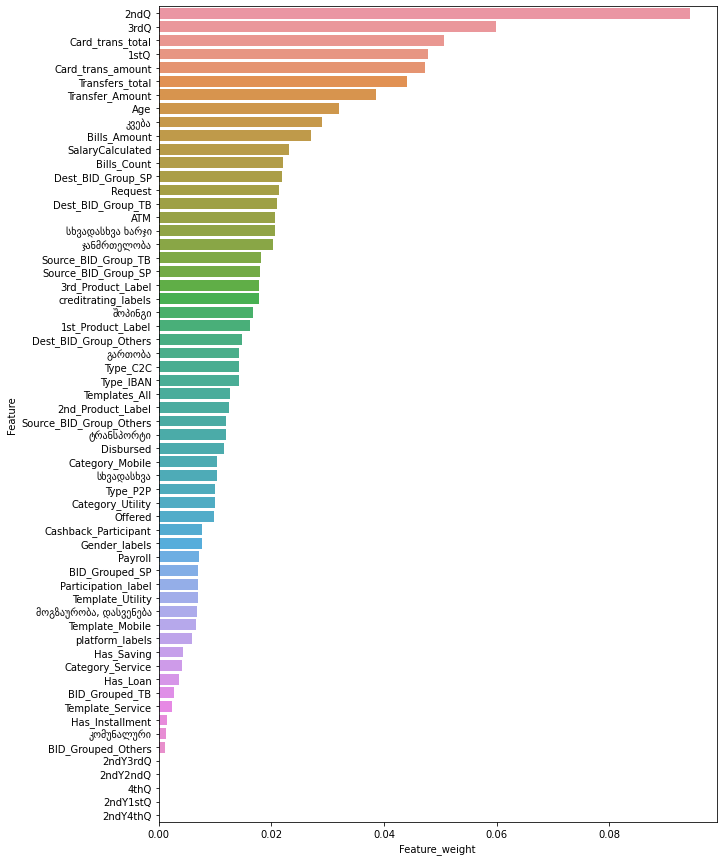

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_df_apr20_julsep19,order=feature_df_apr20_julsep19.sort_values('Feature_weight',ascending=False).Feature)

Churn_2020 - sample 2

In [ ]:
#Churn_2020 - sample 2

clf_p2 = RandomForestClassifier(max_depth=10,n_estimators=500, random_state=0)

clf_p2.fit(X_train_scaled_p2,y_train_p2)
print('RandomForest Score: {:.3f}'.format(clf_p2.score(X_test_scaled_p2,y_test_p2)))

rf_prediction_p2 = clf_p2.predict(X_test_scaled_p2)
print(classification_report(y_test_p2,rf_prediction_p2))


clf_l1_p2 = RandomForestClassifier(max_depth=10,n_estimators=500, random_state=0)

clf_l1_p2.fit(X_train_l1_p2,y_train_p2)
print('RandomForest Score: {:.3f}'.format(clf_l1_p2.score(X_test_l1_p2,y_test_p2)))

rf_prediction_l1_p2 = clf_l1_p2.predict(X_test_l1_p2)
print(classification_report(y_test_p2,rf_prediction_l1_p2))

print(clf_l1_p2.predict_proba(X_test_l1_p2))

RandomForest Score: 0.840
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       741
           1       0.77      0.58      0.66       271

    accuracy                           0.84      1012
   macro avg       0.81      0.76      0.78      1012
weighted avg       0.83      0.84      0.83      1012

RandomForest Score: 0.841
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       741
           1       0.77      0.58      0.66       271

    accuracy                           0.84      1012
   macro avg       0.81      0.76      0.78      1012
weighted avg       0.83      0.84      0.83      1012

[[0.9406781  0.0593219 ]
 [0.21887671 0.78112329]
 [0.98084033 0.01915967]
 ...
 [0.92736782 0.07263218]
 [0.93580375 0.06419625]
 [0.88735001 0.11264999]]


In [ ]:
feature_importances_jul20_janmar20 = clf_p2.feature_importances_
feature_columns_jul20_janmar20  = x_merge_pivot_2020.iloc[:,1:].columns.to_list()
feature_df_jul20_janmar20 = pd.DataFrame({'Feature':feature_columns_jul20_janmar20,'Feature_weight':feature_importances_jul20_janmar20})

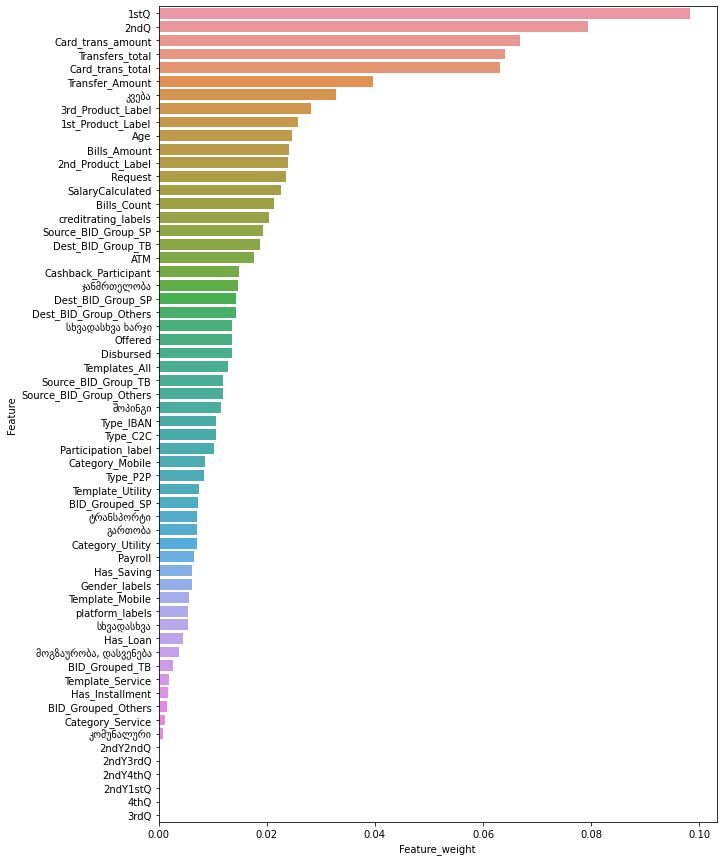

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_df_jul20_janmar20,order=feature_df_jul20_janmar20.sort_values('Feature_weight',ascending=False).Feature)

In [ ]:
#Churn_apr20 oct19-dec19

clf_apr20_octdec19 = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

clf_apr20_octdec19.fit(X_train_scaled_p2,y_train_p2)
print('RandomForest Score: {:.3f}'.format(clf_apr20_octdec19.score(X_array_apr20_octdec19_scaled,y_array_apr20_octdec19)))


rf_prediction_apr20_octdec19 = clf_apr20_octdec19.predict(X_array_apr20_octdec19_scaled)
print(classification_report(y_array_apr20_octdec19,rf_prediction_apr20_octdec19))


rf_prediction_sample2_pred = clf_apr20_octdec19.predict(X_array_sample2_scaled_pred)
print('y classes:',clf_apr20_octdec19.classes_)
print(clf_apr20_octdec19.predict_proba(X_array_sample2_scaled_pred))


sample2_predict_proba = clf_apr20_octdec19.predict_proba(X_array_sample2_scaled_pred)

#clf_p2.fit(X_train_l1_p2,y_train_p2)
#print('RandomForest Score: {:.3f}'.format(clf_p2.score(X_test_l1_p2,y_test_p2)))
#
#rf_prediction_p2 = clf_p2.predict(X_test_l1_p2)
#print(classification_report(y_test_p2,rf_prediction_p2))
#
#print(clf_p2.predict_proba(X_test_l1_p2))

RandomForest Score: 0.756
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      4376
           1       0.84      0.34      0.48      2222

    accuracy                           0.76      6598
   macro avg       0.79      0.65      0.66      6598
weighted avg       0.78      0.76      0.72      6598

y classes: [0 1]
[[0.19577703 0.80422297]
 [0.1098392  0.8901608 ]
 [0.2283703  0.7716297 ]
 ...
 [0.35226613 0.64773387]
 [0.98090731 0.01909269]
 [0.9300939  0.0699061 ]]


In [ ]:
sample2_predict_proba_df = pd.DataFrame({'CustomerId':x_merge_pivot_sample2_pred['CustomerId'],clf_apr20_octdec19.classes_[0]:sample2_predict_proba[:,0],clf_apr20_octdec19.classes_[1]:sample2_predict_proba[:,1]})

In [ ]:
sample2_predict_proba_df[sample2_predict_proba_df[1]>0.8]

,CustomerId,0,1
3,000592a0-016f-480f-ba88-7fbba68ac0ee,0.195777,0.804223
6,00092423-28c9-4d23-8852-ee1c1e1eb263,0.109839,0.890161
486,01d128ce-9102-4ec0-8935-10ad86e25e05,0.039876,0.960124
957,03b58390-4915-4ea9-aa7e-ac5dea40d2fb,0.159440,0.840560
1018,03ebded2-e609-4497-8885-44364315cc10,0.120245,0.879755
...,...,...,...
63980,fa5336f6-1b29-4c01-9045-28a05dd86cbb,0.137317,0.862683
64071,faa31739-e03b-45ab-a590-4c8a712f222a,0.075560,0.924440
64184,fb17facb-2f4e-487e-a1c5-56f5fee3513b,0.104044,0.895956
64234,fb484ae4-3c96-48e8-bf07-f322b193c3b2,0.141278,0.858722


In [ ]:
feature_importances_apr20_octdec19 = clf_apr20_octdec19.feature_importances_
feature_columns = x_merge_pivot_apr20_octdec19.iloc[:,1:].columns.to_list()
feature_df_apr20_octdec19 = pd.DataFrame({'Feature':feature_columns,'Feature_weight':feature_importances_apr20_octdec19})

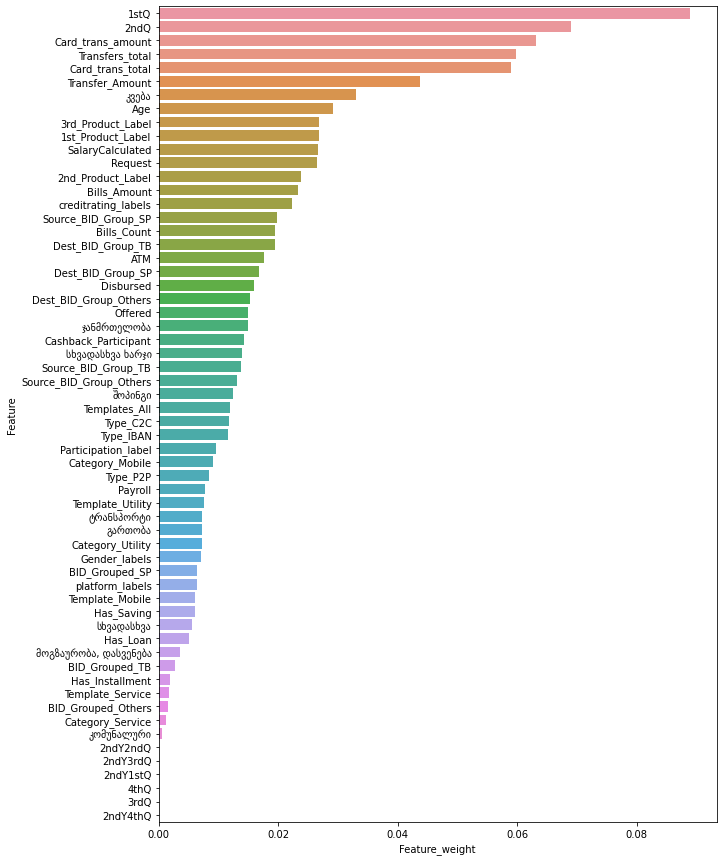

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_df_apr20_octdec19,order=feature_df_apr20_octdec19.sort_values('Feature_weight',ascending=False).Feature)

Sample0


In [ ]:
clf_sample0 = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

clf_sample0.fit(X_scaled_sample0,y_array_sample0)
print('RandomForest train Score: {:.3f}'.format(clf_sample0.score(X_scaled_sample0,y_array_sample0)))
print('RandomForest test Score: {:.3f}'.format(clf_sample0.score(X_array_sample0_test_scaled,y_array_sample0_test)))

rf_prediction_sample0 = clf_sample0.predict(X_array_sample0_test_scaled)
print(classification_report(y_array_sample0_test,rf_prediction_sample0))

rf_prediction_sample0_pred = clf_sample0.predict(X_array_sample0_scaled_pred)
print('y classes:',clf_sample0.classes_)
print(clf_sample0.predict_proba(X_array_sample0_scaled_pred))

sample0_predict_proba = clf_sample0.predict_proba(X_array_sample0_scaled_pred)

RandomForest train Score: 0.981
RandomForest test Score: 0.814
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       975
           1       0.77      0.58      0.67       453

    accuracy                           0.81      1428
   macro avg       0.80      0.75      0.77      1428
weighted avg       0.81      0.81      0.81      1428

y classes: [0 1]
[[0.96841002 0.03158998]
 [0.87079812 0.12920188]
 [0.90854007 0.09145993]
 ...
 [0.88636419 0.11363581]
 [0.48973882 0.51026118]
 [0.33969986 0.66030014]]


In [ ]:
sample0_predict_proba_df = pd.DataFrame({'CustomerId':x_merge_pivot_sample0_pred['CustomerId'],clf_sample0.classes_[0]:sample0_predict_proba[:,0],clf_sample0.classes_[1]:sample0_predict_proba[:,1]})

In [ ]:
sample0_predict_proba_df[sample0_predict_proba_df[1]>0.8]

,CustomerId,0,1
733,02e596a3-13d7-48a0-bc8c-be68c8c24f46,0.138697,0.861303
1041,0405aa0d-286b-4aee-a472-eea4680c4f33,0.097396,0.902604
1284,04ea9c02-c5ca-41c0-a8bf-41febd4d454b,0.116171,0.883829
1794,06e4524a-2a17-4b4a-a8bc-91ebe55192b0,0.079874,0.920126
3410,0d624c72-60d4-4e99-9a98-0ab605e877e2,0.126132,0.873868
...,...,...,...
63300,f7b6a424-de68-4445-ad57-6fc7c823ee39,0.160676,0.839324
63739,f96bc9dd-214d-4634-b660-cd8d9bb43e23,0.057467,0.942533
63764,f98520c4-3faf-42ac-a7aa-37565eb7b1e6,0.051953,0.948047
64637,fce6c992-3f08-43a4-a4f4-4f11fa571ca5,0.165456,0.834544


In [ ]:
feature_importances_sample0 = clf_sample0.feature_importances_
feature_columns_sample0 = x_merge_pivot_sample0_test.iloc[:,1:].columns.to_list()
feature_df_sample0 = pd.DataFrame({'Feature':feature_columns_sample0,'Feature_weight':feature_importances_sample0})

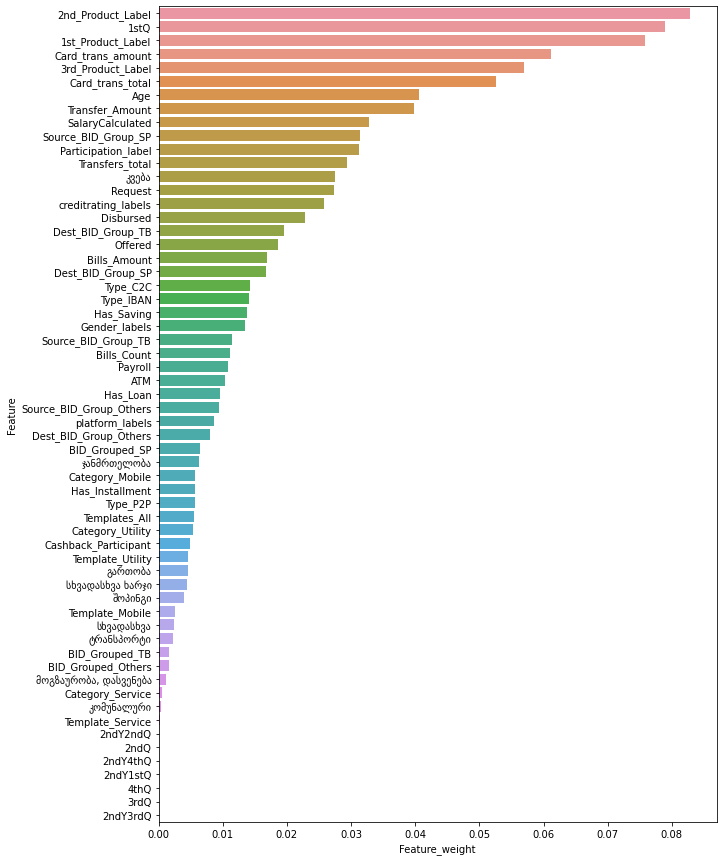

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_df_sample0,order=feature_df_sample0.sort_values('Feature_weight',ascending=False).Feature)

Sample1

In [ ]:
clf_sample1 = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

clf_sample1.fit(X_scaled_sample1,y_array_sample1)
print('RandomForest train Score: {:.3f}'.format(clf_sample1.score(X_scaled_sample1,y_array_sample1)))
print('RandomForest test Score: {:.3f}'.format(clf_sample1.score(X_array_sample1_test_scaled,y_array_sample1_test)))

rf_prediction_sample1 = clf_sample1.predict(X_array_sample1_test_scaled)
print(classification_report(y_array_sample1_test,rf_prediction_sample1))

rf_prediction_sample1_pred = clf_sample1.predict(X_array_sample1_scaled_pred)
print('y classes:',clf_sample1.classes_)
print(clf_sample1.predict_proba(X_array_sample1_scaled_pred))

sample1_predict_proba = clf_sample1.predict_proba(X_array_sample1_scaled_pred)

RandomForest train Score: 0.989
RandomForest test Score: 0.815
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       832
           1       0.84      0.68      0.75       590

    accuracy                           0.82      1422
   macro avg       0.82      0.80      0.80      1422
weighted avg       0.82      0.82      0.81      1422

y classes: [0 1]
[[0.96029152 0.03970848]
 [0.51262711 0.48737289]
 [0.90438686 0.09561314]
 ...
 [0.93816506 0.06183494]
 [0.62493256 0.37506744]
 [0.40395281 0.59604719]]


In [ ]:
sample1_predict_proba_df = pd.DataFrame({'CustomerId':x_merge_pivot_sample1_pred['CustomerId'],clf_sample1.classes_[0]:sample1_predict_proba[:,0],clf_sample1.classes_[1]:sample1_predict_proba[:,1]})

In [ ]:
sample1_predict_proba_df[sample1_predict_proba_df[1]>0.8]

,CustomerId,0,1
167,0092961d-a36a-4048-9599-c8f73a5dc511,0.071484,0.928516
1078,042b0019-7ed0-4ed7-abd4-1bf886ab93b8,0.167901,0.832099
1107,0444651d-149e-442f-8d07-de44f0368dc1,0.082182,0.917818
1358,053964c8-4009-4e90-befa-0a53dff81607,0.076157,0.923843
1816,06f829b7-0d59-4208-9a88-d7568e402ac8,0.102403,0.897597
...,...,...,...
64236,fb4a2063-bf00-4a1a-96eb-d88db2f539bc,0.148609,0.851391
64317,fb9e3e67-0bba-42dd-b847-db97abe69f48,0.066988,0.933012
64403,fbfb7bf1-ac1a-4389-8996-685e13c9f7f9,0.173320,0.826680
64612,fccf097d-b615-44d6-9ffb-2dedd30b07d4,0.148298,0.851702


In [ ]:
feature_importances_sample1 = clf_sample1.feature_importances_
feature_columns_sample1 = x_merge_pivot_sample1_test.iloc[:,1:].columns.to_list()
feature_df_sample1 = pd.DataFrame({'Feature':feature_columns_sample1,'Feature_weight':feature_importances_sample1})

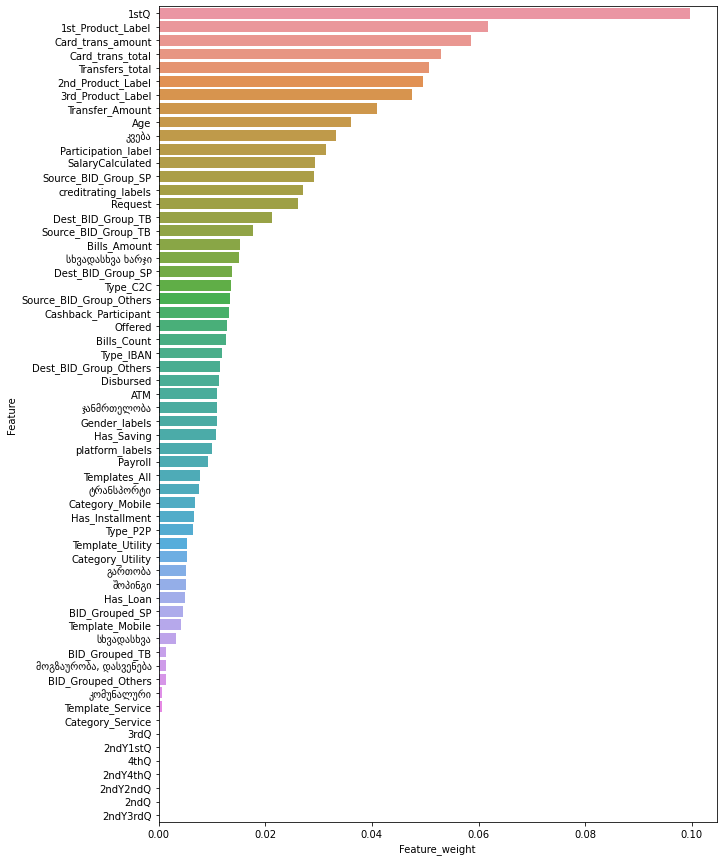

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_df_sample1,order=feature_df_sample1.sort_values('Feature_weight',ascending=False).Feature)

Sample4

In [ ]:
clf_sample4 = RandomForestClassifier(max_depth=10,n_estimators=250, random_state=0)

clf_sample4.fit(X_scaled_sample4,y_array_sample4)
print('RandomForest train Score: {:.3f}'.format(clf_sample4.score(X_scaled_sample4,y_array_sample4)))
print('RandomForest test Score: {:.3f}'.format(clf_sample4.score(X_array_sample4_test_scaled,y_array_sample4_test)))

rf_prediction_sample4 = clf_sample4.predict(X_array_sample4_test_scaled)
print(classification_report(y_array_sample4_test,rf_prediction_sample4))

rf_prediction_sample4_pred = clf_sample4.predict(X_array_sample4_scaled_pred)
print('y classes:',clf_sample4.classes_)
print(clf_sample4.predict_proba(X_array_sample4_scaled_pred))

sample4_predict_proba = clf_sample4.predict_proba(X_array_sample4_scaled_pred)

RandomForest train Score: 0.966
RandomForest test Score: 0.822
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1366
           1       0.76      0.23      0.35       366

    accuracy                           0.82      1732
   macro avg       0.79      0.60      0.62      1732
weighted avg       0.81      0.82      0.78      1732

y classes: [0 1]
[[0.92861822 0.07138178]
 [0.88734074 0.11265926]
 [0.98289947 0.01710053]
 ...
 [0.83015917 0.16984083]
 [0.87962384 0.12037616]
 [0.77524543 0.22475457]]


In [ ]:
sample4_predict_proba_df = pd.DataFrame({'CustomerId':x_merge_pivot_sample4_pred['CustomerId'],clf_sample4.classes_[0]:sample4_predict_proba[:,0],clf_sample4.classes_[1]:sample4_predict_proba[:,1]})

In [ ]:
sample4_predict_proba_df[sample4_predict_proba_df[1]>0.8]

,CustomerId,0,1
31813,7b9bedef-f089-4be9-b79c-4c62438b6588,0.171808,0.828192
48675,bdcff168-84bf-40e9-a7c8-655eb8d974db,0.157738,0.842262


In [ ]:
feature_importances_sample4 = clf_sample4.feature_importances_
feature_columns_sample4 = x_merge_pivot_sample4_test.iloc[:,1:].columns.to_list()
feature_df_sample4 = pd.DataFrame({'Feature':feature_columns_sample4,'Feature_weight':feature_importances_sample4})

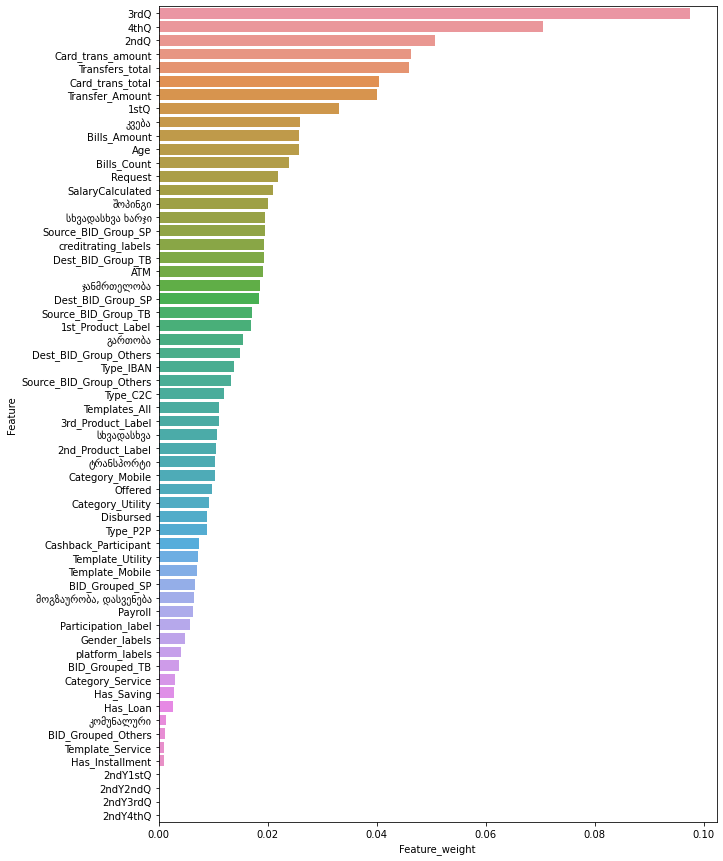

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_df_sample4,order=feature_df_sample4.sort_values('Feature_weight',ascending=False).Feature)

Sample5

In [ ]:
clf_sample5 = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

clf_sample5.fit(X_scaled_sample5,y_array_sample5)
print('RandomForest train Score: {:.3f}'.format(clf_sample5.score(X_scaled_sample5,y_array_sample5)))
print('RandomForest test Score: {:.3f}'.format(clf_sample5.score(X_array_sample5_test_scaled,y_array_sample5_test)))

rf_prediction_sample5 = clf_sample5.predict(X_array_sample5_test_scaled)
print(classification_report(y_array_sample5_test,rf_prediction_sample5))

rf_prediction_sample5_pred = clf_sample5.predict(X_array_sample5_scaled_pred)
print('y classes:',clf_sample5.classes_)
print(clf_sample5.predict_proba(X_array_sample5_scaled_pred))

sample5_predict_proba = clf_sample5.predict_proba(X_array_sample5_scaled_pred)

#sample5_predict_proba_df = pd.DataFrame({'CustomerId':x_merge_pivot_sample5_pred['CustomerId'],clf_sample5.classes_[0]:sample5_predict_proba[:,0],clf_sample5.classes_[1]:sample5_predict_proba[:,1]})

RandomForest train Score: 1.000
RandomForest test Score: 0.813
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2234
           1       0.53      0.15      0.24       524

    accuracy                           0.81      2758
   macro avg       0.68      0.56      0.57      2758
weighted avg       0.77      0.81      0.77      2758

y classes: [0 1]
[[0.98935222 0.01064778]
 [0.6728741  0.3271259 ]
 [0.96802607 0.03197393]
 ...
 [0.9449026  0.0550974 ]
 [0.99662288 0.00337712]
 [0.7102378  0.2897622 ]]


In [ ]:
sample5_predict_proba_df = pd.DataFrame({'CustomerId':x_merge_pivot_sample5_pred['CustomerId'],clf_sample5.classes_[0]:sample5_predict_proba[:,0],clf_sample5.classes_[1]:sample5_predict_proba[:,1]})

In [ ]:
sample5_predict_proba_df[sample5_predict_proba_df[1]>0.8]

,CustomerId,0,1
6261,1841ea73-111e-4f63-98af-908acf72bf52,0.143632,0.856368
18823,48b6e691-ea42-4f3a-afe4-d0c251edc72d,0.082372,0.917628
19344,4ac2c541-c535-4531-8393-0cce274047db,0.148326,0.851674
35318,89218403-6e5f-45f3-8de5-67e42038193a,0.041954,0.958046
43643,a9e3dd45-cc8c-4d5c-90c0-5319d6e7aad2,0.059984,0.940016
48694,bde161fd-30b5-4215-9833-1d479b8c7274,0.168952,0.831048
60899,ee3a75ef-d31d-43d9-bcb5-10fd6ca9fcb1,0.175993,0.824007


In [ ]:
feature_importances_sample5 = clf_sample5.feature_importances_
feature_columns_sample5 = x_merge_pivot_sample5_test.iloc[:,1:].columns.to_list()
feature_df_sample5 = pd.DataFrame({'Feature':feature_columns_sample5,'Feature_weight':feature_importances_sample5})

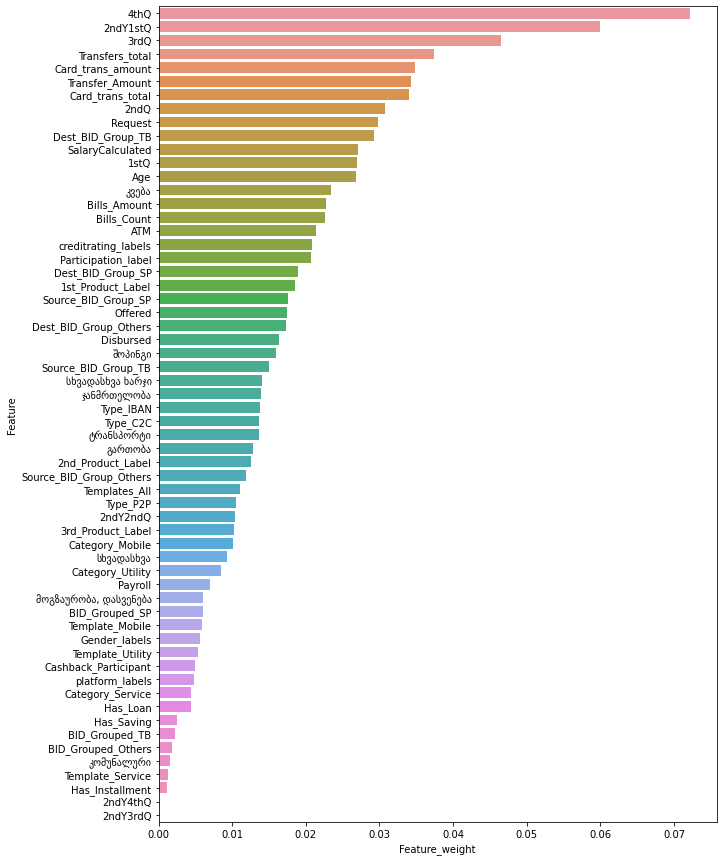

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_df_sample5,order=feature_df_sample5.sort_values('Feature_weight',ascending=False).Feature)

Sample6

In [ ]:
clf_sample6 = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

clf_sample6.fit(X_scaled_sample6,y_array_sample6)
print('RandomForest train Score: {:.3f}'.format(clf_sample6.score(X_scaled_sample6,y_array_sample6)))
print('RandomForest test Score: {:.3f}'.format(clf_sample6.score(X_array_sample6_test_scaled,y_array_sample6_test)))

rf_prediction_sample6 = clf_sample6.predict(X_array_sample6_test_scaled)
print(classification_report(y_array_sample6_test,rf_prediction_sample6))


rf_prediction_sample6_pred = clf_sample6.predict(X_array_sample6_scaled_pred)
print('y classes:',clf_sample6.classes_)
print(clf_sample6.predict_proba(X_array_sample6_scaled_pred))

sample6_predict_proba = clf_sample6.predict_proba(X_array_sample6_scaled_pred)


RandomForest train Score: 1.000
RandomForest test Score: 0.807
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5506
           1       0.60      0.44      0.51      1596

    accuracy                           0.81      7102
   macro avg       0.72      0.68      0.69      7102
weighted avg       0.79      0.81      0.80      7102

y classes: [0 1]
[[0.92945632 0.07054368]
 [0.66139404 0.33860596]
 [0.7842009  0.2157991 ]
 ...
 [0.75112173 0.24887827]
 [0.93939757 0.06060243]
 [0.92782781 0.07217219]]


In [ ]:
sample6_predict_proba_df = pd.DataFrame({'CustomerId':x_merge_pivot_sample6_pred['CustomerId'],clf_sample6.classes_[0]:sample6_predict_proba[:,0],clf_sample6.classes_[1]:sample6_predict_proba[:,1]})

In [ ]:
sample6_predict_proba_df[sample6_predict_proba_df[1]>0.8]

,CustomerId,0,1
239,00de07c2-444e-4961-99a9-8c133d5d922a,0.182382,0.817618
6221,181ac9cb-64c0-4c64-8f95-d65a00e46578,0.151120,0.848880
18416,471446bd-ec84-4b80-b212-b1cdc45fd85b,0.155147,0.844853
26536,66e7f127-1822-4109-a176-4bb5aac3e7fc,0.189603,0.810397
35120,886b9e14-dcde-4fb2-854f-833373d6a0a9,0.188340,0.811660
35747,8ae00634-976c-4620-8759-4348044fcafe,0.133398,0.866602
50693,c5d297c8-c3c0-4cfb-b724-28e0f59389b4,0.123668,0.876332
51637,c9ac02c5-2972-4de0-ad2d-d2d84839af54,0.127520,0.872480
55778,d9c16a66-75b2-4c14-9989-1b022bf4d0ef,0.163265,0.836735


In [ ]:
feature_importances_sample6 = clf_sample6.feature_importances_
feature_columns_sample6 = x_merge_pivot_sample6_test.iloc[:,1:].columns.to_list()
feature_df_sample6 = pd.DataFrame({'Feature':feature_columns_sample6,'Feature_weight':feature_importances_sample6})

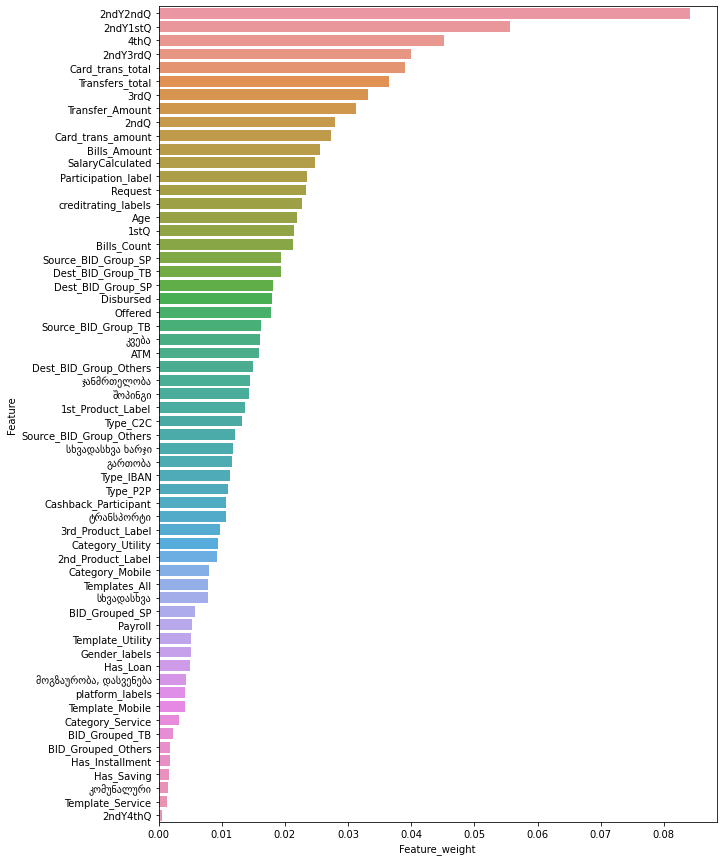

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_df_sample6,order=feature_df_sample6.sort_values('Feature_weight',ascending=False).Feature)

Sample7

In [ ]:
clf_sample7 = RandomForestClassifier(max_depth=12,n_estimators=600, random_state=0)

clf_sample7.fit(X_scaled_sample7,y_array_sample7)
print('RandomForest train Score: {:.3f}'.format(clf_sample7.score(X_scaled_sample7,y_array_sample7)))
print('RandomForest test Score: {:.3f}'.format(clf_sample7.score(X_array_sample7_test_scaled,y_array_sample7_test)))

rf_prediction_sample7 = clf_sample7.predict(X_array_sample7_test_scaled)
print(classification_report(y_array_sample7_test,rf_prediction_sample7))


rf_prediction_sample7_pred = clf_sample7.predict(X_array_sample7_scaled_pred)
print('y classes:',clf_sample7.classes_)
print(clf_sample7.predict_proba(X_array_sample7_scaled_pred))

sample7_predict_proba = clf_sample7.predict_proba(X_array_sample7_scaled_pred)


RandomForest train Score: 0.997
RandomForest test Score: 0.837
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       498
           1       0.68      0.43      0.53       133

    accuracy                           0.84       631
   macro avg       0.77      0.69      0.71       631
weighted avg       0.82      0.84      0.82       631

y classes: [0 1]
[[0.74906645 0.25093355]
 [0.98793935 0.01206065]
 [0.9586582  0.0413418 ]
 ...
 [0.95193234 0.04806766]
 [0.56177611 0.43822389]
 [0.98385018 0.01614982]]


In [ ]:
sample7_predict_proba_df = pd.DataFrame({'CustomerId':x_merge_pivot_sample7_pred['CustomerId'],clf_sample7.classes_[0]:sample7_predict_proba[:,0],clf_sample7.classes_[1]:sample7_predict_proba[:,1]})

In [ ]:
sample7_predict_proba_df[sample7_predict_proba_df[1]>0.8]

,CustomerId,0,1
1762,06c2942e-6a9b-4c50-a42d-9ba69a53d57b,0.189140,0.810860
1830,070b4521-d4a6-42ec-b35a-12432af2381a,0.135099,0.864901
6233,18283f03-442a-4b1a-9df5-2e4c3a99735a,0.082712,0.917288
6660,19c2b1ad-5725-4645-a3b2-a95c99467e4d,0.112530,0.887470
7734,1dd7b5bf-3181-41ad-ab3e-1eecbd43d992,0.109602,0.890398
7971,1ed3b713-3e79-4422-b5b2-69d3787d004b,0.126450,0.873550
8130,1f64d603-041e-4bdf-aa13-95e8c949c206,0.191860,0.808140
8350,203d3b9e-f904-4bd6-acdd-9c9c70eaaa2e,0.199655,0.800345
9763,2570ebcb-60a4-4e52-83e3-b7f654f6017e,0.124204,0.875796
10114,26ef88d9-1c0f-467c-97c4-37c61d5cbe90,0.127908,0.872092


In [ ]:
feature_importances_sample7 = clf_sample7.feature_importances_
feature_columns_sample7 = x_merge_pivot_sample7_test.iloc[:,1:].columns.to_list()
feature_df_sample7 = pd.DataFrame({'Feature':feature_columns_sample7,'Feature_weight':feature_importances_sample7})

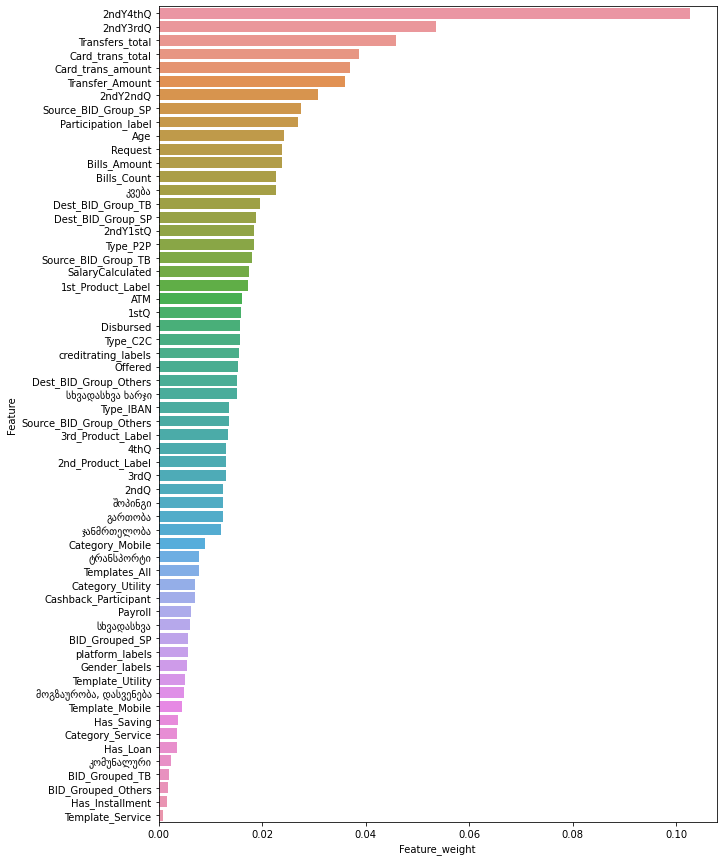

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_df_sample7,order=feature_df_sample7.sort_values('Feature_weight',ascending=False).Feature)

In [ ]:
feature_concat_df = pd.concat([feature_df_sample7,feature_df_sample6,feature_df_sample5, feature_df_sample4, feature_df_apr20_julsep19, feature_df_apr20_octdec19, feature_df_sample1,feature_df_sample0])

In [ ]:
feature_concat_groupby = feature_concat_df.groupby(by='Feature').mean().reset_index()

In [ ]:
feature_concat_groupby.head()

,Feature,Feature_weight
0,1stQ,0.051574
1,1st_Product_Label,0.030891
2,2ndQ,0.035639
3,2ndY1stQ,0.016764
4,2ndY2ndQ,0.015670


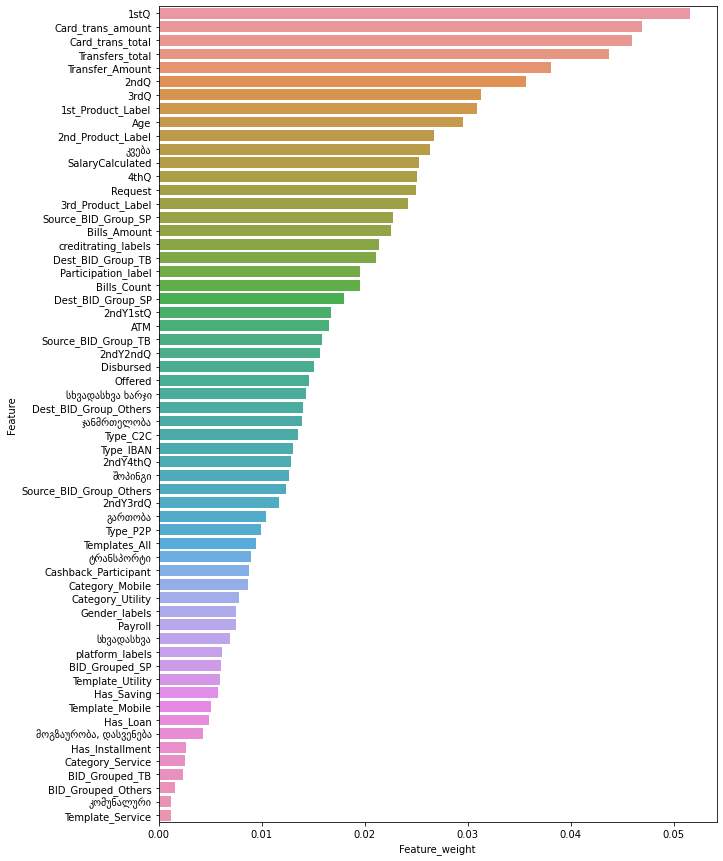

In [ ]:
fig,axes = plt.subplots(1,1,figsize=(10,15))

sns.barplot(x='Feature_weight',y='Feature',data=feature_concat_groupby,order=feature_concat_groupby.sort_values('Feature_weight',ascending=False).Feature)

#Gradient Boost

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier
#
#clf = GradientBoostingClassifier(random_state=0)
#clf.fit(X_train, y_train)
#
#GradientBoostingClassifier(random_state=0)
#clf.predict(X_test[:2])
#
#clf.score(X_test, y_test)


**Sample0**

In [ ]:
#gb_clf_sample0 = GradientBoostingClassifier(random_state=0)
#
#gb_clf_sample0.fit(X_scaled_sample0,y_array_sample0)
#print('XGBoost train Score: {:.3f}'.format(gb_clf_sample0.score(X_scaled_sample0,y_array_sample0)))
#print('XGBoost test Score: {:.3f}'.format(gb_clf_sample0.score(X_array_sample0_test_scaled,y_array_sample0_test)))
#
#gb_prediction_sample0 = gb_clf_sample0.predict(X_array_sample0_test_scaled)
#print(classification_report(y_array_sample0_test,gb_prediction_sample0))
#
#gb_prediction_sample0_pred = gb_clf_sample0.predict(X_array_sample0_scaled_pred)
#print(gb_clf_sample0.predict_proba(X_array_sample0_scaled_pred))

**Sample1**

In [ ]:
#gb_clf_sample1 = GradientBoostingClassifier(random_state=0)
#
#gb_clf_sample1.fit(X_scaled_sample1,y_array_sample1)
#print('Gradient Boost train Score: {:.3f}'.format(gb_clf_sample1.score(X_scaled_sample1,y_array_sample1)))
#print('Gradient Boost test Score: {:.3f}'.format(gb_clf_sample1.score(X_array_sample1_test_scaled,y_array_sample1_test)))
#
#gb_prediction_sample1 = gb_clf_sample1.predict(X_array_sample1_test_scaled)
#print(classification_report(y_array_sample1_test,gb_prediction_sample1))
#
#gb_prediction_sample1_pred = gb_clf_sample1.predict(X_array_sample1_scaled_pred)
#print(gb_clf_sample1.predict_proba(X_array_sample1_scaled_pred))

**Sample5**

In [ ]:
#gb_clf_sample5 = GradientBoostingClassifier(random_state=0)
#
#gb_clf_sample5.fit(X_scaled_sample5,y_array_sample5)
#print('GradientBoosting train Score: {:.3f}'.format(gb_clf_sample5.score(X_scaled_sample5,y_array_sample5)))
#print('GradientBoosting test Score: {:.3f}'.format(gb_clf_sample5.score(X_array_sample5_test_scaled,y_array_sample5_test)))
#
#gb_prediction_sample5 = gb_clf_sample5.predict(X_array_sample5_test_scaled)
#print(classification_report(y_array_sample5_test,gb_prediction_sample5))

#XGBoost

In [ ]:
#preds = model.predict(D_test)
#best_preds = np.asarray([np.argmax(line) for line in preds])
#
#print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
#print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
#print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

In [ ]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3}

steps = 20

**Sample0**

In [ ]:
D_train_sample0 = xgb.DMatrix(X_scaled_sample0, label=y_array_sample0)
D_test_sample0 = xgb.DMatrix(X_array_sample0_test_scaled, label=y_array_sample0_test)

In [ ]:
xgboost_sample0 = xgb.train(param, D_train_sample0, steps)

In [ ]:
preds_sample0 = xgboost_sample0.predict(D_test_sample0)
best_preds_sample0 = np.asarray([np.argmax(line) for line in preds_sample0])

In [ ]:
print("Precision = {}".format(precision_score(y_array_sample0_test, best_preds_sample0, average='macro')))
print("Recall = {}".format(recall_score(y_array_sample0_test, best_preds_sample0, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_array_sample0_test, best_preds_sample0)))

#gb_prediction_sample0 = gb_clf_sample0.predict(best_preds_sample0)
print(classification_report(y_array_sample0_test, best_preds_sample0))

Precision = 0.7999163589306568
Recall = 0.7581694685005943
Accuracy = 0.8158263305322129
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       975
           1       0.77      0.60      0.67       453

    accuracy                           0.82      1428
   macro avg       0.80      0.76      0.77      1428
weighted avg       0.81      0.82      0.81      1428



**Sample1**

In [ ]:
D_train_sample1 = xgb.DMatrix(X_scaled_sample1, label=y_array_sample1)
D_test_sample1 = xgb.DMatrix(X_array_sample1_test_scaled, label=y_array_sample1_test)

In [ ]:
xgboost_sample1 = xgb.train(param, D_train_sample1, steps)

In [ ]:
preds_sample1 = xgboost_sample1.predict(D_test_sample1)
best_preds_sample1 = np.asarray([np.argmax(line) for line in preds_sample1])

In [ ]:
print("Precision = {}".format(precision_score(y_array_sample1_test, best_preds_sample1, average='macro')))
print("Recall = {}".format(recall_score(y_array_sample1_test, best_preds_sample1, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_array_sample1_test, best_preds_sample1)))

Precision = 0.8188794137589318
Recall = 0.7989182692307693
Accuracy = 0.8157524613220816


**Sample7**

In [ ]:
D_train_sample7 = xgb.DMatrix(X_scaled_sample7, label=y_array_sample7)
D_test_sample7 = xgb.DMatrix(X_array_sample7_test_scaled, label=y_array_sample7_test)

In [ ]:
xgboost_sample7 = xgb.train(param, D_train_sample7, steps)

In [ ]:
preds_sample7 = xgboost_sample7.predict(D_test_sample7)
best_preds_sample7 = np.asarray([np.argmax(line) for line in preds_sample7])

In [ ]:
print("Precision = {}".format(precision_score(y_array_sample7_test, best_preds_sample7, average='macro')))
print("Recall = {}".format(recall_score(y_array_sample7_test, best_preds_sample7, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_array_sample7_test, best_preds_sample7)))

print(classification_report(y_array_sample7_test, best_preds_sample7))

Precision = 0.5988917306052856
Recall = 0.6401093094181236
Accuracy = 0.6624405705229794
              precision    recall  f1-score   support

           0       0.86      0.68      0.76       498
           1       0.33      0.60      0.43       133

    accuracy                           0.66       631
   macro avg       0.60      0.64      0.59       631
weighted avg       0.75      0.66      0.69       631



#Logistic Regression

In [ ]:
log = LogisticRegression(random_state=0, max_iter=10000)
 
log.fit(X_train_scaled_p2,y_train_p2)
log.score(X_test_scaled_p2,y_test_p2)
 
print('LogisticRegression: {}'.format(log.score(X_test_scaled_p2,y_test_p2)))
 
log_prediction = log.predict(X_test_scaled_p2)
 
print(classification_report(y_test_p2,log_prediction))

LogisticRegression: 0.8092885375494071
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       741
           1       0.72      0.46      0.57       271

    accuracy                           0.81      1012
   macro avg       0.78      0.70      0.72      1012
weighted avg       0.80      0.81      0.79      1012



#SVM

In [ ]:
svc = svm.SVC()
 
svc.fit(X_train_scaled_p2, y_train_p2)
svc.score(X_test_scaled_p2, y_test_p2)

0.8092885375494071

#Grid Search CV

In [ ]:
#commented temporarily
 
parameters = {
    'n_estimators'      : [250,300,400,500,600],
    'max_depth'         : [5,8,10, 12],
    'random_state'      : [0],    
    #'max_features': ['auto'],
    #'criterion' :['gini']
}

In [ ]:
#commented temporarily
#churn 90
 
#clf_grid = GridSearchCV(RandomForestClassifier(), parameters,cv=5,n_jobs=-1)
#clf_grid.fit(X_train_scaled, y_train)
#clf_grid.score(X_train_scaled,y_train)
#clf_grid.score(X_test_scaled,y_test)

In [ ]:
 #clf_grid.best_params_

In [ ]:
#clf_grid.predict_proba(X_test_scaled)

In [ ]:
#commented temporarily
#churn pivot
 
clf_grid = GridSearchCV(RandomForestClassifier(), parameters,cv=5,n_jobs=-1)
clf_grid.fit(X_train_scaled_p, y_train_p)
print('Train Set Score: {:.2f}'.format(clf_grid.score(X_train_scaled_p,y_train_p)))
print('Test Set Score: {:.2f}'.format(clf_grid.score(X_test_scaled_p,y_test_p)))

print('Best Params: {}'.format(clf_grid.best_params_))

Train Set Score: 0.90
Test Set Score: 0.86
Best Params: {'max_depth': 8, 'n_estimators': 250, 'random_state': 0}


In [ ]:
clf_grid.best_params_

{'max_depth': 8, 'n_estimators': 250, 'random_state': 0}

In [ ]:
param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['linear', 'rbf']}

In [ ]:
#commented temporarily

#svc_grid = GridSearchCV(svm.SVC(),param_grid,cv=5,n_jobs=-1)
# 
# 
#svc_grid.fit(X_train_scaled, y_train)
#svc_grid.score(X_test_scaled, y_test)

#Post Modeling

**Random Forrest**

In [ ]:
sample0_predict_proba_df['Sample']=0
sample1_predict_proba_df['Sample']=1
sample2_predict_proba_df['Sample']=2
sample3_predict_proba_df['Sample']=3
sample4_predict_proba_df['Sample']=4
sample5_predict_proba_df['Sample']=5
sample6_predict_proba_df['Sample']=6
sample7_predict_proba_df['Sample']=7

In [ ]:
predict_proba_df = pd.concat([sample0_predict_proba_df, 
sample1_predict_proba_df,
sample2_predict_proba_df,
sample3_predict_proba_df,
sample4_predict_proba_df,
sample5_predict_proba_df,
sample6_predict_proba_df,
sample7_predict_proba_df])

In [ ]:
selected_features[selected_features['incl']==True]['Feature']
xy_merge_pm = xy_merge_group_pred_for_loop[selected_features[selected_features['incl']==True]['Feature']]
xy_merge_pm['CustomerId'] = xy_merge_group_pred_for_loop['CustomerId']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
predict_proba_merge = pd.merge(predict_proba_df, xy_merge_pm,how='left',on='CustomerId')

,CustomerId,0,1,1stQ,2ndQ,3rdQ,4thQ,Age,ATM,კვება,სხვადასხვა ხარჯი,ჯანმრთელობა,Card_trans_total,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Bills_Count,Disbursed,Request,SalaryCalculated,creditrating_labels,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label,Card_Diff,Transfer_Diff,Bill_Diff,Avg_Card_trans,Avg_Transfers,Avg_Bills
0,000326ee-435b-4f45-8590-71684c39f4e0,0.982704,0.017296,1,0,53,124,25.0,0.172414,0.551724,0.060345,0.043103,116.0,0.045977,0.448276,0.505747,0.528736,0.333333,87.0,15.0,0.135135,37.0,392.0,8.0,1.0,5.0,1.0,2.0,1.0,3.0,10.0,3.0,38.666667,8.700000,5.000000
1,00052326-ae77-43c1-9995-bb21d721b912,0.644235,0.355765,1,5,0,0,24.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,6.0,0.0,0.250000,12.0,490.0,6.0,0.0,6.0,3.0,4.0,1.0,1.0,3.0,1.0,0.000000,2.000000,0.000000
2,000592a0-016f-480f-ba88-7fbba68ac0ee,0.308743,0.691257,1,0,0,0,43.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.0,1.000000,1.0,900.0,3.0,0.0,6.0,3.0,4.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
3,00077fbf-b865-4fa2-868c-42f4f1166467,0.338797,0.661203,1,1,0,0,41.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.500000,0.500000,0.500000,2.0,0.0,0.033333,60.0,2000.0,2.0,0.0,6.0,3.0,4.0,0.0,1.0,4.0,1.0,0.000000,0.500000,0.000000
4,00092423-28c9-4d23-8852-ee1c1e1eb263,0.208304,0.791696,1,0,0,0,24.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,0.0,0.000000,3.0,1.0,11.0,0.0,6.0,3.0,4.0,1.0,1.0,0.0,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27976,fff81d4f-b5b2-4676-94ff-cc464f42460e,0.951132,0.048868,3,1,0,18,39.0,0.074286,0.771429,0.051429,0.000000,175.0,0.000000,0.666667,0.333333,0.000000,0.666667,6.0,14.0,0.000000,2.0,10000.0,2.0,1.0,2.0,3.0,6.0,1.0,16.0,24.0,26.0,10.937500,0.250000,0.538462
27977,fffa7ed1-4de0-4051-bc45-86dbadfb78b5,0.969842,0.030158,146,128,9,1,33.0,0.074766,0.523364,0.032710,0.093458,214.0,0.019231,0.980769,0.000000,0.019231,0.615385,52.0,18.0,0.000000,0.0,0.0,0.0,1.0,1.0,2.0,6.0,1.0,9.0,9.0,9.0,23.777778,5.777778,2.000000
27978,fffb4a97-9166-4828-b7fe-dc6d00b4c0b4,0.464488,0.535512,1,0,0,0,22.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.0,400.0,10.0,1.0,2.0,3.0,4.0,1.0,-2.0,1.0,1.0,-0.500000,0.000000,0.000000
27979,fffc82bf-b13f-4c68-927b-1ab28c5481f8,0.394254,0.605746,2,0,0,0,20.0,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.500000,0.000000,0.500000,0.000000,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,6.0,4.0,4.0,1.0,1.0,-2.0,1.0,0.000000,-1.000000,0.000000


In [ ]:
predict_proba_merge[['CustomerId',0,1]].to_csv('/content/drive/My Drive/Colab Notebooks/Export/predict_proba_df.csv')

In [ ]:
predict_proba_merge[predict_proba_merge[1]>0.7].shape

(1326, 64)

In [ ]:
today = '20200831'

predict_proba_merge['MonthsDiff'] = round((pd.to_datetime(today) - pd.to_datetime(predict_proba_merge['MinMonth'])).astype('timedelta64[D]')/30)
predict_proba_merge['AVG_Card_trans'] = predict_proba_merge['Card_trans_total'] / predict_proba_merge['MonthsDiff']
predict_proba_merge['AVG_Transfers'] = predict_proba_merge['Transfers_total'] / predict_proba_merge['MonthsDiff']
predict_proba_merge['AVG_Bills'] = predict_proba_merge['Bills_Count'] / predict_proba_merge['MonthsDiff']
predict_proba_merge['AVG_Requests'] = predict_proba_merge['Request'] / predict_proba_merge['MonthsDiff']


In [ ]:
churn_proba_merge =  predict_proba_merge.loc[predict_proba_merge['1']>0.7,:]
retain_proba_merge =  predict_proba_merge.loc[predict_proba_merge['0']>0.7,:]
uncertain_proba_merge = predict_proba_merge.loc[(predict_proba_merge['0']<=0.7)&(predict_proba_merge['1']<=0.7),:]

In [ ]:
churn_proba_array = churn_proba_merge.drop(columns=['CustomerId','0','1'], axis=1).to_numpy()
retain_proba_array = retain_proba_merge.drop(columns=['CustomerId','0','1'], axis=1).to_numpy()
uncertain_proba_array = uncertain_proba_merge.drop(columns=['CustomerId','0','1'], axis=1).to_numpy()

In [ ]:
print(churn_proba_array.shape)
print(retain_proba_array.shape)
print(uncertain_proba_array.shape)

(965, 32)
(21289, 32)
(5727, 32)


In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [ ]:
scaler = MinMaxScaler()
#scaler.fit(df_clustering)
churn_proba_scaled = scaler.fit_transform(churn_proba_array)
retain_proba_scaled = scaler.fit_transform(retain_proba_array)
uncertain_proba_scaled = scaler.fit_transform(uncertain_proba_array)

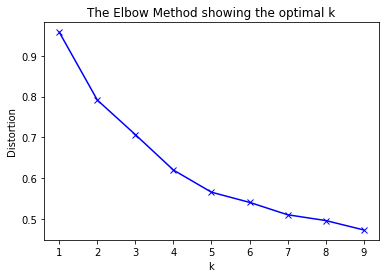

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(churn_proba_scaled)
    kmeanModel.fit(churn_proba_scaled)
    distortions.append(sum(np.min(cdist(churn_proba_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / churn_proba_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

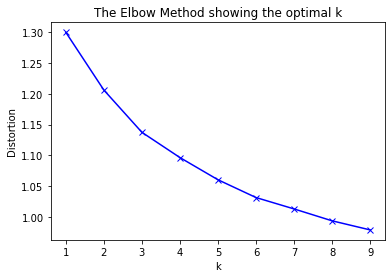

In [ ]:
distortions2 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(retain_proba_scaled)
    kmeanModel.fit(retain_proba_scaled)
    distortions2.append(sum(np.min(cdist(retain_proba_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / retain_proba_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions2, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

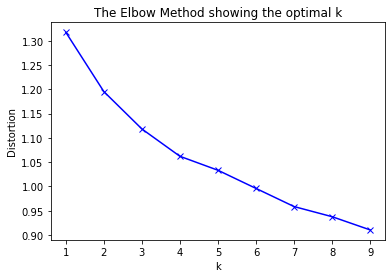

In [ ]:
distortions3 = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(uncertain_proba_scaled)
    kmeanModel.fit(uncertain_proba_scaled)
    distortions3.append(sum(np.min(cdist(uncertain_proba_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / uncertain_proba_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions3, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(churn_proba_scaled)
kmeans2 = KMeans(n_clusters=kclusters, random_state=0).fit(retain_proba_scaled)
kmeans3 = KMeans(n_clusters=kclusters, random_state=0).fit(uncertain_proba_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

In [ ]:
churn_proba_clustered = churn_proba_merge
churn_proba_clustered.loc[:,'Cluster_Label'] = kmeans.labels_
#Customer_Clusters = combine_merged.loc[:,['CustomerId','Cluster_Label']]
churn_proba_clustered.loc[:,'Count'] = 1
churn_proba_clustered.head(1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,CustomerId,0,1,1stQ,2ndQ,3rdQ,4thQ,Age,ATM,კვება,სხვადასხვა ხარჯი,ჯანმრთელობა,Card_trans_total,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Bills_Count,Disbursed,Request,SalaryCalculated,creditrating_labels,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label,Card_Diff,Transfer_Diff,Bill_Diff,Avg_Card_trans,Avg_Transfers,Avg_Bills,Cluster_Label,Count
4,00092423-28c9-4d23-8852-ee1c1e1eb263,0.208304,0.791696,1,0,0,0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,11.0,0.0,6.0,3.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1


In [ ]:
retain_proba_clustered = retain_proba_merge
retain_proba_clustered.loc[:,'Cluster_Label'] = kmeans2.labels_

retain_proba_clustered.loc[:,'Count'] = 1
retain_proba_clustered.head(1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,CustomerId,0,1,1stQ,2ndQ,3rdQ,4thQ,Age,ATM,კვება,სხვადასხვა ხარჯი,ჯანმრთელობა,Card_trans_total,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Bills_Count,Disbursed,Request,SalaryCalculated,creditrating_labels,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label,Card_Diff,Transfer_Diff,Bill_Diff,Avg_Card_trans,Avg_Transfers,Avg_Bills,Cluster_Label,Count
0,000326ee-435b-4f45-8590-71684c39f4e0,0.982704,0.017296,1,0,53,124,25.0,0.172414,0.551724,0.060345,0.043103,116.0,0.045977,0.448276,0.505747,0.528736,0.333333,87.0,15.0,0.135135,37.0,392.0,8.0,1.0,5.0,1.0,2.0,1.0,3.0,10.0,3.0,38.666667,8.7,5.0,1,1


In [ ]:
uncertain_proba_clustered = uncertain_proba_merge
uncertain_proba_clustered.loc[:,'Cluster_Label'] = kmeans3.labels_

uncertain_proba_clustered.loc[:,'Count'] = 1
uncertain_proba_clustered.head(1)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,CustomerId,0,1,1stQ,2ndQ,3rdQ,4thQ,Age,ATM,კვება,სხვადასხვა ხარჯი,ჯანმრთელობა,Card_trans_total,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Bills_Count,Disbursed,Request,SalaryCalculated,creditrating_labels,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label,Card_Diff,Transfer_Diff,Bill_Diff,Avg_Card_trans,Avg_Transfers,Avg_Bills,Cluster_Label,Count
1,00052326-ae77-43c1-9995-bb21d721b912,0.644235,0.355765,1,5,0,0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0.0,0.25,12.0,490.0,6.0,0.0,6.0,3.0,4.0,1.0,1.0,3.0,1.0,0.0,2.0,0.0,0,1


In [ ]:
churn_proba_clustered.loc[churn_proba_clustered['Age']>55,'Age_Label'] = '>55'
churn_proba_clustered.loc[churn_proba_clustered['Age']<=55,'Age_Label'] = '<=55'
churn_proba_clustered.loc[churn_proba_clustered['Age']<=44,'Age_Label'] = '<=44'
churn_proba_clustered.loc[churn_proba_clustered['Age']<=33,'Age_Label'] = '<=33'
churn_proba_clustered.loc[churn_proba_clustered['Age']<=22,'Age_Label'] = '<=22'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
churn_proba_clustered[['Age','Age_Label']].head()

,Age,Age_Label
4,24.0,<=33
26,26.0,<=33
78,30.0,<=33
206,25.0,<=33
212,20.0,<=22


In [ ]:
retain_proba_clustered.loc[retain_proba_clustered['Age']>55,'Age_Label'] = '>55'
retain_proba_clustered.loc[retain_proba_clustered['Age']<=55,'Age_Label'] = '<=55'
retain_proba_clustered.loc[retain_proba_clustered['Age']<=44,'Age_Label'] = '<=44'
retain_proba_clustered.loc[retain_proba_clustered['Age']<=33,'Age_Label'] = '<=33'
retain_proba_clustered.loc[retain_proba_clustered['Age']<=22,'Age_Label'] = '<=22'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
uncertain_proba_clustered.loc[uncertain_proba_clustered['Age']>55,'Age_Label'] = '>55'
uncertain_proba_clustered.loc[uncertain_proba_clustered['Age']<=55,'Age_Label'] = '<=55'
uncertain_proba_clustered.loc[uncertain_proba_clustered['Age']<=44,'Age_Label'] = '<=44'
uncertain_proba_clustered.loc[uncertain_proba_clustered['Age']<=33,'Age_Label'] = '<=33'
uncertain_proba_clustered.loc[uncertain_proba_clustered['Age']<=22,'Age_Label'] = '<=22'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
products_sort_labels = products_sorted[['1st Product','1st_Product_Label']].groupby(by=['1st Product','1st_Product_Label']).count().reset_index()
products_sort_labels.rename(columns={'1st Product':'Product_name','1st_Product_Label':'Product_label'},inplace=True)

churn_proba_clustered_merge = pd.merge(churn_proba_clustered,products_sort_labels,how='left',left_on='1st_Product_Label',right_on='Product_label')
churn_proba_clustered_merge.rename(columns={'Product_name':'1st_Product'},inplace=True)
churn_proba_clustered_merge.drop(columns='Product_label',axis=1,inplace=True)

churn_proba_clustered_merge = pd.merge(churn_proba_clustered_merge,products_sort_labels,how='left',left_on='2nd_Product_Label',right_on='Product_label')
churn_proba_clustered_merge.rename(columns={'Product_name':'2nd_Product'},inplace=True)
churn_proba_clustered_merge.drop(columns='Product_label',axis=1,inplace=True)

churn_proba_clustered_merge = pd.merge(churn_proba_clustered_merge,products_sort_labels,how='left',left_on='3rd_Product_Label',right_on='Product_label')
churn_proba_clustered_merge.rename(columns={'Product_name':'3rd_Product'},inplace=True)
churn_proba_clustered_merge.drop(columns='Product_label',axis=1,inplace=True)


In [ ]:
retain_proba_clustered_merge = pd.merge(retain_proba_clustered,products_sort_labels,how='left',left_on='1st_Product_Label',right_on='Product_label')
retain_proba_clustered_merge.rename(columns={'Product_name':'1st_Product'},inplace=True)
retain_proba_clustered_merge.drop(columns='Product_label',axis=1,inplace=True)

retain_proba_clustered_merge = pd.merge(retain_proba_clustered_merge,products_sort_labels,how='left',left_on='2nd_Product_Label',right_on='Product_label')
retain_proba_clustered_merge.rename(columns={'Product_name':'2nd_Product'},inplace=True)
retain_proba_clustered_merge.drop(columns='Product_label',axis=1,inplace=True)

retain_proba_clustered_merge = pd.merge(retain_proba_clustered_merge,products_sort_labels,how='left',left_on='3rd_Product_Label',right_on='Product_label')
retain_proba_clustered_merge.rename(columns={'Product_name':'3rd_Product'},inplace=True)
retain_proba_clustered_merge.drop(columns='Product_label',axis=1,inplace=True)

In [ ]:
uncertain_proba_clustered_merge = pd.merge(uncertain_proba_clustered,products_sort_labels,how='left',left_on='1st_Product_Label',right_on='Product_label')
uncertain_proba_clustered_merge.rename(columns={'Product_name':'1st_Product'},inplace=True)
uncertain_proba_clustered_merge.drop(columns='Product_label',axis=1,inplace=True)

uncertain_proba_clustered_merge = pd.merge(uncertain_proba_clustered_merge,products_sort_labels,how='left',left_on='2nd_Product_Label',right_on='Product_label')
uncertain_proba_clustered_merge.rename(columns={'Product_name':'2nd_Product'},inplace=True)
uncertain_proba_clustered_merge.drop(columns='Product_label',axis=1,inplace=True)

uncertain_proba_clustered_merge = pd.merge(uncertain_proba_clustered_merge,products_sort_labels,how='left',left_on='3rd_Product_Label',right_on='Product_label')
uncertain_proba_clustered_merge.rename(columns={'Product_name':'3rd_Product'},inplace=True)
uncertain_proba_clustered_merge.drop(columns='Product_label',axis=1,inplace=True)

In [ ]:
churn_proba_clustered_merge.head(1)

,CustomerId,0,1,1stQ,2ndQ,3rdQ,4thQ,Age,ATM,კვება,სხვადასხვა ხარჯი,ჯანმრთელობა,Card_trans_total,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Bills_Count,Disbursed,Request,SalaryCalculated,creditrating_labels,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label,Card_Diff,Transfer_Diff,Bill_Diff,Avg_Card_trans,Avg_Transfers,Avg_Bills,Cluster_Label,Count,Age_Label,1st_Product,2nd_Product,3rd_Product
0,00092423-28c9-4d23-8852-ee1c1e1eb263,0.208304,0.791696,1,0,0,0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,11.0,0.0,6.0,3.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,<=33,Transfers,Loan_Request,NaN


In [ ]:
products_sort_labels

,Product_name,Product_label
0,Bills,1.0
1,Card_trans,2.0
2,Loan_Request,3.0
3,Saving,5.0
4,Transfers,6.0


In [ ]:
credit_labels = credit_data[['CreditInfoRating','creditrating_labels']].groupby(by=['CreditInfoRating','creditrating_labels']).count()

In [ ]:
print('Total Count of >70% Churn Customers: ',churn_proba_clustered_merge.shape[0])
print('Card trans Customers: ',churn_proba_clustered_merge[churn_proba_clustered_merge['Card_trans_total']>0]['Count'].sum())
print('Transfers Customers: ', churn_proba_clustered_merge[churn_proba_clustered_merge['Transfers_total']>0]['Count'].sum())
print('Bill Customers: ', churn_proba_clustered_merge[churn_proba_clustered_merge['Bills_Count']>0]['Count'].sum())

print('Cashback Participant: ',churn_proba_clustered_merge['Cashback_Participant'].sum())
#print('Has Tamplate: ', churn_proba_clustered_merge['Templates_All'].sum())

print('Loan requesters: ', churn_proba_clustered_merge[churn_proba_clustered_merge['Request']>0]['Count'].sum())
#print('Offered rate: {:.2%}'.format(churn_proba_clustered_merge[churn_proba_clustered_merge['Request']>0]['Offered'].mean()))
#print('Disbursed rate: {:.2%}'.format(churn_proba_clustered_merge[churn_proba_clustered_merge['Request']>0]['Disbursed'].mean()))

Total Count of >70% Churn Customers:  965
Card trans Customers:  17
Transfers Customers:  901
Bill Customers:  54
Cashback Participant:  0.0
Loan requesters:  789


In [ ]:
print('Total Count of >80% Retain Customers: ',retain_proba_clustered_merge.shape[0])
print('Card trans Customers: ',retain_proba_clustered_merge[retain_proba_clustered_merge['Card_trans_total']>0]['Count'].sum())
print('Transfers Customers: ', retain_proba_clustered_merge[retain_proba_clustered_merge['Transfers_total']>0]['Count'].sum())
print('Bill Customers: ', retain_proba_clustered_merge[retain_proba_clustered_merge['Bills_Count']>0]['Count'].sum())

print('Cashback Participant: ',retain_proba_clustered_merge['Cashback_Participant'].sum())
#print('Has Tamplate: ', retain_proba_clustered_merge[retain_proba_clustered_merge['Templates_All']>0]['Count'].sum())

print('Loan requesters: ', retain_proba_clustered_merge[retain_proba_clustered_merge['Request']>0]['Count'].sum())
#print('Offered rate: {:.2%}'.format(retain_proba_clustered_merge[retain_proba_clustered_merge['Request']>0]['Offered'].mean()))
#print('Disbursed rate: {:.2%}'.format(retain_proba_clustered_merge[retain_proba_clustered_merge['Request']>0]['Disbursed'].mean()))

Total Count of >80% Retain Customers:  21289
Card trans Customers:  19561
Transfers Customers:  20241
Bill Customers:  16325
Cashback Participant:  15817.0
Loan requesters:  14645


In [ ]:
print('Total Count of Uncertain Customers: ',uncertain_proba_clustered_merge.shape[0])
print('Card trans Customers: ',uncertain_proba_clustered_merge[uncertain_proba_clustered_merge['Card_trans_total']>0]['Count'].sum())
print('Transfers Customers: ', uncertain_proba_clustered_merge[uncertain_proba_clustered_merge['Transfers_total']>0]['Count'].sum())
print('Bill Customers: ', uncertain_proba_clustered_merge[uncertain_proba_clustered_merge['Bills_Count']>0]['Count'].sum())

print('Cashback Participant: ',uncertain_proba_clustered_merge['Cashback_Participant'].sum())
#print('Has Tamplate: ', uncertain_proba_clustered_merge[uncertain_proba_clustered_merge['Templates_All']>0]['Count'].sum())

print('Loan requesters: ', uncertain_proba_clustered_merge[uncertain_proba_clustered_merge['Request']>0]['Count'].sum())
#print('Offered rate: {:.2%}'.format(uncertain_proba_clustered_merge[uncertain_proba_clustered_merge['Request']>0]['Offered'].mean()))
#print('Disbursed rate: {:.2%}'.format(uncertain_proba_clustered_merge[uncertain_proba_clustered_merge['Request']>0]['Disbursed'].mean()))

Total Count of Uncertain Customers:  5727
Card trans Customers:  3285
Transfers Customers:  4417
Bill Customers:  1471
Cashback Participant:  1747.0
Loan requesters:  3553


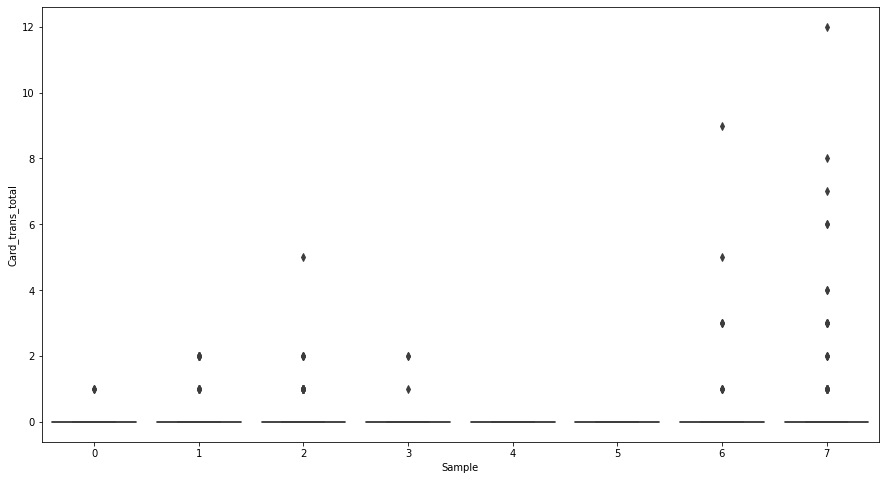

In [ ]:
fig,axes = plt.subplots(figsize=(15,8))

sns.boxplot(x='Sample',y='Card_trans_total',data=churn_proba_clustered_merge)

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(25,8))

sns.boxplot(x='Payroll',y='SalaryCalculated',data=churn_proba_clustered_merge[churn_proba_clustered_merge['SalaryCalculated']<5000],ax=axes[0])
sns.barplot(x='creditrating_labels',y='Count',data=churn_proba_clustered_merge, estimator = sum, ax=axes[1])

In [ ]:
churn_proba_clustered.head()

,CustomerId,0,1,1stQ,2ndQ,3rdQ,4thQ,Age,ATM,კვება,სხვადასხვა ხარჯი,ჯანმრთელობა,Card_trans_total,Source_BID_Group_Others,Source_BID_Group_SP,Source_BID_Group_TB,Dest_BID_Group_SP,Dest_BID_Group_TB,Transfers_total,Bills_Count,Disbursed,Request,SalaryCalculated,creditrating_labels,Cashback_Participant,1st_Product_Label,2nd_Product_Label,3rd_Product_Label,Participation_label,Card_Diff,Transfer_Diff,Bill_Diff,Avg_Card_trans,Avg_Transfers,Avg_Bills,Cluster_Label,Count,Age_Label
4,00092423-28c9-4d23-8852-ee1c1e1eb263,0.208304,0.791696,1,0,0,0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.000000,3.0,1.0,11.0,0.0,6.0,3.0,4.0,1.0,1.0,0.0,1.0,0.0,0.00,0.0,1,1,<=33
26,00341a39-f784-402f-9e9b-5f420595099b,0.270274,0.729726,1,1,1,0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.333333,6.0,860.4,4.0,0.0,6.0,3.0,4.0,1.0,1.0,4.0,1.0,0.0,0.75,0.0,1,1,<=33
78,0092961d-a36a-4048-9599-c8f73a5dc511,0.150259,0.849741,1,0,0,0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.000000,6.0,3000.0,11.0,0.0,6.0,3.0,4.0,0.0,1.0,-1.0,1.0,0.0,-1.00,0.0,0,1,<=33
206,01969424-8f2b-496d-904d-38182ca30c2e,0.216761,0.783239,2,0,0,0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.000000,14.0,560.0,3.0,0.0,6.0,3.0,4.0,0.0,1.0,0.0,1.0,0.0,0.00,0.0,0,1,<=33
212,01b6d09c-33a4-4358-b353-30acf800ba32,0.195635,0.804365,2,0,0,0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.000000,7.0,500.0,9.0,0.0,6.0,3.0,4.0,0.0,1.0,-1.0,1.0,0.0,-2.00,0.0,0,1,<=22


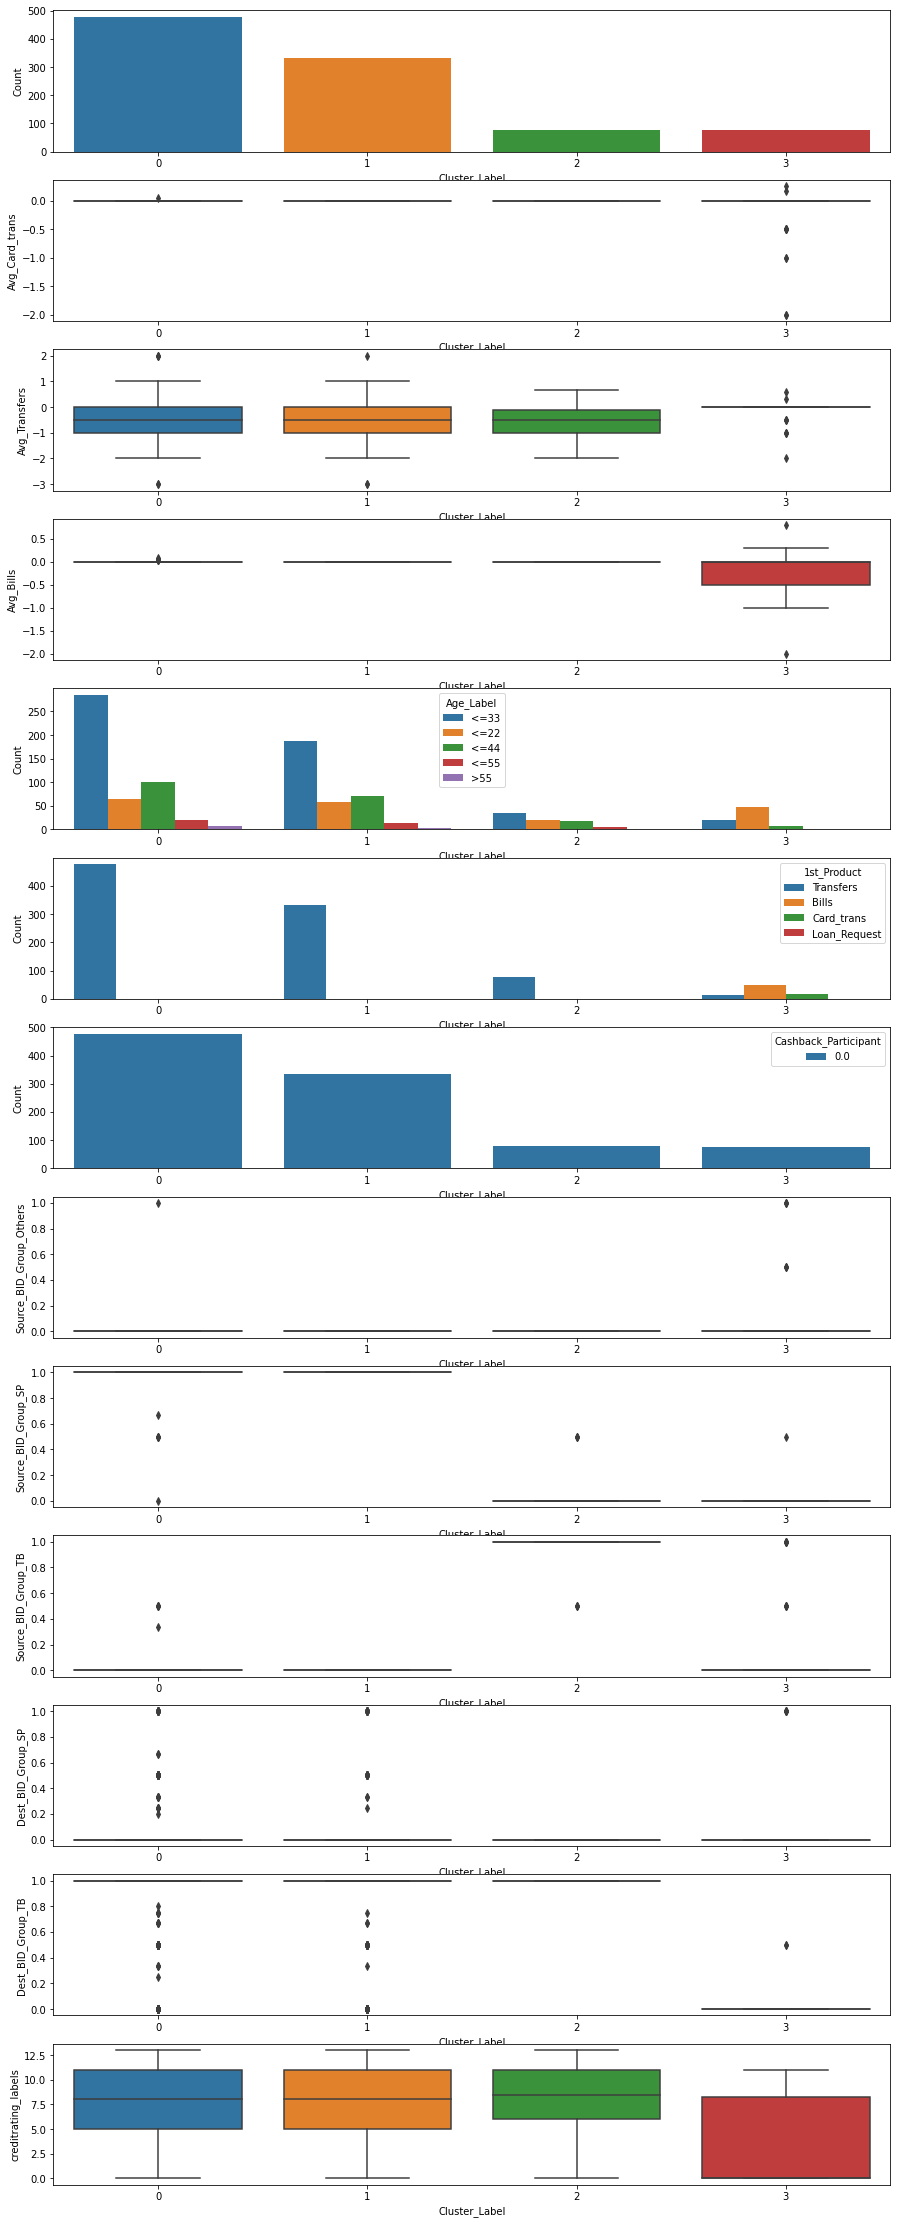

In [ ]:
fig,axes = plt.subplots(13,1,figsize=(15,40))

sns.barplot(x='Cluster_Label',y='Count',data=churn_proba_clustered, estimator=sum, ax=axes[0])
sns.boxplot(x='Cluster_Label',y='Avg_Card_trans',data=churn_proba_clustered,ax=axes[1])
sns.boxplot(x='Cluster_Label',y='Avg_Transfers',data=churn_proba_clustered,ax=axes[2])
sns.boxplot(x='Cluster_Label',y='Avg_Bills',data=churn_proba_clustered,ax=axes[3])
sns.barplot(x='Cluster_Label',y='Count', hue='Age_Label',data=churn_proba_clustered, estimator=sum, ax=axes[4])
sns.barplot(x='Cluster_Label',y='Count', hue='1st_Product',data=churn_proba_clustered_merge, estimator=sum, ax=axes[5])
sns.barplot(x='Cluster_Label',y='Count', hue='Cashback_Participant',data=churn_proba_clustered, estimator=sum, ax=axes[6])
sns.boxplot(x='Cluster_Label',y='Source_BID_Group_Others',data=churn_proba_clustered,ax=axes[7])
sns.boxplot(x='Cluster_Label',y='Source_BID_Group_SP',data=churn_proba_clustered,ax=axes[8])
sns.boxplot(x='Cluster_Label',y='Source_BID_Group_TB',data=churn_proba_clustered,ax=axes[9])
sns.boxplot(x='Cluster_Label',y='Dest_BID_Group_SP',data=churn_proba_clustered,ax=axes[10])
sns.boxplot(x='Cluster_Label',y='Dest_BID_Group_TB',data=churn_proba_clustered,ax=axes[11])
sns.boxplot(x='Cluster_Label',y='creditrating_labels',data=churn_proba_clustered,ax=axes[12])

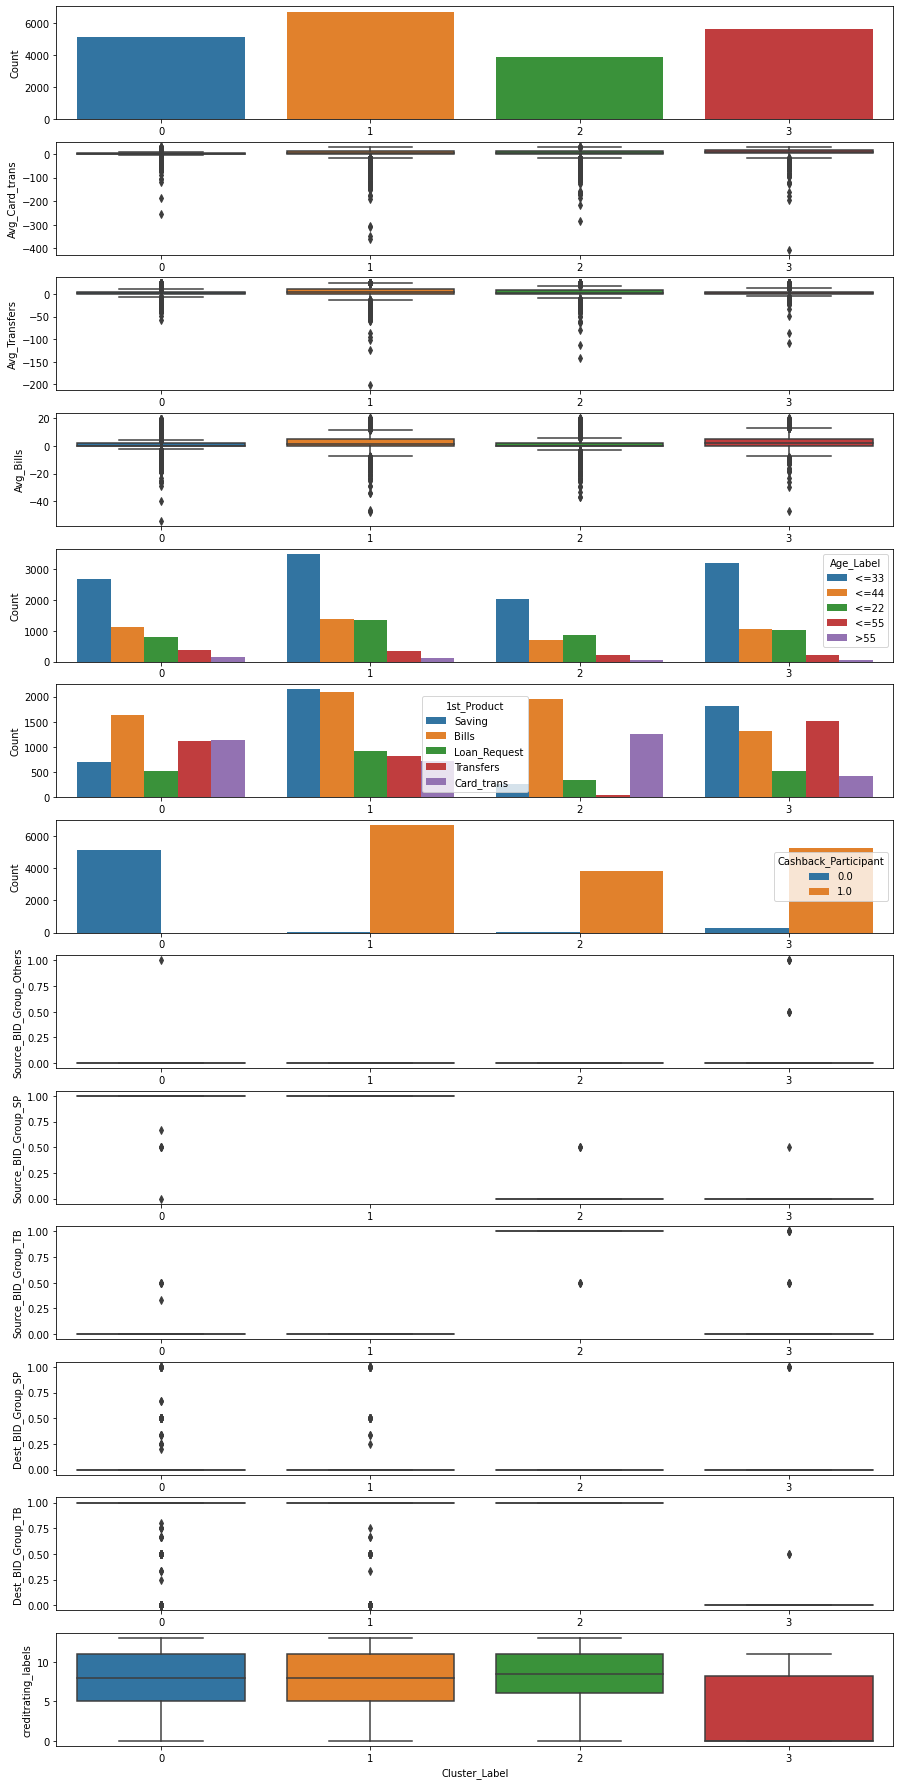

In [ ]:
fig,axes = plt.subplots(13,1,figsize=(15,32))

sns.barplot(x='Cluster_Label',y='Count', data=retain_proba_clustered, estimator=sum, ax=axes[0])
sns.boxplot(x='Cluster_Label',y='Avg_Card_trans',data=retain_proba_clustered[retain_proba_clustered['Avg_Card_trans']<30],ax=axes[1])
sns.boxplot(x='Cluster_Label',y='Avg_Transfers',data=retain_proba_clustered[retain_proba_clustered['Avg_Transfers']<25],ax=axes[2])
sns.boxplot(x='Cluster_Label',y='Avg_Bills',data=retain_proba_clustered[retain_proba_clustered['Avg_Bills']<20],ax=axes[3])
sns.barplot(x='Cluster_Label',y='Count', hue='Age_Label',data=retain_proba_clustered, estimator=sum, ax=axes[4])
sns.barplot(x='Cluster_Label',y='Count', hue='1st_Product',data=retain_proba_clustered_merge, estimator=sum, ax=axes[5])
sns.barplot(x='Cluster_Label',y='Count', hue='Cashback_Participant',data=retain_proba_clustered, estimator=sum, ax=axes[6])
sns.boxplot(x='Cluster_Label',y='Source_BID_Group_Others',data=churn_proba_clustered,ax=axes[7])
sns.boxplot(x='Cluster_Label',y='Source_BID_Group_SP',data=churn_proba_clustered,ax=axes[8])
sns.boxplot(x='Cluster_Label',y='Source_BID_Group_TB',data=churn_proba_clustered,ax=axes[9])
sns.boxplot(x='Cluster_Label',y='Dest_BID_Group_SP',data=churn_proba_clustered,ax=axes[10])
sns.boxplot(x='Cluster_Label',y='Dest_BID_Group_TB',data=churn_proba_clustered,ax=axes[11])
sns.boxplot(x='Cluster_Label',y='creditrating_labels',data=churn_proba_clustered,ax=axes[12])

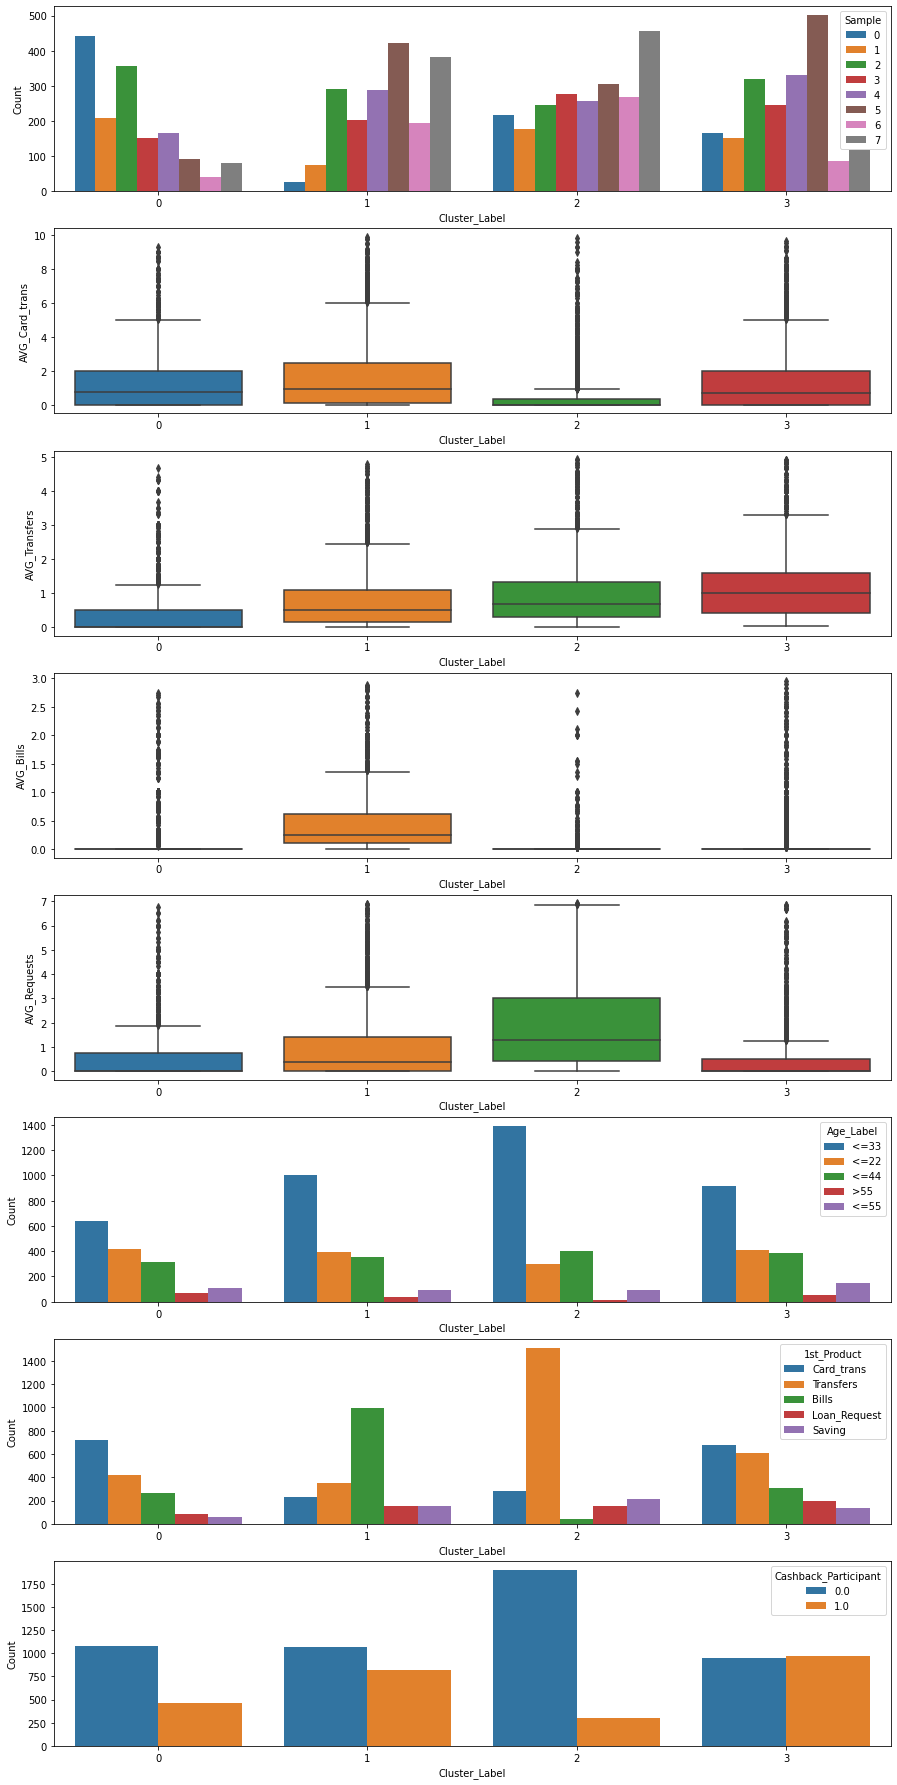

In [ ]:
fig,axes = plt.subplots(8,1,figsize=(15,32))

sns.barplot(x='Cluster_Label',y='Count', hue='Sample',data=uncertain_proba_clustered, estimator=sum, ax=axes[0])
sns.boxplot(x='Cluster_Label',y='AVG_Card_trans',data=uncertain_proba_clustered[uncertain_proba_clustered['AVG_Card_trans']<10],ax=axes[1])
sns.boxplot(x='Cluster_Label',y='AVG_Transfers',data=uncertain_proba_clustered[uncertain_proba_clustered['AVG_Transfers']<5],ax=axes[2])
sns.boxplot(x='Cluster_Label',y='AVG_Bills',data=uncertain_proba_clustered[uncertain_proba_clustered['AVG_Bills']<3],ax=axes[3])
sns.boxplot(x='Cluster_Label',y='AVG_Requests',data=uncertain_proba_clustered[uncertain_proba_clustered['AVG_Requests']<7],ax=axes[4])
sns.barplot(x='Cluster_Label',y='Count', hue='Age_Label',data=uncertain_proba_clustered, estimator=sum, ax=axes[5])
sns.barplot(x='Cluster_Label',y='Count', hue='1st_Product',data=uncertain_proba_clustered_merge, estimator=sum, ax=axes[6])
sns.barplot(x='Cluster_Label',y='Count', hue='Cashback_Participant',data=uncertain_proba_clustered, estimator=sum, ax=axes[7])

In [ ]:
xy_merge_pivot.columns

Index(['CustomerId', 'MinMonth', 'Churn', 'Churn_Before', '1stQ', '2ndQ',
       '3rdQ', '4thQ', '2ndY1stQ', '2ndY2ndQ', '2ndY3rdQ', '2ndY4thQ',
       'Template_Mobile', 'Template_Service', 'Template_Utility',
       'Templates_All', 'Age', 'Gender_labels', 'ATM', 'გართობა', 'კვება',
       'კომუნალური', 'მოგზაურობა, დასვენება', 'სხვადასხვა', 'სხვადასხვა ხარჯი',
       'ტრანსპორტი', 'შოპინგი', 'ჯანმრთელობა', 'Card_trans_total',
       'MinMonth_Card_trans', 'Type_C2C', 'Type_IBAN', 'Type_P2P',
       'Source_BID_Group_Others', 'Source_BID_Group_SP', 'Source_BID_Group_TB',
       'Dest_BID_Group_Others', 'Dest_BID_Group_SP', 'Dest_BID_Group_TB',
       'Transfers_total', 'MinMonth_Transfers', 'Category_Mobile',
       'Category_Service', 'Category_Utility', 'BID_Grouped_Others',
       'BID_Grouped_SP', 'BID_Grouped_TB', 'Bills_Count', 'MinMonth_Bills',
       'Has_Installment', 'Has_Loan', 'Offered', 'Disbursed', 'Request',
       'SalaryCalculated', 'Payroll', 'creditrating_labels', 